In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import KFold,GridSearchCV,train_test_split
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#Importing data

housing=pd.read_csv("train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(housing.columns)
housing.shape

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

(1460, 81)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Dropping ID column
housing = housing.drop('Id',axis='columns')
housing.describe([0.25,0.50,0.75,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#Checking for % of NULLs

round(housing.isnull().sum()/len(housing.index),2).sort_values(ascending=False).head(30)


PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageCond      0.06
GarageQual      0.06
GarageType      0.06
GarageFinish    0.06
GarageYrBlt     0.06
BsmtExposure    0.03
BsmtQual        0.03
BsmtCond        0.03
BsmtFinType2    0.03
BsmtFinType1    0.03
MasVnrType      0.01
MasVnrArea      0.01
MSSubClass      0.00
Fireplaces      0.00
TotRmsAbvGrd    0.00
KitchenQual     0.00
KitchenAbvGr    0.00
BedroomAbvGr    0.00
HalfBath        0.00
FullBath        0.00
BsmtHalfBath    0.00
Functional      0.00
GarageCars      0.00
GrLivArea       0.00
dtype: float64

In [7]:
round(housing.isnull().sum()/len(housing.index),2)[round(housing.isnull().sum()/len(housing.index),2).values>0.10].sort_values(ascending=False)

PoolQC         1.00
MiscFeature    0.96
Alley          0.94
Fence          0.81
FireplaceQu    0.47
LotFrontage    0.18
dtype: float64

In [8]:
# Dropping all columns having NULL values greater than 10%
housing = housing.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],axis='columns')


In [9]:
# Checking all columns again with NULLs
round(housing.isnull().sum()/len(housing.index),2).sort_values(ascending=False).head(15)


GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
BsmtFinType1    0.03
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType2    0.03
MasVnrType      0.01
MasVnrArea      0.01
KitchenAbvGr    0.00
BedroomAbvGr    0.00
HalfBath        0.00
dtype: float64

In [10]:
#Checking all distinct values in each column having NULL values
print(housing.GarageType.value_counts(),'\n')
print(housing.GarageYrBlt.value_counts(),'\n')
print(housing.GarageFinish.value_counts(),'\n')
print(housing.GarageQual.value_counts(),'\n')
print(housing.GarageCond.value_counts(),'\n')
print(housing.BsmtFinType1.value_counts(),'\n')
print(housing.BsmtQual.value_counts(),'\n')
print(housing.BsmtCond.value_counts(),'\n')
print(housing.BsmtExposure.value_counts(),'\n')
print(housing.BsmtFinType2.value_counts(),'\n')
print(housing.MasVnrType.value_counts(),'\n')
print(housing.MasVnrArea.value_counts(),'\n')
print(housing.BedroomAbvGr.value_counts(),'\n')
print(housing.HalfBath.value_counts(),'\n')
print(housing.FullBath.value_counts(),'\n')

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64 

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64 

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64 

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64 

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64 

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64 

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64 

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64 

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64 

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64 

None       864


In [11]:
# Identifying only the numerical columns and imputing the NULLs with median value

housing.GarageYrBlt = housing.GarageYrBlt.fillna(housing.GarageYrBlt.median())
housing.MasVnrArea = housing.MasVnrArea.fillna(housing.MasVnrArea.median())
housing.BedroomAbvGr = housing.BedroomAbvGr.fillna(housing.BedroomAbvGr.median())
housing.HalfBath = housing.HalfBath.fillna(housing.HalfBath.median())
housing.FullBath = housing.FullBath.fillna(housing.FullBath.median())

In [12]:
# Identifying all alphabetical columns and changing all NULLs to NA

housing.GarageType = housing.GarageType.fillna('NA')
housing.GarageFinish = housing.GarageFinish.fillna('NA')
housing.GarageQual = housing.GarageQual.fillna('NA')
housing.GarageCond = housing.GarageCond.fillna('NA')
housing.BsmtFinType1 = housing.BsmtFinType1.fillna('NA')
housing.BsmtQual = housing.BsmtQual.fillna('NA')
housing.BsmtCond = housing.BsmtCond.fillna('NA')
housing.BsmtExposure = housing.BsmtExposure.fillna('NA')
housing.BsmtFinType2 = housing.BsmtFinType2.fillna('NA')
housing.MasVnrType = housing.MasVnrType.fillna('NA')

In [13]:
# Re-checking if any columns have NULLs in them
round(housing.isnull().sum()/len(housing.index),2).sort_values(ascending=False).head(15)


MSSubClass      0.0
GarageYrBlt     0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
FullBath        0.0
BsmtHalfBath    0.0
BsmtFullBath    0.0
GrLivArea       0.0
LowQualFinSF    0.0
2ndFlrSF        0.0
dtype: float64

In [14]:
# Calculating the age of the house and dropping redundant columns
housing['HouseAge'] = housing.YrSold - housing.YearBuilt
housing=housing.drop(columns=['YrSold', 'YearBuilt'])



<AxesSubplot:>

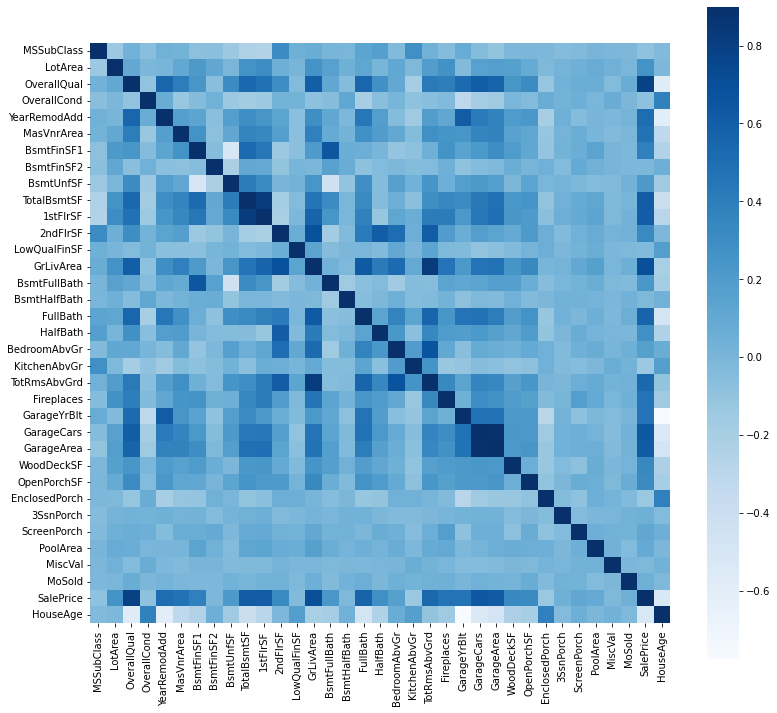

In [15]:
# Plotting a correlation map to check how variables are correlated with each other
corrmat = housing.corr()
plt.subplots(figsize=(13,12))
sns.heatmap(corrmat, cmap="Blues", vmax=0.9, square=True)

# With the corr plot we can see that the following have a considerable amount of correlation present with the SalePrice
- OverallQual
- LotArea
- YearRemoveAdd
- MasVnrArea
- TotalBsmtSF
- 1stFlrSF
- GrLivArea
- FullBath
- TotRmsAbvGrd
- Fireplaces
- GarageCars
- GarageArea


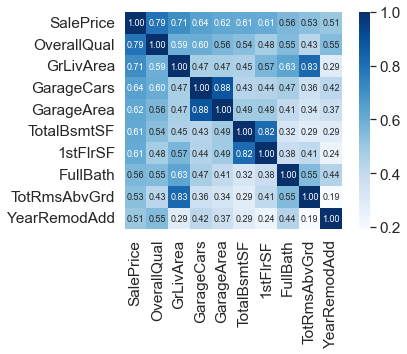

In [16]:
# Trying to check the top 10 most correlated attributes

k = 10
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.4)
hm = sns.heatmap(cm, cmap="Blues", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# With this we can focus on these 9 variables for our analysis further down

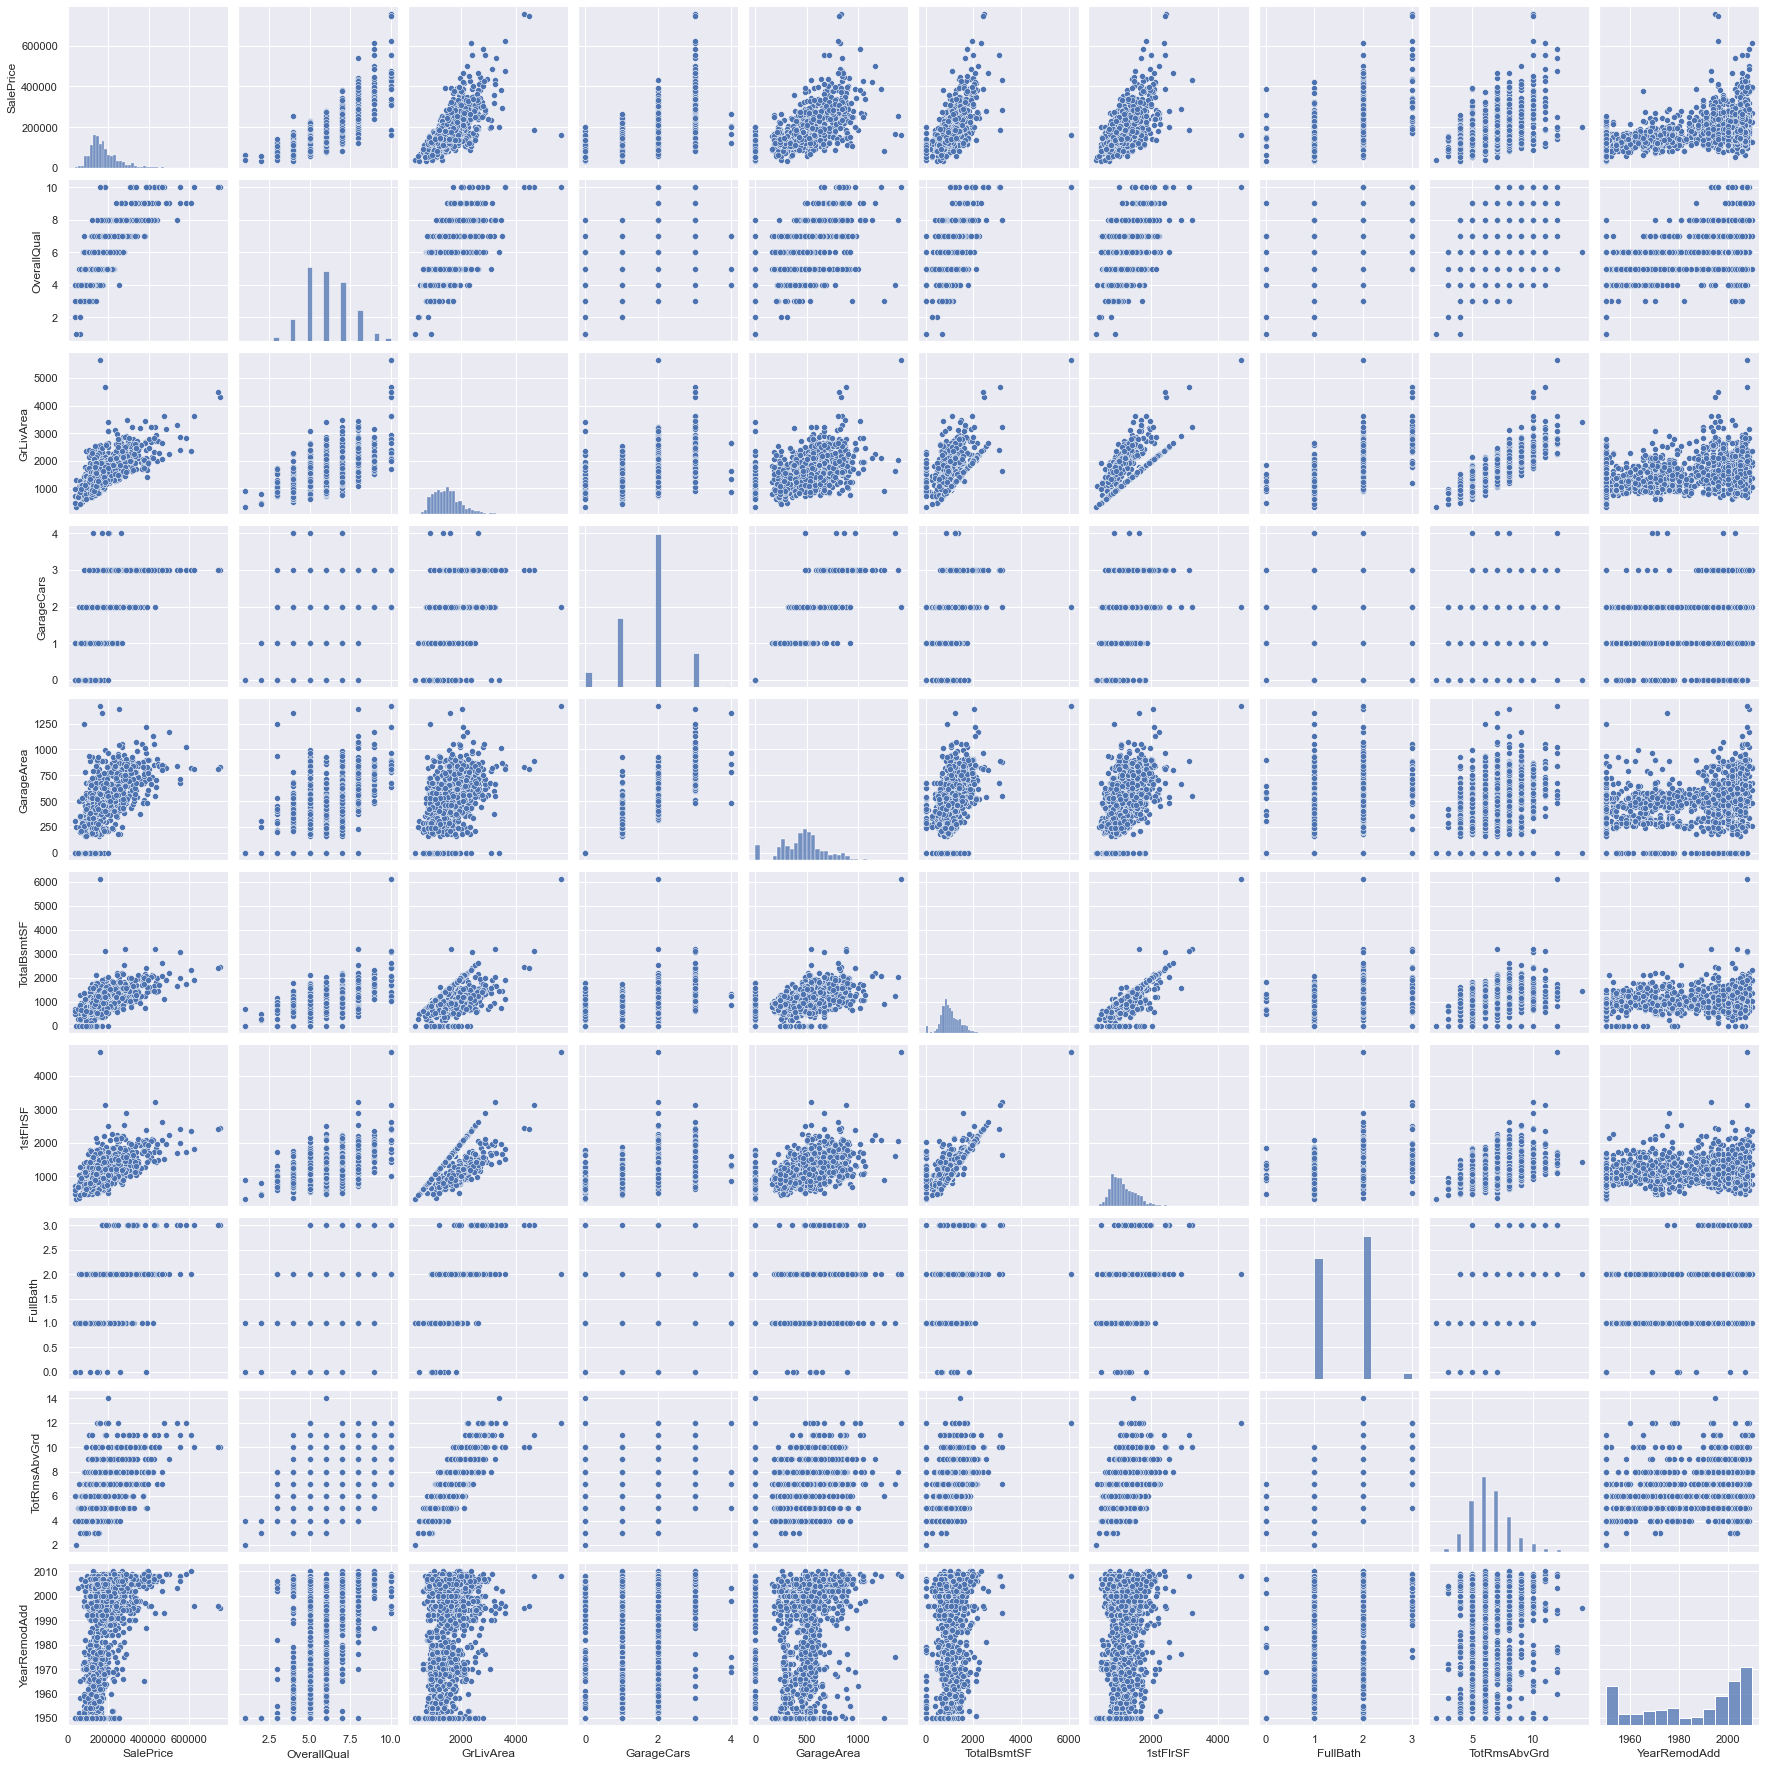

In [17]:
# Generating a pair-plot with these 9 variables to see if they show any trends

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearRemodAdd']
sns.pairplot(housing[cols],height = 2.5)
plt.show()

In [18]:
# pd.set_option('display.float_format', '{:.3%}'.format)
for c in housing.columns:
    if housing[c].dtype == np.object :
        print('\nColumn ',c)
        print(housing[c].value_counts(normalize=True))


Column  MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

Column  Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64

Column  LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64

Column  LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64

Column  Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64

Column  LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64

Column  LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64

Column  Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
S

In [19]:
# There are a lot of columns with biased data. These columns have got values that are overweighed and can impact the model significantly. 
# We can safely drop few of these columns with more than 80% biased data

housing=housing.drop(columns=['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
                              'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 
                              'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'])

In [20]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   LotConfig      1460 non-null   object 
 5   Neighborhood   1460 non-null   object 
 6   HouseStyle     1460 non-null   object 
 7   OverallQual    1460 non-null   int64  
 8   OverallCond    1460 non-null   int64  
 9   YearRemodAdd   1460 non-null   int64  
 10  RoofStyle      1460 non-null   object 
 11  Exterior1st    1460 non-null   object 
 12  Exterior2nd    1460 non-null   object 
 13  MasVnrType     1460 non-null   object 
 14  MasVnrArea     1460 non-null   float64
 15  ExterQual      1460 non-null   object 
 16  Foundation     1460 non-null   object 
 17  BsmtQual       1460 non-null   object 
 18  BsmtExpo

# Creating dummy variables for object type columns

In [21]:
dummy_cols = []
for c in housing.columns:
    if housing[c].dtype == np.object:
        dummy_cols.append(c)
print('Dummy Cols are: ',dummy_cols)

Dummy Cols are:  ['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish']


In [22]:
# We can see that few of the columns like MSSubClass havent turned up. 
# We will convert them into object type and identify the dummy columns again.

# Converting MSSubClass to object
convert_to_obj = {'MSSubClass':object}
housing = housing.astype(convert_to_obj)

housing['LotShape'] = housing.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing['ExterQual'] = housing.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['BsmtQual'] = housing.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['BsmtExposure'] = housing.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing['BsmtFinType1'] = housing.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing['HeatingQC'] = housing.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['KitchenQual'] = housing.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['GarageFinish'] = housing.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})

convert_to_obj = {'LotShape':object}
housing = housing.astype(convert_to_obj)
convert_to_obj = {'GarageFinish':object}
housing = housing.astype(convert_to_obj)

housing.head(5)

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
0,60,RL,8450,3,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,3,PConc,4,1,6,706,0,150,856,4,856,854,0,1710,1,0,2,1,3,1,3,8,0,Attchd,2003.0,2,2,548,0,61,0,0,0,0,0,2,208500,5
1,20,RL,9600,3,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,2,CBlock,4,4,5,978,0,284,1262,4,1262,0,0,1262,0,1,2,0,3,1,2,6,1,Attchd,1976.0,2,2,460,298,0,0,0,0,0,0,5,181500,31
2,60,RL,11250,0,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,3,PConc,4,2,6,486,0,434,920,4,920,866,0,1786,1,0,2,1,3,1,3,6,1,Attchd,2001.0,2,2,608,0,42,0,0,0,0,0,9,223500,7
3,70,RL,9550,0,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,2,BrkTil,3,1,5,216,0,540,756,3,961,756,0,1717,1,0,1,0,3,1,3,7,1,Detchd,1998.0,1,3,642,0,35,272,0,0,0,0,2,140000,91
4,60,RL,14260,0,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,3,PConc,4,3,6,655,0,490,1145,4,1145,1053,0,2198,1,0,2,1,4,1,3,9,1,Attchd,2000.0,2,3,836,192,84,0,0,0,0,0,12,250000,8


In [23]:
# Rechecking for dummy columns again

dummy_cols = []
for c in housing.columns:
    if housing[c].dtype == np.object:
        dummy_cols.append(c)
print('Dummy Cols are: ',dummy_cols)

Dummy Cols are:  ['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


In [24]:
dummy_col_actual = pd.get_dummies(housing[['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 
                                        'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 
                                        'GarageFinish']], drop_first=True)

housing = pd.concat([housing,dummy_col_actual],axis='columns')

housing = housing.drop(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 
                                        'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 
                                        'GarageFinish'],axis='columns')


In [25]:
housing.head(5)

,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_1,LotShape_2,LotShape_3,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_1,GarageFinish_2,GarageFinish_3
0,8450,7,5,2003,196.0,3,4,1,6,706,0,150,856,4,856,854,0,1710,1,0,2,1,3,1,3,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,9600,6,8,1976,0.0,2,4,4,5,978,0,284,1262,4,1262,0,0,1262,0,1,2,0,3,1,2,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,11250,7,5,2002,162.0,3,4,2,6,486,0,434,920,4,920,866,0,1786,1,0,2,1,3,1,3,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,9550,7,5,1970,0.0,2,3,1,5,216,0,540,756,3,961,756,0,1717,1,0,1,0,3,1,3,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,14260,8,5,2000,350.0,3,4,3,6,655,0,490,1145,4,1145,1053,0,2198,1,0,2,1,4,1,3,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,

# Data Modelling

In [26]:
df_train,df_test = train_test_split(housing,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 148)
(439, 148)


In [27]:
df_train.describe()

,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_1,LotShape_2,LotShape_3,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_1,GarageFinish_2,GarageFinish_3
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,

In [28]:
# Rescaling all the numeric variables with data that is extremely high.

scaler = StandardScaler()
num_vars = ['LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea','ExterQual','BsmtQual',
            'BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','HeatingQC',
            '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
            'BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars',
            'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','HouseAge']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_1,LotShape_2,LotShape_3,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_1,GarageFinish_2,GarageFinish_3
318,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.143653,1.138412,1.159065,-0.293313,-0.454262,0.621091,0.871757,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,0.741868,1.555150,0.622148,0.590876,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,260000,-0.675791,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
239,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.607084,-0.753845,-0.761831,-0.293313,0.172244,-0.712611,-1.181447,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,-0.776063,0.308833,0.622148,-1.247132,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,113000,0.939707,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
986,-0.502762,-0.066511,2.216221,0.874765,-0.558025,-0.699764,-0.533302,-0.607084,-1.226909,-0.964030,-0.293313,-0.175567,-1.257424,-0.154845,-0.421449,0.667284,-0.124502,0.219811,-0.837450,-0.247791,-1.028080,-0.753316,-1.044452,-0.234155,0.741868,-0.937484,-0.927153,-1.205359,-1.034916,-1.023035,2.422143,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.105172,117000,1.961757,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0

In [29]:
df_train.describe()

,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_1,LotShape_2,LotShape_3,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_1,GarageFinish_2,GarageFinish_3
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0000

In [30]:
# Model Training
y_train = df_train.pop('SalePrice')
X_train = df_train

In [31]:
X_train.shape

(1021, 147)

In [32]:
# Using RFE to eliminate unwanted features

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=35)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotArea', False, 3),
 ('OverallQual', True, 1),
 ('OverallCond', False, 3),
 ('YearRemodAdd', False, 4),
 ('MasVnrArea', False, 3),
 ('ExterQual', False, 3),
 ('BsmtQual', False, 3),
 ('BsmtExposure', False, 3),
 ('BsmtFinType1', False, 4),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 4),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 3),
 ('BsmtHalfBath', False, 4),
 ('FullBath', False, 3),
 ('HalfBath', False, 4),
 ('BedroomAbvGr', False, 4),
 ('KitchenAbvGr', False, 4),
 ('KitchenQual', False, 3),
 ('TotRmsAbvGrd', False, 4),
 ('Fireplaces', False, 4),
 ('GarageYrBlt', False, 4),
 ('GarageCars', False, 3),
 ('GarageArea', False, 4),
 ('WoodDeckSF', False, 4),
 ('OpenPorchSF', False, 4),
 ('EnclosedPorch', False, 4),
 ('3SsnPorch', False, 4),
 ('ScreenPorch', False, 4),
 ('PoolArea', False, 4),
 ('MiscVal', False, 4),
 ('Mo

In [33]:
# Using Statsmodel to get the initial level statistics

col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     70.14
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          2.19e-320
Time:                        14:24:18   Log-Likelihood:                -12055.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     953   BIC:                         2.458e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.066e+05   1.17e+04      9.084      0.000    8.36e+04     1.3e+05
OverallQual            2.69e+04   1901.747     14.145      0.000    2.32e+04    3.06e+04
BsmtFinSF1            5857.2039    970.683      6.034      0.000    3952.280    7762.128
BsmtFinSF2             866.0087   1084.558      0.798      0.425   -1262.389    2994.406
BsmtUnfSF            -2913.6334    985.601     -2.956      0.003   -4847.832    -979.435
TotalBsmtSF           3408.3527   1459.147      2.336      0.020     544.840    6271.865
1stFlrSF              9428.4008   1807.024      5.218      0.000    5882.194     1.3e+04
2ndFlrSF              1.114e+04   1615.387      6.899      0.000    7974.401    1.43e+04
LowQualFinSF         -1400.3934   1262.070     -1.110      0.267   -3877.151    1076.365
GrLivArea             1.605e+04   1105.940     14.515      0.000    1.39e+04    1.82e+04
MSSubClass_40        -1.141e+04   2.21e+04     -0.516      0.606   -5.48e+04     3.2e+04
MSSubClass_45         2564.4600   1.11e+04      0.231      0.817   -1.92e+04    2.43e+04
MSSubClass_90        -1.751e+04   6132.231     -2.855      0.004   -2.95e+04   -5474.311
MSSubClass_120       -2.508e+04   5275.989     -4.753      0.000   -3.54e+04   -1.47e+04
MSSubClass_160       -3.095e+04   7867.741     -3.933      0.000   -4.64e+04   -1.55e+04
MSSubClass_180        1550.6031   1.98e+04      0.078      0.937   -3.72e+04    4.03e+04
MSSubClass_190       -1.163e+04   7310.812     -1.591      0.112    -2.6e+04    2713.124
MSZoning_FV           1.539e+04    1.7e+04      0.905      0.366    -1.8e+04    4.88e+04
MSZoning_RH           1.357e+04   1.63e+04      0.832      0.406   -1.84e+04    4.56e+04
MSZoning_RL           1.993e+04   1.33e+04      1.495      0.135   -6235.758    4.61e+04
MSZoning_RM           1.384e+04   1.35e+04      1.022      0.307   -1.27e+04    4.04e+04
LotShape_2           -2.915e+04   1.17e+04     -2.485      0.013   -5.22e+04   -6129.234
LotConfig_CulDSac     1.452e+04   4554.637      3.188      0.001    5580.102    2.35e+04
LotConfig_FR2        -9655.2544   6375.239     -1.514      0.130   -2.22e+04    2855.875
LotConfig_FR3        -1.468e+04   1.98e+04     -0.741      0.459   -5.36e+04    2.42e+04
Neighborhood_BrDale   5429.3287    1.3e+04      0.417      0.677   -2.01e+04     3.1e+04
Neighborhood_BrkSide  6323.8265   6002.934      1.053      0.292   -5456.670    1.81e+04
Neighborhood_ClearCr  2.703e+04   8205.610      3.294      0.001    1.09e+04    4.31e+04
Neighborhood_Crawfor  3.341e+04   6486.154      5.151      0.000    2.07e+04    4.61e+04
Neighborhood_MeadowV  6479.9043   1.81e+04      0.359      0.720    -2.9e+04    4.19e+04
Neighborhood_NPkVill  8535.4183   2.06e+04      0.413      0.679    -3.2e+04    4.91e+04
Neighborhood_NoRidge  5.926e+04   6759.351      8.767    

In [34]:
# Checking the VIF

# Defining a function to calculate VIF
def calculateVIF(X_train_rfe):
    vif = pd.DataFrame()
    vif['features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

calculateVIF(X_train_rfe)

,features,VIF
73,GarageFinish_3,inf
9,GrLivArea,inf
52,Exterior2nd_AsphShn,inf
55,Exterior2nd_CBlock,inf
40,Exterior1st_AsphShn,inf
...,...,...
23,LotConfig_FR2,1.08
24,LotConfig_FR3,1.04
65,MasVnrType_NA,1.03
0,const,0.00


In [35]:
# MSSubClass_180 has high p value. Hence dropping it and recalculating.

X_train_new = X_train_rfe.drop(['MSSubClass_180'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     71.28
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          2.58e-321
Time:                        14:24:19   Log-Likelihood:                -12055.
No. Observations:                1021   AIC:                         2.424e+04
Df Residuals:                     954   BIC:                         2.457e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.066e+05   1.17e+04      9.088      0.000    8.36e+04     1.3e+05
OverallQual            2.69e+04   1900.265     14.158      0.000    2.32e+04    3.06e+04
BsmtFinSF1            5858.3283    970.072      6.039      0.000    3954.607    7762.050
BsmtFinSF2             868.9823   1083.331      0.802      0.423   -1257.004    2994.969
BsmtUnfSF            -2916.4333    984.441     -2.963      0.003   -4848.354    -984.513
TotalBsmtSF           3407.8617   1458.373      2.337      0.020     545.871    6269.852
1stFlrSF              9430.2723   1805.926      5.222      0.000    5886.227     1.3e+04
2ndFlrSF              1.113e+04   1606.541      6.929      0.000    7979.158    1.43e+04
LowQualFinSF         -1401.9452   1261.258     -1.112      0.267   -3877.106    1073.215
GrLivArea             1.604e+04   1099.320     14.594      0.000    1.39e+04    1.82e+04
MSSubClass_40         -1.14e+04   2.21e+04     -0.516      0.606   -5.48e+04     3.2e+04
MSSubClass_45         2525.2612   1.11e+04      0.228      0.820   -1.92e+04    2.43e+04
MSSubClass_90        -1.751e+04   6128.747     -2.858      0.004   -2.95e+04   -5485.842
MSSubClass_120       -2.511e+04   5260.439     -4.773      0.000   -3.54e+04   -1.48e+04
MSSubClass_160       -3.108e+04   7663.198     -4.056      0.000   -4.61e+04    -1.6e+04
MSSubClass_190       -1.165e+04   7305.179     -1.594      0.111    -2.6e+04    2689.230
MSZoning_FV           1.545e+04    1.7e+04      0.910      0.363   -1.79e+04    4.88e+04
MSZoning_RH           1.359e+04   1.63e+04      0.834      0.405   -1.84e+04    4.56e+04
MSZoning_RL           1.994e+04   1.33e+04      1.497      0.135   -6198.531    4.61e+04
MSZoning_RM           1.388e+04   1.35e+04      1.026      0.305   -1.27e+04    4.04e+04
LotShape_2           -2.915e+04   1.17e+04     -2.486      0.013   -5.22e+04   -6139.156
LotConfig_CulDSac     1.451e+04   4551.406      3.188      0.001    5579.517    2.34e+04
LotConfig_FR2        -9653.7621   6371.889     -1.515      0.130   -2.22e+04    2850.776
LotConfig_FR3        -1.466e+04   1.98e+04     -0.741      0.459   -5.35e+04    2.42e+04
Neighborhood_BrDale   5531.8255    1.3e+04      0.427      0.670   -1.99e+04     3.1e+04
Neighborhood_BrkSide  6305.4822   5995.255      1.052      0.293   -5459.929    1.81e+04
Neighborhood_ClearCr  2.703e+04   8200.748      3.296      0.001    1.09e+04    4.31e+04
Neighborhood_Crawfor  3.341e+04   6482.774      5.154      0.000    2.07e+04    4.61e+04
Neighborhood_MeadowV  7344.1691   1.43e+04      0.513      0.608   -2.07e+04    3.54e+04
Neighborhood_NPkVill  8572.8464   2.06e+04      0.415      0.678   -3.19e+04    4.91e+04
Neighborhood_NoRidge  5.928e+04   6750.189      8.783      0.000     4.6e+04    7.25e+04
Neighborhood_NridgHt  6.445e+04   5590.812     11.528    

In [36]:
calculateVIF(X_train_lm)

,features,VIF
72,GarageFinish_3,inf
8,LowQualFinSF,inf
51,Exterior2nd_AsphShn,inf
39,Exterior1st_AsphShn,inf
41,Exterior1st_CBlock,inf
...,...,...
22,LotConfig_FR2,1.08
23,LotConfig_FR3,1.04
64,MasVnrType_NA,1.03
0,const,0.00


In [37]:
# MasVnrType_NA has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['MasVnrType_NA'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     72.45
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          3.06e-322
Time:                        14:24:19   Log-Likelihood:                -12055.
No. Observations:                1021   AIC:                         2.424e+04
Df Residuals:                     955   BIC:                         2.457e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.067e+05   1.17e+04      9.094      0.000    8.36e+04     1.3e+05
OverallQual           2.691e+04   1898.893     14.172      0.000    2.32e+04    3.06e+04
BsmtFinSF1            5861.7237    969.434      6.047      0.000    3959.256    7764.191
BsmtFinSF2             867.7093   1082.767      0.801      0.423   -1257.168    2992.587
BsmtUnfSF            -2919.5582    983.821     -2.968      0.003   -4850.259    -988.857
TotalBsmtSF           3407.7736   1457.640      2.338      0.020     547.227    6268.320
1stFlrSF              9428.0243   1804.982      5.223      0.000    5885.835     1.3e+04
2ndFlrSF              1.113e+04   1605.679      6.931      0.000    7978.223    1.43e+04
LowQualFinSF         -1398.9788   1260.536     -1.110      0.267   -3872.719    1074.761
GrLivArea             1.604e+04   1098.621     14.600      0.000    1.39e+04    1.82e+04
MSSubClass_40        -1.144e+04   2.21e+04     -0.518      0.605   -5.48e+04    3.19e+04
MSSubClass_45         2535.2822   1.11e+04      0.229      0.819   -1.92e+04    2.43e+04
MSSubClass_90        -1.751e+04   6125.659     -2.859      0.004   -2.95e+04   -5490.279
MSSubClass_120       -2.516e+04   5250.555     -4.792      0.000   -3.55e+04   -1.49e+04
MSSubClass_160       -3.113e+04   7656.452     -4.065      0.000   -4.62e+04   -1.61e+04
MSSubClass_190       -1.164e+04   7301.494     -1.595      0.111    -2.6e+04    2684.532
MSZoning_FV           1.559e+04    1.7e+04      0.920      0.358   -1.77e+04    4.89e+04
MSZoning_RH            1.36e+04   1.63e+04      0.835      0.404   -1.84e+04    4.56e+04
MSZoning_RL           1.994e+04   1.33e+04      1.498      0.135   -6186.021    4.61e+04
MSZoning_RM           1.389e+04   1.35e+04      1.027      0.305   -1.27e+04    4.04e+04
LotShape_2           -2.918e+04   1.17e+04     -2.490      0.013   -5.22e+04   -6184.210
LotConfig_CulDSac      1.45e+04   4548.871      3.188      0.001    5575.066    2.34e+04
LotConfig_FR2        -9686.9953   6366.501     -1.522      0.128   -2.22e+04    2806.952
LotConfig_FR3        -1.468e+04   1.98e+04     -0.742      0.458   -5.35e+04    2.41e+04
Neighborhood_BrDale   5555.9942    1.3e+04      0.429      0.668   -1.99e+04     3.1e+04
Neighborhood_BrkSide  6303.8596   5992.235      1.052      0.293   -5455.608    1.81e+04
Neighborhood_ClearCr  2.704e+04   8196.616      3.298      0.001    1.09e+04    4.31e+04
Neighborhood_Crawfor   3.34e+04   6479.340      5.155      0.000    2.07e+04    4.61e+04
Neighborhood_MeadowV  7254.5057   1.43e+04      0.508      0.612   -2.08e+04    3.53e+04
Neighborhood_NPkVill  8615.4533   2.06e+04      0.418      0.676   -3.19e+04    4.91e+04
Neighborhood_NoRidge  5.927e+04   6746.362      8.785      0.000     4.6e+04    7.25e+04
Neighborhood_NridgHt  6.448e+04   5586.201     11.543    

In [38]:
calculateVIF(X_train_lm)

,features,VIF
71,GarageFinish_3,inf
9,GrLivArea,inf
51,Exterior2nd_AsphShn,inf
54,Exterior2nd_CBlock,inf
39,Exterior1st_AsphShn,inf
...,...,...
20,LotShape_2,1.09
22,LotConfig_FR2,1.08
23,LotConfig_FR3,1.04
0,const,0.00


In [39]:
# MSSubClass_45 has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['MSSubClass_45'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     73.65
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          3.46e-323
Time:                        14:24:20   Log-Likelihood:                -12055.
No. Observations:                1021   AIC:                         2.424e+04
Df Residuals:                     956   BIC:                         2.456e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.068e+05   1.17e+04      9.118      0.000    8.38e+04     1.3e+05
OverallQual           2.695e+04   1891.827     14.243      0.000    2.32e+04    3.07e+04
BsmtFinSF1            5856.3447    968.670      6.046      0.000    3955.380    7757.309
BsmtFinSF2             864.1636   1082.120      0.799      0.425   -1259.441    2987.768
BsmtUnfSF            -2906.8218    981.763     -2.961      0.003   -4833.481    -980.163
TotalBsmtSF           3413.4535   1456.707      2.343      0.019     554.742    6272.165
1stFlrSF              9456.2306   1799.886      5.254      0.000    5924.046     1.3e+04
2ndFlrSF              1.104e+04   1559.257      7.082      0.000    7982.229    1.41e+04
LowQualFinSF         -1423.5659   1255.337     -1.134      0.257   -3887.100    1039.968
GrLivArea             1.599e+04   1073.977     14.886      0.000    1.39e+04    1.81e+04
MSSubClass_40        -1.139e+04   2.21e+04     -0.516      0.606   -5.47e+04    3.19e+04
MSSubClass_90        -1.757e+04   6118.130     -2.871      0.004   -2.96e+04   -5558.823
MSSubClass_120       -2.519e+04   5246.844     -4.800      0.000   -3.55e+04   -1.49e+04
MSSubClass_160       -3.119e+04   7648.201     -4.078      0.000   -4.62e+04   -1.62e+04
MSSubClass_190       -1.174e+04   7284.921     -1.612      0.107    -2.6e+04    2552.362
MSZoning_FV           1.558e+04   1.69e+04      0.920      0.358   -1.77e+04    4.88e+04
MSZoning_RH           1.375e+04   1.63e+04      0.845      0.398   -1.82e+04    4.57e+04
MSZoning_RL           1.994e+04   1.33e+04      1.498      0.134   -6179.262    4.61e+04
MSZoning_RM           1.394e+04   1.35e+04      1.031      0.303   -1.26e+04    4.05e+04
LotShape_2           -2.915e+04   1.17e+04     -2.489      0.013   -5.21e+04   -6168.958
LotConfig_CulDSac     1.449e+04   4546.084      3.186      0.001    5564.609    2.34e+04
LotConfig_FR2        -9712.8068   6362.349     -1.527      0.127   -2.22e+04    2772.976
LotConfig_FR3        -1.477e+04   1.98e+04     -0.747      0.455   -5.36e+04     2.4e+04
Neighborhood_BrDale   5466.7377   1.29e+04      0.423      0.673   -1.99e+04    3.09e+04
Neighborhood_BrkSide  6364.6478   5983.391      1.064      0.288   -5377.449    1.81e+04
Neighborhood_ClearCr  2.702e+04   8192.358      3.298      0.001    1.09e+04    4.31e+04
Neighborhood_Crawfor  3.348e+04   6466.616      5.178      0.000    2.08e+04    4.62e+04
Neighborhood_MeadowV  7107.1676   1.43e+04      0.498      0.619   -2.09e+04    3.51e+04
Neighborhood_NPkVill  8659.2591   2.06e+04      0.420      0.674   -3.18e+04    4.91e+04
Neighborhood_NoRidge  5.935e+04   6733.970      8.813      0.000    4.61e+04    7.26e+04
Neighborhood_NridgHt  6.447e+04   5583.245     11.547      0.000    5.35e+04    7.54e+04
Neighborhood_Somerst  3.485e+04   9237.122      3.773    

In [40]:
calculateVIF(X_train_lm)

,features,VIF
70,GarageFinish_3,inf
9,GrLivArea,inf
53,Exterior2nd_CBlock,inf
38,Exterior1st_AsphShn,inf
40,Exterior1st_CBlock,inf
...,...,...
19,LotShape_2,1.09
21,LotConfig_FR2,1.08
22,LotConfig_FR3,1.04
0,const,0.00


In [41]:
# Exterior1st_CBlock has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['Exterior1st_CBlock'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     73.65
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          3.46e-323
Time:                        14:24:20   Log-Likelihood:                -12055.
No. Observations:                1021   AIC:                         2.424e+04
Df Residuals:                     956   BIC:                         2.456e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.068e+05   1.17e+04      9.118      0.000    8.38e+04     1.3e+05
OverallQual           2.695e+04   1891.827     14.243      0.000    2.32e+04    3.07e+04
BsmtFinSF1            5856.3447    968.670      6.046      0.000    3955.380    7757.309
BsmtFinSF2             864.1636   1082.120      0.799      0.425   -1259.441    2987.768
BsmtUnfSF            -2906.8218    981.763     -2.961      0.003   -4833.481    -980.163
TotalBsmtSF           3413.4535   1456.707      2.343      0.019     554.742    6272.165
1stFlrSF              9456.2306   1799.886      5.254      0.000    5924.046     1.3e+04
2ndFlrSF              1.104e+04   1559.257      7.082      0.000    7982.229    1.41e+04
LowQualFinSF         -1423.5659   1255.337     -1.134      0.257   -3887.100    1039.968
GrLivArea             1.599e+04   1073.977     14.886      0.000    1.39e+04    1.81e+04
MSSubClass_40        -1.139e+04   2.21e+04     -0.516      0.606   -5.47e+04    3.19e+04
MSSubClass_90        -1.757e+04   6118.130     -2.871      0.004   -2.96e+04   -5558.823
MSSubClass_120       -2.519e+04   5246.844     -4.800      0.000   -3.55e+04   -1.49e+04
MSSubClass_160       -3.119e+04   7648.201     -4.078      0.000   -4.62e+04   -1.62e+04
MSSubClass_190       -1.174e+04   7284.921     -1.612      0.107    -2.6e+04    2552.362
MSZoning_FV           1.558e+04   1.69e+04      0.920      0.358   -1.77e+04    4.88e+04
MSZoning_RH           1.375e+04   1.63e+04      0.845      0.398   -1.82e+04    4.57e+04
MSZoning_RL           1.994e+04   1.33e+04      1.498      0.134   -6179.262    4.61e+04
MSZoning_RM           1.394e+04   1.35e+04      1.031      0.303   -1.26e+04    4.05e+04
LotShape_2           -2.915e+04   1.17e+04     -2.489      0.013   -5.21e+04   -6168.958
LotConfig_CulDSac     1.449e+04   4546.084      3.186      0.001    5564.609    2.34e+04
LotConfig_FR2        -9712.8068   6362.349     -1.527      0.127   -2.22e+04    2772.976
LotConfig_FR3        -1.477e+04   1.98e+04     -0.747      0.455   -5.36e+04     2.4e+04
Neighborhood_BrDale   5466.7377   1.29e+04      0.423      0.673   -1.99e+04    3.09e+04
Neighborhood_BrkSide  6364.6478   5983.391      1.064      0.288   -5377.449    1.81e+04
Neighborhood_ClearCr  2.702e+04   8192.358      3.298      0.001    1.09e+04    4.31e+04
Neighborhood_Crawfor  3.348e+04   6466.616      5.178      0.000    2.08e+04    4.62e+04
Neighborhood_MeadowV  7107.1676   1.43e+04      0.498      0.619   -2.09e+04    3.51e+04
Neighborhood_NPkVill  8659.2591   2.06e+04      0.420      0.674   -3.18e+04    4.91e+04
Neighborhood_NoRidge  5.935e+04   6733.970      8.813      0.000    4.61e+04    7.26e+04
Neighborhood_NridgHt  6.447e+04   5583.245     11.547      0.000    5.35e+04    7.54e+04
Neighborhood_Somerst  3.485e+04   9237.122      3.773    

In [42]:
calculateVIF(X_train_lm)

,features,VIF
69,GarageFinish_3,inf
8,LowQualFinSF,inf
38,Exterior1st_AsphShn,inf
49,Exterior2nd_AsphShn,inf
66,GarageType_NA,inf
...,...,...
21,LotConfig_FR2,1.08
52,Exterior2nd_CBlock,1.05
22,LotConfig_FR3,1.04
0,const,0.00


In [43]:
# Exterior2nd_CBlock has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['Exterior2nd_CBlock'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     74.88
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          4.94e-324
Time:                        14:24:21   Log-Likelihood:                -12055.
No. Observations:                1021   AIC:                         2.424e+04
Df Residuals:                     957   BIC:                         2.455e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.066e+05   1.17e+04      9.113      0.000    8.36e+04     1.3e+05
OverallQual             2.7e+04   1886.304     14.313      0.000    2.33e+04    3.07e+04
BsmtFinSF1            5850.3341    968.127      6.043      0.000    3950.438    7750.230
BsmtFinSF2             854.2041   1081.356      0.790      0.430   -1267.899    2976.307
BsmtUnfSF            -2917.7681    980.947     -2.974      0.003   -4842.824    -992.712
TotalBsmtSF           3392.9584   1455.159      2.332      0.020     537.287    6248.629
1stFlrSF              9470.0396   1798.762      5.265      0.000    5940.066     1.3e+04
2ndFlrSF              1.103e+04   1558.463      7.081      0.000    7976.452    1.41e+04
LowQualFinSF         -1422.9337   1254.784     -1.134      0.257   -3885.380    1039.513
GrLivArea             1.599e+04   1073.449     14.897      0.000    1.39e+04    1.81e+04
MSSubClass_40        -1.147e+04   2.21e+04     -0.520      0.603   -5.48e+04    3.18e+04
MSSubClass_90        -1.757e+04   6115.441     -2.872      0.004   -2.96e+04   -5565.238
MSSubClass_120        -2.52e+04   5244.456     -4.805      0.000   -3.55e+04   -1.49e+04
MSSubClass_160       -3.116e+04   7644.634     -4.077      0.000   -4.62e+04   -1.62e+04
MSSubClass_190       -1.175e+04   7281.713     -1.613      0.107    -2.6e+04    2542.266
MSZoning_FV           1.552e+04   1.69e+04      0.916      0.360   -1.77e+04    4.88e+04
MSZoning_RH           1.368e+04   1.63e+04      0.841      0.400   -1.82e+04    4.56e+04
MSZoning_RL           1.985e+04   1.33e+04      1.492      0.136   -6254.482    4.59e+04
MSZoning_RM            1.39e+04   1.35e+04      1.029      0.304   -1.26e+04    4.04e+04
LotShape_2           -2.914e+04   1.17e+04     -2.489      0.013   -5.21e+04   -6166.681
LotConfig_CulDSac     1.448e+04   4544.046      3.186      0.001    5560.989    2.34e+04
LotConfig_FR2        -9717.9487   6359.539     -1.528      0.127   -2.22e+04    2762.304
LotConfig_FR3        -1.477e+04   1.98e+04     -0.748      0.455   -5.36e+04     2.4e+04
Neighborhood_BrDale   5417.2964   1.29e+04      0.419      0.675      -2e+04    3.08e+04
Neighborhood_BrkSide  6413.4800   5979.507      1.073      0.284   -5320.980    1.81e+04
Neighborhood_ClearCr  2.705e+04   8188.451      3.304      0.001     1.1e+04    4.31e+04
Neighborhood_Crawfor  3.351e+04   6463.404      5.185      0.000    2.08e+04    4.62e+04
Neighborhood_MeadowV  7099.3908   1.43e+04      0.498      0.619   -2.09e+04    3.51e+04
Neighborhood_NPkVill  8666.0590   2.06e+04      0.421      0.674   -3.18e+04    4.91e+04
Neighborhood_NoRidge  5.934e+04   6730.979      8.816      0.000    4.61e+04    7.25e+04
Neighborhood_NridgHt  6.444e+04   5580.122     11.547      0.000    5.35e+04    7.54e+04
Neighborhood_Somerst  3.482e+04   9232.797      3.772    

In [44]:
calculateVIF(X_train_lm)

,features,VIF
68,GarageFinish_3,inf
8,LowQualFinSF,inf
38,Exterior1st_AsphShn,inf
49,Exterior2nd_AsphShn,inf
65,GarageType_NA,inf
...,...,...
19,LotShape_2,1.09
21,LotConfig_FR2,1.08
22,LotConfig_FR3,1.04
0,const,0.00


In [45]:
# RoofStyle_Shed has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['RoofStyle_Shed'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     76.15
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:21   Log-Likelihood:                -12055.
No. Observations:                1021   AIC:                         2.424e+04
Df Residuals:                     958   BIC:                         2.455e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.066e+05   1.17e+04      9.124      0.000    8.37e+04     1.3e+05
OverallQual           2.699e+04   1885.383     14.316      0.000    2.33e+04    3.07e+04
BsmtFinSF1            5874.2112    966.017      6.081      0.000    3978.458    7769.964
BsmtFinSF2             859.7205   1080.809      0.795      0.427   -1261.306    2980.747
BsmtUnfSF            -2903.0981    979.894     -2.963      0.003   -4826.085    -980.111
TotalBsmtSF           3433.5404   1451.278      2.366      0.018     585.489    6281.592
1stFlrSF              9424.3410   1794.650      5.251      0.000    5902.443    1.29e+04
2ndFlrSF              1.108e+04   1554.371      7.127      0.000    8027.549    1.41e+04
LowQualFinSF         -1462.7632   1250.608     -1.170      0.242   -3917.010     991.484
GrLivArea             1.599e+04   1072.969     14.902      0.000    1.39e+04    1.81e+04
MSSubClass_40        -7711.3784   2.01e+04     -0.383      0.702   -4.72e+04    3.18e+04
MSSubClass_90        -1.729e+04   6076.240     -2.845      0.005   -2.92e+04   -5363.539
MSSubClass_120       -2.518e+04   5242.070     -4.804      0.000   -3.55e+04   -1.49e+04
MSSubClass_160        -3.12e+04   7640.884     -4.083      0.000   -4.62e+04   -1.62e+04
MSSubClass_190       -1.173e+04   7278.474     -1.612      0.107    -2.6e+04    2551.791
MSZoning_FV           1.548e+04   1.69e+04      0.915      0.361   -1.77e+04    4.87e+04
MSZoning_RH           1.366e+04   1.63e+04      0.840      0.401   -1.82e+04    4.56e+04
MSZoning_RL           1.984e+04   1.33e+04      1.492      0.136   -6251.064    4.59e+04
MSZoning_RM            1.39e+04   1.35e+04      1.029      0.304   -1.26e+04    4.04e+04
LotShape_2           -2.925e+04   1.17e+04     -2.500      0.013   -5.22e+04   -6284.556
LotConfig_CulDSac     1.444e+04   4541.203      3.180      0.002    5529.185    2.34e+04
LotConfig_FR2        -9701.4910   6356.675     -1.526      0.127   -2.22e+04    2773.124
LotConfig_FR3        -1.476e+04   1.98e+04     -0.747      0.455   -5.35e+04     2.4e+04
Neighborhood_BrDale   5513.0773   1.29e+04      0.427      0.670   -1.98e+04    3.09e+04
Neighborhood_BrkSide  6342.5294   5974.512      1.062      0.289   -5382.111    1.81e+04
Neighborhood_ClearCr  2.736e+04   8150.622      3.357      0.001    1.14e+04    4.34e+04
Neighborhood_Crawfor   3.35e+04   6460.556      5.185      0.000    2.08e+04    4.62e+04
Neighborhood_MeadowV  7155.2580   1.43e+04      0.502      0.616   -2.08e+04    3.51e+04
Neighborhood_NPkVill  8371.5484   2.06e+04      0.407      0.684    -3.2e+04    4.88e+04
Neighborhood_NoRidge   5.93e+04   6727.320      8.815      0.000    4.61e+04    7.25e+04
Neighborhood_NridgHt   6.44e+04   5576.955     11.547      0.000    5.35e+04    7.53e+04
Neighborhood_Somerst  3.485e+04   9228.542      3.777    

In [46]:
calculateVIF(X_train_lm)

,features,VIF
67,GarageFinish_3,inf
64,GarageType_NA,inf
2,BsmtFinSF1,inf
3,BsmtFinSF2,inf
4,BsmtUnfSF,inf
...,...,...
21,LotConfig_FR2,1.08
10,MSSubClass_40,1.08
22,LotConfig_FR3,1.04
0,const,0.00


In [47]:
# MSSubClass_40 has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['MSSubClass_40'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     77.47
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:21   Log-Likelihood:                -12055.
No. Observations:                1021   AIC:                         2.423e+04
Df Residuals:                     959   BIC:                         2.454e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.068e+05   1.17e+04      9.146      0.000    8.39e+04     1.3e+05
OverallQual           2.697e+04   1884.021     14.317      0.000    2.33e+04    3.07e+04
BsmtFinSF1            5870.1840    965.530      6.080      0.000    3975.389    7764.979
BsmtFinSF2             876.1206   1079.480      0.812      0.417   -1242.295    2994.536
BsmtUnfSF            -2896.2201    979.294     -2.957      0.003   -4818.026    -974.414
TotalBsmtSF           3442.2863   1450.453      2.373      0.018     595.858    6288.715
1stFlrSF              9458.8911   1791.584      5.280      0.000    5943.013     1.3e+04
2ndFlrSF              1.105e+04   1551.689      7.120      0.000    8002.687    1.41e+04
LowQualFinSF         -1546.2925   1230.904     -1.256      0.209   -3961.868     869.283
GrLivArea             1.598e+04   1072.362     14.904      0.000    1.39e+04    1.81e+04
MSSubClass_90        -1.729e+04   6073.519     -2.847      0.005   -2.92e+04   -5374.402
MSSubClass_120        -2.51e+04   5235.119     -4.794      0.000   -3.54e+04   -1.48e+04
MSSubClass_160       -3.121e+04   7637.413     -4.087      0.000   -4.62e+04   -1.62e+04
MSSubClass_190       -1.173e+04   7275.230     -1.612      0.107    -2.6e+04    2548.889
MSZoning_FV           1.538e+04   1.69e+04      0.909      0.364   -1.78e+04    4.86e+04
MSZoning_RH           1.355e+04   1.62e+04      0.834      0.404   -1.83e+04    4.54e+04
MSZoning_RL           1.976e+04   1.33e+04      1.487      0.137   -6315.728    4.58e+04
MSZoning_RM           1.376e+04   1.35e+04      1.020      0.308   -1.27e+04    4.02e+04
LotShape_2           -2.926e+04   1.17e+04     -2.502      0.013   -5.22e+04   -6311.536
LotConfig_CulDSac     1.449e+04   4537.461      3.193      0.001    5584.441    2.34e+04
LotConfig_FR2        -9660.4710   6352.945     -1.521      0.129   -2.21e+04    2806.807
LotConfig_FR3        -1.469e+04   1.97e+04     -0.744      0.457   -5.34e+04    2.41e+04
Neighborhood_BrDale   5603.9324   1.29e+04      0.434      0.664   -1.97e+04     3.1e+04
Neighborhood_BrkSide  6127.8829   5945.531      1.031      0.303   -5539.869    1.78e+04
Neighborhood_ClearCr  2.698e+04   8084.707      3.337      0.001    1.11e+04    4.28e+04
Neighborhood_Crawfor  3.347e+04   6457.351      5.184      0.000    2.08e+04    4.61e+04
Neighborhood_MeadowV  7140.3944   1.42e+04      0.501      0.616   -2.08e+04    3.51e+04
Neighborhood_NPkVill  8424.5743   2.06e+04      0.410      0.682   -3.19e+04    4.88e+04
Neighborhood_NoRidge   5.93e+04   6724.322      8.818      0.000    4.61e+04    7.25e+04
Neighborhood_NridgHt  6.439e+04   5574.442     11.551      0.000    5.35e+04    7.53e+04
Neighborhood_Somerst  3.488e+04   9224.154      3.781      0.000    1.68e+04     5.3e+04
Neighborhood_StoneBr  4.014e+04   1.03e+04      3.893    

In [48]:
calculateVIF(X_train_lm)

,features,VIF
66,GarageFinish_3,inf
7,2ndFlrSF,inf
47,Exterior2nd_AsphShn,inf
63,GarageType_NA,inf
64,GarageFinish_1,inf
...,...,...
59,Foundation_Stone,1.09
20,LotConfig_FR2,1.08
21,LotConfig_FR3,1.04
0,const,0.00


In [49]:

# Neighborhood_NPkVill has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['Neighborhood_NPkVill'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     78.83
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:22   Log-Likelihood:                -12055.
No. Observations:                1021   AIC:                         2.423e+04
Df Residuals:                     960   BIC:                         2.453e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.067e+05   1.17e+04      9.146      0.000    8.38e+04     1.3e+05
OverallQual           2.698e+04   1883.092     14.329      0.000    2.33e+04    3.07e+04
BsmtFinSF1            5875.9190    965.010      6.089      0.000    3982.147    7769.691
BsmtFinSF2             867.3414   1078.799      0.804      0.422   -1249.735    2984.418
BsmtUnfSF            -2871.9008    977.068     -2.939      0.003   -4789.336    -954.465
TotalBsmtSF           3468.6001   1448.401      2.395      0.017     626.203    6310.998
1stFlrSF              9402.3614   1785.485      5.266      0.000    5898.458    1.29e+04
2ndFlrSF              1.108e+04   1549.121      7.152      0.000    8039.139    1.41e+04
LowQualFinSF         -1545.2119   1230.367     -1.256      0.209   -3959.731     869.308
GrLivArea             1.597e+04   1071.142     14.906      0.000    1.39e+04    1.81e+04
MSSubClass_90        -1.735e+04   6069.409     -2.858      0.004   -2.93e+04   -5437.340
MSSubClass_120       -2.463e+04   5104.322     -4.825      0.000   -3.46e+04   -1.46e+04
MSSubClass_160       -3.119e+04   7633.977     -4.086      0.000   -4.62e+04   -1.62e+04
MSSubClass_190       -1.171e+04   7271.897     -1.610      0.108    -2.6e+04    2563.198
MSZoning_FV           1.539e+04   1.69e+04      0.910      0.363   -1.78e+04    4.86e+04
MSZoning_RH           1.357e+04   1.62e+04      0.836      0.403   -1.83e+04    4.54e+04
MSZoning_RL           1.986e+04   1.33e+04      1.496      0.135   -6200.240    4.59e+04
MSZoning_RM           1.379e+04   1.35e+04      1.022      0.307   -1.27e+04    4.03e+04
LotShape_2           -2.927e+04   1.17e+04     -2.504      0.012   -5.22e+04   -6327.499
LotConfig_CulDSac     1.445e+04   4534.364      3.186      0.001    5549.064    2.33e+04
LotConfig_FR2        -9673.5599   6350.110     -1.523      0.128   -2.21e+04    2788.139
LotConfig_FR3        -1.478e+04   1.97e+04     -0.749      0.454   -5.35e+04     2.4e+04
Neighborhood_BrDale   5626.9078   1.29e+04      0.436      0.663   -1.97e+04     3.1e+04
Neighborhood_BrkSide  6135.2506   5942.926      1.032      0.302   -5527.374    1.78e+04
Neighborhood_ClearCr   2.68e+04   8069.526      3.321      0.001     1.1e+04    4.26e+04
Neighborhood_Crawfor  3.341e+04   6452.548      5.178      0.000    2.07e+04    4.61e+04
Neighborhood_MeadowV  7147.7149   1.42e+04      0.502      0.616   -2.08e+04    3.51e+04
Neighborhood_NoRidge  5.933e+04   6720.918      8.827      0.000    4.61e+04    7.25e+04
Neighborhood_NridgHt  6.426e+04   5563.380     11.551      0.000    5.33e+04    7.52e+04
Neighborhood_Somerst   3.49e+04   9220.001      3.785      0.000    1.68e+04     5.3e+04
Neighborhood_StoneBr  3.986e+04   1.03e+04      3.876      0.000    1.97e+04       6e+04
Neighborhood_Veenker  3.895e+04   1.09e+04      3.558    

In [50]:
calculateVIF(X_train_lm)

,features,VIF
65,GarageFinish_3,inf
7,2ndFlrSF,inf
46,Exterior2nd_AsphShn,inf
62,GarageType_NA,inf
63,GarageFinish_1,inf
...,...,...
58,Foundation_Stone,1.09
20,LotConfig_FR2,1.08
21,LotConfig_FR3,1.04
0,const,0.00


In [51]:

# Exterior2nd_Other has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['Exterior2nd_Other'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     78.83
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:22   Log-Likelihood:                -12055.
No. Observations:                1021   AIC:                         2.423e+04
Df Residuals:                     960   BIC:                         2.453e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.067e+05   1.17e+04      9.146      0.000    8.38e+04     1.3e+05
OverallQual           2.698e+04   1883.092     14.329      0.000    2.33e+04    3.07e+04
BsmtFinSF1            5875.9190    965.010      6.089      0.000    3982.147    7769.691
BsmtFinSF2             867.3414   1078.799      0.804      0.422   -1249.735    2984.418
BsmtUnfSF            -2871.9008    977.068     -2.939      0.003   -4789.336    -954.465
TotalBsmtSF           3468.6001   1448.401      2.395      0.017     626.203    6310.998
1stFlrSF              9402.3614   1785.485      5.266      0.000    5898.458    1.29e+04
2ndFlrSF              1.108e+04   1549.121      7.152      0.000    8039.139    1.41e+04
LowQualFinSF         -1545.2119   1230.367     -1.256      0.209   -3959.731     869.308
GrLivArea             1.597e+04   1071.142     14.906      0.000    1.39e+04    1.81e+04
MSSubClass_90        -1.735e+04   6069.409     -2.858      0.004   -2.93e+04   -5437.340
MSSubClass_120       -2.463e+04   5104.322     -4.825      0.000   -3.46e+04   -1.46e+04
MSSubClass_160       -3.119e+04   7633.977     -4.086      0.000   -4.62e+04   -1.62e+04
MSSubClass_190       -1.171e+04   7271.897     -1.610      0.108    -2.6e+04    2563.198
MSZoning_FV           1.539e+04   1.69e+04      0.910      0.363   -1.78e+04    4.86e+04
MSZoning_RH           1.357e+04   1.62e+04      0.836      0.403   -1.83e+04    4.54e+04
MSZoning_RL           1.986e+04   1.33e+04      1.496      0.135   -6200.240    4.59e+04
MSZoning_RM           1.379e+04   1.35e+04      1.022      0.307   -1.27e+04    4.03e+04
LotShape_2           -2.927e+04   1.17e+04     -2.504      0.012   -5.22e+04   -6327.499
LotConfig_CulDSac     1.445e+04   4534.364      3.186      0.001    5549.064    2.33e+04
LotConfig_FR2        -9673.5599   6350.110     -1.523      0.128   -2.21e+04    2788.139
LotConfig_FR3        -1.478e+04   1.97e+04     -0.749      0.454   -5.35e+04     2.4e+04
Neighborhood_BrDale   5626.9078   1.29e+04      0.436      0.663   -1.97e+04     3.1e+04
Neighborhood_BrkSide  6135.2506   5942.926      1.032      0.302   -5527.374    1.78e+04
Neighborhood_ClearCr   2.68e+04   8069.526      3.321      0.001     1.1e+04    4.26e+04
Neighborhood_Crawfor  3.341e+04   6452.548      5.178      0.000    2.07e+04    4.61e+04
Neighborhood_MeadowV  7147.7149   1.42e+04      0.502      0.616   -2.08e+04    3.51e+04
Neighborhood_NoRidge  5.933e+04   6720.918      8.827      0.000    4.61e+04    7.25e+04
Neighborhood_NridgHt  6.426e+04   5563.380     11.551      0.000    5.33e+04    7.52e+04
Neighborhood_Somerst   3.49e+04   9220.001      3.785      0.000    1.68e+04     5.3e+04
Neighborhood_StoneBr  3.986e+04   1.03e+04      3.876      0.000    1.97e+04       6e+04
Neighborhood_Veenker  3.895e+04   1.09e+04      3.558    

In [52]:
calculateVIF(X_train_lm)

,features,VIF
64,GarageFinish_3,inf
7,2ndFlrSF,inf
46,Exterior2nd_AsphShn,inf
61,GarageType_NA,inf
62,GarageFinish_1,inf
...,...,...
18,LotShape_2,1.09
57,Foundation_Stone,1.09
20,LotConfig_FR2,1.08
21,LotConfig_FR3,1.04


In [53]:

# Neighborhood_BrDale has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['Neighborhood_BrDale'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     80.23
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:22   Log-Likelihood:                -12055.
No. Observations:                1021   AIC:                         2.423e+04
Df Residuals:                     961   BIC:                         2.453e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.068e+05   1.17e+04      9.153      0.000    8.39e+04     1.3e+05
OverallQual             2.7e+04   1881.759     14.349      0.000    2.33e+04    3.07e+04
BsmtFinSF1            5882.4138    964.488      6.099      0.000    3989.669    7775.159
BsmtFinSF2             865.3453   1078.335      0.802      0.422   -1250.817    2981.508
BsmtUnfSF            -2871.2531    976.655     -2.940      0.003   -4787.875    -954.631
TotalBsmtSF           3475.0703   1447.714      2.400      0.017     634.024    6316.117
1stFlrSF              9384.5009   1784.262      5.260      0.000    5883.002    1.29e+04
2ndFlrSF              1.106e+04   1548.083      7.147      0.000    8026.133    1.41e+04
LowQualFinSF         -1553.1155   1229.715     -1.263      0.207   -3966.352     860.121
GrLivArea             1.594e+04   1068.978     14.911      0.000    1.38e+04     1.8e+04
MSSubClass_90        -1.738e+04   6066.421     -2.865      0.004   -2.93e+04   -5474.712
MSSubClass_120       -2.463e+04   5102.170     -4.827      0.000   -3.46e+04   -1.46e+04
MSSubClass_160        -2.94e+04   6429.206     -4.573      0.000    -4.2e+04   -1.68e+04
MSSubClass_190       -1.173e+04   7268.692     -1.613      0.107    -2.6e+04    2537.262
MSZoning_FV           1.464e+04   1.68e+04      0.871      0.384   -1.84e+04    4.76e+04
MSZoning_RH           1.353e+04   1.62e+04      0.834      0.405   -1.83e+04    4.54e+04
MSZoning_RL           1.971e+04   1.33e+04      1.486      0.138   -6327.479    4.58e+04
MSZoning_RM           1.397e+04   1.35e+04      1.037      0.300   -1.25e+04    4.04e+04
LotShape_2           -2.925e+04   1.17e+04     -2.503      0.012   -5.22e+04   -6314.873
LotConfig_CulDSac      1.44e+04   4531.300      3.179      0.002    5510.522    2.33e+04
LotConfig_FR2        -9920.2217   6322.175     -1.569      0.117   -2.23e+04    2486.639
LotConfig_FR3        -1.525e+04   1.97e+04     -0.774      0.439   -5.39e+04    2.34e+04
Neighborhood_BrkSide  6017.6036   5934.290      1.014      0.311   -5628.058    1.77e+04
Neighborhood_ClearCr  2.682e+04   8065.951      3.325      0.001     1.1e+04    4.27e+04
Neighborhood_Crawfor  3.344e+04   6449.468      5.185      0.000    2.08e+04    4.61e+04
Neighborhood_MeadowV  5795.7878   1.39e+04      0.417      0.677   -2.15e+04    3.31e+04
Neighborhood_NoRidge  5.933e+04   6718.084      8.831      0.000    4.61e+04    7.25e+04
Neighborhood_NridgHt  6.423e+04   5560.391     11.551      0.000    5.33e+04    7.51e+04
Neighborhood_Somerst  3.484e+04   9214.876      3.780      0.000    1.68e+04    5.29e+04
Neighborhood_StoneBr  3.953e+04   1.03e+04      3.856      0.000    1.94e+04    5.96e+04
Neighborhood_Veenker  3.909e+04   1.09e+04      3.574      0.000    1.76e+04    6.06e+04
HouseStyle_1Story     1.496e+04   3939.689      3.797    

In [54]:
calculateVIF(X_train_lm)

,features,VIF
63,GarageFinish_3,inf
8,LowQualFinSF,inf
34,Exterior1st_AsphShn,inf
60,GarageType_NA,inf
61,GarageFinish_1,inf
...,...,...
56,Foundation_Stone,1.09
18,LotShape_2,1.09
20,LotConfig_FR2,1.07
21,LotConfig_FR3,1.04


In [55]:

# Neighborhood_MeadowV has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['Neighborhood_MeadowV'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

               features   VIF
62       GarageFinish_3   inf
7              2ndFlrSF   inf
33  Exterior1st_AsphShn   inf
60       GarageFinish_1   inf
61       GarageFinish_2   inf
..                  ...   ...
55     Foundation_Stone  1.09
18           LotShape_2  1.09
20        LotConfig_FR2  1.07
21        LotConfig_FR3  1.04
0                 const  0.00

[63 rows x 2 columns] 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     81.68
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:24   Log-Likelihood:                -12055.
No. Observations:                1021   AIC:                         2.423e+04
Df Residuals:                     962   BIC:                         2.452e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.068e+05   1.17e+04      9.157      0.000    8.39e+04     1.3e+05
OverallQual           2.688e+04   1859.596     14.457      0.000    2.32e+04    3.05e+04
BsmtFinSF1            5887.3627    964.001      6.107      0.000    3995.576    7779.150
BsmtFinSF2             897.5395   1075.107      0.835      0.404   -1212.286    3007.365
BsmtUnfSF            -2879.2512    976.047     -2.950      0.003   -4794.679    -963.824
TotalBsmtSF           3484.2470   1446.926      2.408      0.016     644.752    6323.742
1stFlrSF              9389.7925   1783.451      5.265      0.000    5889.890    1.29e+04
2ndFlrSF              1.101e+04   1542.385      7.140      0.000    7985.277     1.4e+04
LowQualFinSF         -1551.3030   1229.179     -1.262      0.207   -3963.485     860.879
GrLivArea              1.59e+04   1064.530     14.937      0.000    1.38e+04     1.8e+04
MSSubClass_90        -1.743e+04   6062.656     -2.875      0.004   -2.93e+04   -5531.607
MSSubClass_120       -2.459e+04   5099.381     -4.823      0.000   -3.46e+04   -1.46e+04
MSSubClass_160       -2.911e+04   6389.194     -4.557      0.000   -4.17e+04   -1.66e+04
MSSubClass_190       -1.183e+04   7261.073     -1.630      0.103   -2.61e+04    2415.625
MSZoning_FV           1.481e+04   1.68e+04      0.881      0.378   -1.82e+04    4.78e+04
MSZoning_RH            1.37e+04   1.62e+04      0.845      0.398   -1.81e+04    4.55e+04
MSZoning_RL           1.982e+04   1.33e+04      1.495      0.135   -6199.442    4.58e+04
MSZoning_RM           1.429e+04   1.34e+04      1.063      0.288   -1.21e+04    4.07e+04
LotShape_2           -2.924e+04   1.17e+04     -2.503      0.012   -5.22e+04   -6315.283
LotConfig_CulDSac     1.442e+04   4529.248      3.183      0.002    5527.533    2.33e+04
LotConfig_FR2        -1.006e+04   6310.905     -1.594      0.111   -2.24e+04    2327.339
LotConfig_FR3        -1.529e+04   1.97e+04     -0.777      0.438   -5.39e+04    2.33e+04
Neighborhood_BrkSide  5879.2404   5922.468      0.993      0.321   -5743.206    1.75e+04
Neighborhood_ClearCr   2.68e+04   8062.303      3.324      0.001     1.1e+04    4.26e+04
Neighborhood_Crawfor  3.342e+04   6446.524      5.184      0.000    2.08e+04    4.61e+04
Neighborhood_NoRidge  5.955e+04   6692.989      8.898      0.000    4.64e+04    7.27e+04
Neighborhood_NridgHt  6.428e+04   5556.335     11.569      0.000    5.34e+04    7.52e+04
Neighborhood_Somerst  3.469e+04   9203.962      3.769      0.000    1.66e+04    5.27e+04
Neighborhood_StoneBr  3.936e+04   1.02e+04      3.844      0.000    1.93e+04    5.95e+04
Neighborhood_Veenker  3.917e+04   1.09e+04      3.584      0.000    1.77e+04    6.06e+04
HouseStyle_1Story     1.477e+04   3911.678      3.776      0.000    7092.388    2.24e+04
HouseStyle_2.5Fin    -1.306e+04   1.95e+04     -0.670    

In [56]:
# GarageType_Detchd has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['GarageType_Detchd'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

               features   VIF
61       GarageFinish_3   inf
58        GarageType_NA   inf
33  Exterior1st_AsphShn   inf
59       GarageFinish_1   inf
44  Exterior2nd_AsphShn   inf
..                  ...   ...
55     Foundation_Stone  1.09
18           LotShape_2  1.08
20        LotConfig_FR2  1.07
21        LotConfig_FR3  1.03
0                 const  0.00

[62 rows x 2 columns] 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     83.16
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:25   Log-Likelihood:                -12055.
No. Observations:                1021   AIC:                         2.423e+04
Df Residuals:                     963   BIC:                         2.451e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.079e+05   1.15e+04      9.394      0.000    8.53e+04     1.3e+05
OverallQual           2.686e+04   1858.579     14.454      0.000    2.32e+04    3.05e+04
BsmtFinSF1            5930.4581    960.554      6.174      0.000    4045.438    7815.478
BsmtFinSF2             892.3597   1074.682      0.830      0.407   -1216.630    3001.349
BsmtUnfSF            -2841.6121    973.362     -2.919      0.004   -4751.767    -931.457
TotalBsmtSF           3562.7694   1439.541      2.475      0.013     737.770    6387.769
1stFlrSF              9395.1066   1782.787      5.270      0.000    5896.511    1.29e+04
2ndFlrSF              1.087e+04   1521.711      7.146      0.000    7887.362    1.39e+04
LowQualFinSF         -1516.2946   1227.135     -1.236      0.217   -3924.463     891.873
GrLivArea              1.58e+04   1046.962     15.087      0.000    1.37e+04    1.78e+04
MSSubClass_90        -1.748e+04   6059.913     -2.884      0.004   -2.94e+04   -5583.523
MSSubClass_120       -2.452e+04   5095.633     -4.811      0.000   -3.45e+04   -1.45e+04
MSSubClass_160       -2.878e+04   6359.002     -4.526      0.000   -4.13e+04   -1.63e+04
MSSubClass_190       -1.197e+04   7254.314     -1.650      0.099   -2.62e+04    2265.277
MSZoning_FV           1.533e+04   1.68e+04      0.914      0.361   -1.76e+04    4.82e+04
MSZoning_RH           1.426e+04   1.62e+04      0.881      0.378   -1.75e+04     4.6e+04
MSZoning_RL           2.003e+04   1.33e+04      1.511      0.131   -5977.336     4.6e+04
MSZoning_RM            1.47e+04   1.34e+04      1.096      0.274   -1.16e+04     4.1e+04
LotShape_2           -2.979e+04   1.16e+04     -2.561      0.011   -5.26e+04   -6966.039
LotConfig_CulDSac     1.432e+04   4524.171      3.165      0.002    5438.854    2.32e+04
LotConfig_FR2        -1.019e+04   6304.254     -1.616      0.106   -2.26e+04    2182.975
LotConfig_FR3        -1.496e+04   1.97e+04     -0.760      0.447   -5.36e+04    2.36e+04
Neighborhood_BrkSide  6081.6253   5909.220      1.029      0.304   -5514.807    1.77e+04
Neighborhood_ClearCr  2.665e+04   8055.135      3.309      0.001    1.08e+04    4.25e+04
Neighborhood_Crawfor  3.353e+04   6441.262      5.205      0.000    2.09e+04    4.62e+04
Neighborhood_NoRidge  5.979e+04   6677.267      8.954      0.000    4.67e+04    7.29e+04
Neighborhood_NridgHt  6.388e+04   5507.325     11.599      0.000    5.31e+04    7.47e+04
Neighborhood_Somerst  3.466e+04   9200.575      3.768      0.000    1.66e+04    5.27e+04
Neighborhood_StoneBr  3.918e+04   1.02e+04      3.830      0.000    1.91e+04    5.93e+04
Neighborhood_Veenker  3.921e+04   1.09e+04      3.588      0.000    1.78e+04    6.06e+04
HouseStyle_1Story     1.468e+04   3907.023      3.757      0.000    7012.550    2.23e+04
HouseStyle_2.5Fin    -1.252e+04   1.95e+04     -0.643    

In [57]:
# GarageType_Attchd has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['GarageType_Attchd'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

               features   VIF
60       GarageFinish_3   inf
7              2ndFlrSF   inf
33  Exterior1st_AsphShn   inf
57        GarageType_NA   inf
58       GarageFinish_1   inf
..                  ...   ...
55     Foundation_Stone  1.09
18           LotShape_2  1.07
20        LotConfig_FR2  1.07
21        LotConfig_FR3  1.03
0                 const  0.00

[61 rows x 2 columns] 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     84.73
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:25   Log-Likelihood:                -12056.
No. Observations:                1021   AIC:                         2.423e+04
Df Residuals:                     964   BIC:                         2.451e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.081e+05   1.15e+04      9.436      0.000    8.56e+04    1.31e+05
OverallQual           2.693e+04   1845.631     14.591      0.000    2.33e+04    3.06e+04
BsmtFinSF1            5946.4032    958.766      6.202      0.000    4064.895    7827.912
BsmtFinSF2             903.2056   1073.627      0.841      0.400   -1203.709    3010.120
BsmtUnfSF            -2858.7184    971.386     -2.943      0.003   -4764.993    -952.443
TotalBsmtSF           3566.2395   1438.826      2.479      0.013     742.647    6389.832
1stFlrSF              9458.9571   1770.356      5.343      0.000    5984.761    1.29e+04
2ndFlrSF              1.081e+04   1505.400      7.178      0.000    7851.023    1.38e+04
LowQualFinSF         -1542.5146   1223.727     -1.261      0.208   -3943.990     858.960
GrLivArea             1.578e+04   1045.932     15.091      0.000    1.37e+04    1.78e+04
MSSubClass_90        -1.766e+04   6028.547     -2.929      0.003   -2.95e+04   -5829.818
MSSubClass_120       -2.434e+04   5061.313     -4.808      0.000   -3.43e+04   -1.44e+04
MSSubClass_160       -2.905e+04   6297.580     -4.613      0.000   -4.14e+04   -1.67e+04
MSSubClass_190       -1.203e+04   7248.548     -1.660      0.097   -2.63e+04    2195.574
MSZoning_FV           1.545e+04   1.68e+04      0.922      0.357   -1.74e+04    4.83e+04
MSZoning_RH           1.424e+04   1.62e+04      0.881      0.379   -1.75e+04     4.6e+04
MSZoning_RL           2.014e+04   1.32e+04      1.521      0.129   -5842.463    4.61e+04
MSZoning_RM           1.471e+04   1.34e+04      1.097      0.273   -1.16e+04     4.1e+04
LotShape_2           -3.002e+04   1.16e+04     -2.587      0.010   -5.28e+04   -7248.267
LotConfig_CulDSac     1.433e+04   4521.726      3.170      0.002    5460.857    2.32e+04
LotConfig_FR2        -1.017e+04   6300.999     -1.614      0.107   -2.25e+04    2196.167
LotConfig_FR3        -1.497e+04   1.97e+04     -0.761      0.447   -5.36e+04    2.36e+04
Neighborhood_BrkSide  5842.3919   5857.294      0.997      0.319   -5652.125    1.73e+04
Neighborhood_ClearCr  2.678e+04   8041.188      3.330      0.001     1.1e+04    4.26e+04
Neighborhood_Crawfor  3.352e+04   6438.218      5.207      0.000    2.09e+04    4.62e+04
Neighborhood_NoRidge  5.984e+04   6672.517      8.968      0.000    4.67e+04    7.29e+04
Neighborhood_NridgHt  6.364e+04   5449.150     11.678      0.000    5.29e+04    7.43e+04
Neighborhood_Somerst  3.463e+04   9195.481      3.766      0.000    1.66e+04    5.27e+04
Neighborhood_StoneBr   3.89e+04   1.02e+04      3.819      0.000    1.89e+04    5.89e+04
Neighborhood_Veenker  3.927e+04   1.09e+04      3.596      0.000    1.78e+04    6.07e+04
HouseStyle_1Story     1.466e+04   3904.665      3.754      0.000    6996.934    2.23e+04
HouseStyle_2.5Fin    -1.236e+04   1.94e+04     -0.635    

In [58]:
# Exterior1st_AsphShn has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['Exterior1st_AsphShn'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features    VIF
59        GarageFinish_3    inf
7               2ndFlrSF    inf
56         GarageType_NA    inf
57        GarageFinish_1    inf
9              GrLivArea    inf
8           LowQualFinSF    inf
58        GarageFinish_2    inf
6               1stFlrSF    inf
5            TotalBsmtSF    inf
4              BsmtUnfSF    inf
3             BsmtFinSF2    inf
2             BsmtFinSF1    inf
37   Exterior1st_MetalSd  28.38
49   Exterior2nd_MetalSd  28.01
16           MSZoning_RL  26.98
41   Exterior1st_VinylSd  26.61
52   Exterior2nd_VinylSd  23.05
17           MSZoning_RM  21.05
34   Exterior1st_CemntBd  19.95
46   Exterior2nd_CmentBd  19.59
14           MSZoning_FV  10.81
47   Exterior2nd_HdBoard   9.96
35   Exterior1st_HdBoard   9.08
42   Exterior1st_Wd Sdng   7.01
53   Exterior2nd_Wd Sdng   6.62
50   Exterior2nd_Plywood   6.24
38   Exterior1st_Plywood   4.67
27  Neighborhood_Somerst   4.27
30     HouseStyle_1Story   3.48
1            OverallQual   3.11
15      

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     84.73
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:26   Log-Likelihood:                -12056.
No. Observations:                1021   AIC:                         2.423e+04
Df Residuals:                     964   BIC:                         2.451e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.081e+05   1.15e+04      9.436      0.000    8.56e+04    1.31e+05
OverallQual           2.693e+04   1845.631     14.591      0.000    2.33e+04    3.06e+04
BsmtFinSF1            5946.4032    958.766      6.202      0.000    4064.895    7827.912
BsmtFinSF2             903.2056   1073.627      0.841      0.400   -1203.709    3010.120
BsmtUnfSF            -2858.7184    971.386     -2.943      0.003   -4764.993    -952.443
TotalBsmtSF           3566.2395   1438.826      2.479      0.013     742.647    6389.832
1stFlrSF              9458.9571   1770.356      5.343      0.000    5984.761    1.29e+04
2ndFlrSF              1.081e+04   1505.400      7.178      0.000    7851.023    1.38e+04
LowQualFinSF         -1542.5146   1223.727     -1.261      0.208   -3943.990     858.960
GrLivArea             1.578e+04   1045.932     15.091      0.000    1.37e+04    1.78e+04
MSSubClass_90        -1.766e+04   6028.547     -2.929      0.003   -2.95e+04   -5829.818
MSSubClass_120       -2.434e+04   5061.313     -4.808      0.000   -3.43e+04   -1.44e+04
MSSubClass_160       -2.905e+04   6297.580     -4.613      0.000   -4.14e+04   -1.67e+04
MSSubClass_190       -1.203e+04   7248.548     -1.660      0.097   -2.63e+04    2195.574
MSZoning_FV           1.545e+04   1.68e+04      0.922      0.357   -1.74e+04    4.83e+04
MSZoning_RH           1.424e+04   1.62e+04      0.881      0.379   -1.75e+04     4.6e+04
MSZoning_RL           2.014e+04   1.32e+04      1.521      0.129   -5842.463    4.61e+04
MSZoning_RM           1.471e+04   1.34e+04      1.097      0.273   -1.16e+04     4.1e+04
LotShape_2           -3.002e+04   1.16e+04     -2.587      0.010   -5.28e+04   -7248.267
LotConfig_CulDSac     1.433e+04   4521.726      3.170      0.002    5460.857    2.32e+04
LotConfig_FR2        -1.017e+04   6300.999     -1.614      0.107   -2.25e+04    2196.167
LotConfig_FR3        -1.497e+04   1.97e+04     -0.761      0.447   -5.36e+04    2.36e+04
Neighborhood_BrkSide  5842.3919   5857.294      0.997      0.319   -5652.125    1.73e+04
Neighborhood_ClearCr  2.678e+04   8041.188      3.330      0.001     1.1e+04    4.26e+04
Neighborhood_Crawfor  3.352e+04   6438.218      5.207      0.000    2.09e+04    4.62e+04
Neighborhood_NoRidge  5.984e+04   6672.517      8.968      0.000    4.67e+04    7.29e+04
Neighborhood_NridgHt  6.364e+04   5449.150     11.678      0.000    5.29e+04    7.43e+04
Neighborhood_Somerst  3.463e+04   9195.481      3.766      0.000    1.66e+04    5.27e+04
Neighborhood_StoneBr   3.89e+04   1.02e+04      3.819      0.000    1.89e+04    5.89e+04
Neighborhood_Veenker  3.927e+04   1.09e+04      3.596      0.000    1.78e+04    6.07e+04
HouseStyle_1Story     1.466e+04   3904.665      3.754      0.000    6996.934    2.23e+04
HouseStyle_2.5Fin    -1.236e+04   1.94e+04     -0.635    

In [59]:
# Exterior2nd_AsphShn has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['Exterior2nd_AsphShn'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features    VIF
58        GarageFinish_3    inf
6               1stFlrSF    inf
57        GarageFinish_2    inf
55         GarageType_NA    inf
8           LowQualFinSF    inf
7               2ndFlrSF    inf
9              GrLivArea    inf
5            TotalBsmtSF    inf
4              BsmtUnfSF    inf
3             BsmtFinSF2    inf
2             BsmtFinSF1    inf
56        GarageFinish_1    inf
37   Exterior1st_MetalSd  28.35
48   Exterior2nd_MetalSd  27.98
16           MSZoning_RL  26.98
41   Exterior1st_VinylSd  26.57
51   Exterior2nd_VinylSd  23.02
17           MSZoning_RM  21.05
34   Exterior1st_CemntBd  19.94
45   Exterior2nd_CmentBd  19.59
14           MSZoning_FV  10.81
46   Exterior2nd_HdBoard   9.89
35   Exterior1st_HdBoard   9.08
42   Exterior1st_Wd Sdng   7.00
52   Exterior2nd_Wd Sdng   6.60
49   Exterior2nd_Plywood   6.18
38   Exterior1st_Plywood   4.67
27  Neighborhood_Somerst   4.27
30     HouseStyle_1Story   3.48
1            OverallQual   3.11
15      

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     86.31
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:26   Log-Likelihood:                -12056.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     965   BIC:                         2.450e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.077e+05   1.14e+04      9.418      0.000    8.52e+04     1.3e+05
OverallQual           2.688e+04   1843.467     14.582      0.000    2.33e+04    3.05e+04
BsmtFinSF1            6014.4984    952.442      6.315      0.000    4145.401    7883.595
BsmtFinSF2             917.4497   1073.059      0.855      0.393   -1188.349    3023.248
BsmtUnfSF            -2780.6086    963.252     -2.887      0.004   -4670.919    -890.299
TotalBsmtSF           3716.8751   1418.656      2.620      0.009     932.869    6500.882
1stFlrSF              9312.6576   1754.726      5.307      0.000    5869.138    1.28e+04
2ndFlrSF              1.087e+04   1501.789      7.236      0.000    7919.814    1.38e+04
LowQualFinSF         -1533.1302   1223.258     -1.253      0.210   -3933.683     867.423
GrLivArea             1.573e+04   1041.594     15.098      0.000    1.37e+04    1.78e+04
MSSubClass_90        -1.806e+04   5993.427     -3.014      0.003   -2.98e+04   -6299.931
MSSubClass_120       -2.434e+04   5059.742     -4.811      0.000   -3.43e+04   -1.44e+04
MSSubClass_160       -2.913e+04   6294.250     -4.629      0.000   -4.15e+04   -1.68e+04
MSSubClass_190       -1.196e+04   7245.515     -1.651      0.099   -2.62e+04    2257.447
MSZoning_FV           1.539e+04   1.68e+04      0.919      0.359   -1.75e+04    4.83e+04
MSZoning_RH           1.439e+04   1.62e+04      0.890      0.374   -1.73e+04    4.61e+04
MSZoning_RL           2.011e+04   1.32e+04      1.520      0.129   -5861.560    4.61e+04
MSZoning_RM           1.474e+04   1.34e+04      1.099      0.272   -1.16e+04    4.11e+04
LotShape_2           -3.015e+04   1.16e+04     -2.599      0.009   -5.29e+04   -7386.981
LotConfig_CulDSac     1.433e+04   4520.318      3.170      0.002    5458.254    2.32e+04
LotConfig_FR2        -1.017e+04   6299.048     -1.615      0.107   -2.25e+04    2191.246
LotConfig_FR3        -1.502e+04   1.97e+04     -0.764      0.445   -5.36e+04    2.36e+04
Neighborhood_BrkSide  5844.4280   5855.479      0.998      0.318   -5646.512    1.73e+04
Neighborhood_ClearCr  2.671e+04   8037.897      3.323      0.001    1.09e+04    4.25e+04
Neighborhood_Crawfor  3.357e+04   6435.794      5.216      0.000    2.09e+04    4.62e+04
Neighborhood_NoRidge  5.982e+04   6670.388      8.968      0.000    4.67e+04    7.29e+04
Neighborhood_NridgHt  6.369e+04   5446.853     11.693      0.000     5.3e+04    7.44e+04
Neighborhood_Somerst  3.466e+04   9192.498      3.770      0.000    1.66e+04    5.27e+04
Neighborhood_StoneBr  3.896e+04   1.02e+04      3.826      0.000     1.9e+04     5.9e+04
Neighborhood_Veenker  3.928e+04   1.09e+04      3.598      0.000    1.79e+04    6.07e+04
HouseStyle_1Story      1.46e+04   3902.433      3.742      0.000    6944.618    2.23e+04
HouseStyle_2.5Fin    -1.238e+04   1.94e+04     -0.637    

In [60]:
# HouseStyle_2.5Fin has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['HouseStyle_2.5Fin'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features    VIF
57        GarageFinish_3    inf
6               1stFlrSF    inf
56        GarageFinish_2    inf
54         GarageType_NA    inf
8           LowQualFinSF    inf
7               2ndFlrSF    inf
9              GrLivArea    inf
5            TotalBsmtSF    inf
4              BsmtUnfSF    inf
3             BsmtFinSF2    inf
2             BsmtFinSF1    inf
55        GarageFinish_1    inf
36   Exterior1st_MetalSd  28.35
47   Exterior2nd_MetalSd  27.99
16           MSZoning_RL  26.87
40   Exterior1st_VinylSd  26.56
50   Exterior2nd_VinylSd  23.01
17           MSZoning_RM  20.97
33   Exterior1st_CemntBd  19.94
44   Exterior2nd_CmentBd  19.58
14           MSZoning_FV  10.78
45   Exterior2nd_HdBoard   9.89
34   Exterior1st_HdBoard   9.08
41   Exterior1st_Wd Sdng   7.00
51   Exterior2nd_Wd Sdng   6.60
48   Exterior2nd_Plywood   6.18
37   Exterior1st_Plywood   4.67
27  Neighborhood_Somerst   4.27
30     HouseStyle_1Story   3.44
1            OverallQual   3.09
15      

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     87.96
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:26   Log-Likelihood:                -12056.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     966   BIC:                         2.449e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.082e+05   1.14e+04      9.492      0.000    8.58e+04    1.31e+05
OverallQual           2.696e+04   1838.267     14.669      0.000    2.34e+04    3.06e+04
BsmtFinSF1            6033.4150    951.686      6.340      0.000    4165.804    7901.026
BsmtFinSF2             938.2971   1072.230      0.875      0.382   -1165.872    3042.466
BsmtUnfSF            -2790.0568    962.841     -2.898      0.004   -4679.559    -900.555
TotalBsmtSF           3734.5627   1417.948      2.634      0.009     951.950    6517.176
1stFlrSF              9318.0227   1754.166      5.312      0.000    5875.607    1.28e+04
2ndFlrSF              1.075e+04   1489.151      7.216      0.000    7823.034    1.37e+04
LowQualFinSF         -1870.8889   1102.020     -1.698      0.090   -4033.518     291.740
GrLivArea              1.56e+04   1022.276     15.260      0.000    1.36e+04    1.76e+04
MSSubClass_90        -1.798e+04   5990.307     -3.002      0.003   -2.97e+04   -6227.264
MSSubClass_120       -2.437e+04   5058.013     -4.818      0.000   -3.43e+04   -1.44e+04
MSSubClass_160       -2.915e+04   6292.283     -4.632      0.000   -4.15e+04   -1.68e+04
MSSubClass_190        -1.22e+04   7233.560     -1.687      0.092   -2.64e+04    1994.885
MSZoning_FV           1.485e+04   1.67e+04      0.888      0.375    -1.8e+04    4.77e+04
MSZoning_RH           1.323e+04   1.61e+04      0.824      0.410   -1.83e+04    4.47e+04
MSZoning_RL           1.958e+04   1.32e+04      1.483      0.139   -6336.093    4.55e+04
MSZoning_RM            1.42e+04   1.34e+04      1.061      0.289   -1.21e+04    4.05e+04
LotShape_2            -3.01e+04   1.16e+04     -2.596      0.010   -5.29e+04   -7341.039
LotConfig_CulDSac      1.43e+04   4518.718      3.165      0.002    5433.674    2.32e+04
LotConfig_FR2         -1.02e+04   6296.898     -1.620      0.105   -2.26e+04    2154.101
LotConfig_FR3        -1.509e+04   1.97e+04     -0.768      0.443   -5.37e+04    2.35e+04
Neighborhood_BrkSide  5853.9205   5853.659      1.000      0.318   -5633.433    1.73e+04
Neighborhood_ClearCr  2.686e+04   8032.049      3.344      0.001    1.11e+04    4.26e+04
Neighborhood_Crawfor  3.334e+04   6424.035      5.190      0.000    2.07e+04    4.59e+04
Neighborhood_NoRidge  6.004e+04   6659.116      9.016      0.000     4.7e+04    7.31e+04
Neighborhood_NridgHt   6.37e+04   5445.144     11.698      0.000     5.3e+04    7.44e+04
Neighborhood_Somerst  3.472e+04   9189.071      3.779      0.000    1.67e+04    5.28e+04
Neighborhood_StoneBr  3.903e+04   1.02e+04      3.834      0.000    1.91e+04     5.9e+04
Neighborhood_Veenker   3.92e+04   1.09e+04      3.592      0.000    1.78e+04    6.06e+04
HouseStyle_1Story     1.434e+04   3879.310      3.696      0.000    6726.852     2.2e+04
HouseStyle_2.5Unf    -1.685e+04   1.25e+04     -1.349    

In [61]:
# Exterior1st_MetalSd has got high VIF value. Removing this column and rechecking

X_train_new = X_train_new.drop(['Exterior1st_MetalSd'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features        VIF
56        GarageFinish_3        inf
2             BsmtFinSF1        inf
3             BsmtFinSF2        inf
4              BsmtUnfSF        inf
5            TotalBsmtSF        inf
6               1stFlrSF        inf
7               2ndFlrSF        inf
8           LowQualFinSF        inf
53         GarageType_NA        inf
54        GarageFinish_1        inf
55        GarageFinish_2        inf
9              GrLivArea  248986.26
16           MSZoning_RL      26.86
39   Exterior1st_VinylSd      25.98
49   Exterior2nd_VinylSd      22.97
17           MSZoning_RM      20.96
33   Exterior1st_CemntBd      19.86
43   Exterior2nd_CmentBd      19.57
14           MSZoning_FV      10.78
44   Exterior2nd_HdBoard       9.54
34   Exterior1st_HdBoard       8.05
40   Exterior1st_Wd Sdng       6.63
50   Exterior2nd_Wd Sdng       6.54
47   Exterior2nd_Plywood       6.11
46   Exterior2nd_MetalSd       4.78
36   Exterior1st_Plywood       4.40
27  Neighborhood_Somerst    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     89.65
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:27   Log-Likelihood:                -12056.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     967   BIC:                         2.449e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.076e+05   1.14e+04      9.464      0.000    8.53e+04     1.3e+05
OverallQual           2.699e+04   1837.464     14.691      0.000    2.34e+04    3.06e+04
BsmtFinSF1            6008.6351    950.905      6.319      0.000    4142.561    7874.709
BsmtFinSF2             938.0963   1071.990      0.875      0.382   -1165.599    3041.791
BsmtUnfSF            -2834.9997    960.775     -2.951      0.003   -4720.444    -949.555
TotalBsmtSF           3665.4546   1414.659      2.591      0.010     889.300    6441.610
1stFlrSF              9413.2890   1749.208      5.381      0.000    5980.608    1.28e+04
2ndFlrSF              1.066e+04   1484.577      7.181      0.000    7747.430    1.36e+04
LowQualFinSF         -1869.9985   1101.773     -1.697      0.090   -4032.139     292.142
GrLivArea              1.56e+04   1022.044     15.266      0.000    1.36e+04    1.76e+04
MSSubClass_90        -1.821e+04   5981.610     -3.044      0.002   -2.99e+04   -6467.882
MSSubClass_120       -2.442e+04   5056.398     -4.830      0.000   -3.43e+04   -1.45e+04
MSSubClass_160       -2.911e+04   6290.682     -4.627      0.000   -4.15e+04   -1.68e+04
MSSubClass_190       -1.219e+04   7231.923     -1.685      0.092   -2.64e+04    2004.093
MSZoning_FV           1.479e+04   1.67e+04      0.884      0.377    -1.8e+04    4.76e+04
MSZoning_RH           1.311e+04   1.61e+04      0.817      0.414   -1.84e+04    4.46e+04
MSZoning_RL           1.947e+04   1.32e+04      1.475      0.141   -6437.824    4.54e+04
MSZoning_RM           1.405e+04   1.34e+04      1.051      0.294   -1.22e+04    4.03e+04
LotShape_2           -3.006e+04   1.16e+04     -2.593      0.010   -5.28e+04   -7307.321
LotConfig_CulDSac     1.426e+04   4517.435      3.158      0.002    5398.873    2.31e+04
LotConfig_FR2        -1.024e+04   6295.274     -1.627      0.104   -2.26e+04    2111.707
LotConfig_FR3        -1.509e+04   1.96e+04     -0.768      0.443   -5.36e+04    2.35e+04
Neighborhood_BrkSide  5976.8297   5850.074      1.022      0.307   -5503.473    1.75e+04
Neighborhood_ClearCr  2.703e+04   8026.798      3.368      0.001    1.13e+04    4.28e+04
Neighborhood_Crawfor   3.34e+04   6422.091      5.201      0.000    2.08e+04     4.6e+04
Neighborhood_NoRidge  6.012e+04   6656.731      9.032      0.000    4.71e+04    7.32e+04
Neighborhood_NridgHt  6.367e+04   5443.754     11.695      0.000     5.3e+04    7.44e+04
Neighborhood_Somerst  3.468e+04   9186.832      3.775      0.000    1.67e+04    5.27e+04
Neighborhood_StoneBr  3.903e+04   1.02e+04      3.835      0.000    1.91e+04     5.9e+04
Neighborhood_Veenker  3.926e+04   1.09e+04      3.599      0.000    1.79e+04    6.07e+04
HouseStyle_1Story      1.43e+04   3878.151      3.688      0.000    6693.372    2.19e+04
HouseStyle_2.5Unf    -1.672e+04   1.25e+04     -1.339    

In [62]:
# GrLivArea has got high VIF value. Removing this column and rechecking

X_train_new = X_train_new.drop(['GrLivArea'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features    VIF
55        GarageFinish_3    inf
2             BsmtFinSF1    inf
3             BsmtFinSF2    inf
4              BsmtUnfSF    inf
5            TotalBsmtSF    inf
52         GarageType_NA    inf
54        GarageFinish_2    inf
53        GarageFinish_1    inf
15           MSZoning_RL  26.86
38   Exterior1st_VinylSd  25.98
48   Exterior2nd_VinylSd  22.97
16           MSZoning_RM  20.96
32   Exterior1st_CemntBd  19.86
42   Exterior2nd_CmentBd  19.57
13           MSZoning_FV  10.78
43   Exterior2nd_HdBoard   9.54
33   Exterior1st_HdBoard   8.05
39   Exterior1st_Wd Sdng   6.63
49   Exterior2nd_Wd Sdng   6.54
46   Exterior2nd_Plywood   6.11
45   Exterior2nd_MetalSd   4.78
6               1stFlrSF   4.49
35   Exterior1st_Plywood   4.40
26  Neighborhood_Somerst   4.27
29     HouseStyle_1Story   3.44
7               2ndFlrSF   3.42
1            OverallQual   3.09
14           MSZoning_RH   2.96
40   Exterior2nd_Brk Cmn   2.22
31   Exterior1st_BrkComm   1.86
11      

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     89.48
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:27   Log-Likelihood:                -12057.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     967   BIC:                         2.449e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.911e+16   3.29e+16      0.884      0.377   -3.55e+16    9.37e+16
OverallQual           2.663e+04   1883.064     14.144      0.000    2.29e+04    3.03e+04
BsmtFinSF1            2.771e+17   3.13e+17      0.884      0.377   -3.38e+17    8.92e+17
BsmtFinSF2            1.018e+17   1.15e+17      0.884      0.377   -1.24e+17    3.28e+17
BsmtUnfSF             2.673e+17   3.02e+17      0.884      0.377   -3.26e+17    8.61e+17
TotalBsmtSF          -2.735e+17   3.09e+17     -0.884      0.377    -8.8e+17    3.33e+17
1stFlrSF               2.18e+04   2362.300      9.230      0.000    1.72e+04    2.64e+04
2ndFlrSF               2.38e+04   1978.342     12.032      0.000    1.99e+04    2.77e+04
LowQualFinSF          -795.7202   1167.086     -0.682      0.496   -3086.034    1494.594
MSSubClass_90        -1.868e+04   6010.529     -3.108      0.002   -3.05e+04   -6888.081
MSSubClass_120       -2.418e+04   5067.837     -4.771      0.000   -3.41e+04   -1.42e+04
MSSubClass_160       -2.922e+04   6296.941     -4.641      0.000   -4.16e+04   -1.69e+04
MSSubClass_190       -1.226e+04   7237.979     -1.693      0.091   -2.65e+04    1948.325
MSZoning_FV           1.508e+04   1.67e+04      0.901      0.368   -1.78e+04    4.79e+04
MSZoning_RH           1.255e+04   1.61e+04      0.780      0.435    -1.9e+04    4.41e+04
MSZoning_RL            1.95e+04   1.32e+04      1.476      0.140   -6431.079    4.54e+04
MSZoning_RM            1.43e+04   1.34e+04      1.068      0.286    -1.2e+04    4.06e+04
LotShape_2           -3.022e+04   1.16e+04     -2.605      0.009    -5.3e+04   -7452.319
LotConfig_CulDSac     1.425e+04   4520.991      3.152      0.002    5378.363    2.31e+04
LotConfig_FR2         -1.01e+04   6302.145     -1.603      0.109   -2.25e+04    2263.879
LotConfig_FR3        -1.485e+04   1.97e+04     -0.755      0.450   -5.34e+04    2.37e+04
Neighborhood_BrkSide  5848.2899   5856.449      0.999      0.318   -5644.525    1.73e+04
Neighborhood_ClearCr  2.707e+04   8033.145      3.369      0.001    1.13e+04    4.28e+04
Neighborhood_Crawfor  3.331e+04   6427.940      5.182      0.000    2.07e+04    4.59e+04
Neighborhood_NoRidge  5.988e+04   6667.782      8.980      0.000    4.68e+04     7.3e+04
Neighborhood_NridgHt  6.365e+04   5448.035     11.683      0.000     5.3e+04    7.43e+04
Neighborhood_Somerst  3.474e+04   9194.284      3.779      0.000    1.67e+04    5.28e+04
Neighborhood_StoneBr  3.936e+04   1.02e+04      3.862      0.000    1.94e+04    5.94e+04
Neighborhood_Veenker  3.908e+04   1.09e+04      3.578      0.000    1.76e+04    6.05e+04
HouseStyle_1Story      1.43e+04   3881.182      3.685      0.000    6687.425    2.19e+04
HouseStyle_2.5Unf    -1.698e+04   1.25e+04     -1.359      0.175   -4.15e+04    7544.581
Exterior1st_BrkComm  -6.379e+04   3.23e+04     -1.977    

In [63]:
# MSZoning_RL has got high VIF value. Removing this column and rechecking

X_train_new = X_train_new.drop(['MSZoning_RL'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features    VIF
54        GarageFinish_3    inf
5            TotalBsmtSF    inf
51         GarageType_NA    inf
52        GarageFinish_1    inf
53        GarageFinish_2    inf
4              BsmtUnfSF    inf
3             BsmtFinSF2    inf
2             BsmtFinSF1    inf
37   Exterior1st_VinylSd  25.96
47   Exterior2nd_VinylSd  22.97
31   Exterior1st_CemntBd  19.85
41   Exterior2nd_CmentBd  19.57
42   Exterior2nd_HdBoard   9.53
32   Exterior1st_HdBoard   8.05
38   Exterior1st_Wd Sdng   6.63
48   Exterior2nd_Wd Sdng   6.54
45   Exterior2nd_Plywood   6.11
44   Exterior2nd_MetalSd   4.78
6               1stFlrSF   4.49
34   Exterior1st_Plywood   4.40
25  Neighborhood_Somerst   4.27
13           MSZoning_FV   4.25
28     HouseStyle_1Story   3.44
7               2ndFlrSF   3.42
1            OverallQual   3.06
39   Exterior2nd_Brk Cmn   2.22
30   Exterior1st_BrkComm   1.86
11        MSSubClass_160   1.56
36    Exterior1st_Stucco   1.55
43   Exterior2nd_ImStucc   1.55
15      

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     91.22
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:27   Log-Likelihood:                -12057.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     968   BIC:                         2.448e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.228e+05   4750.789     25.847      0.000    1.13e+05    1.32e+05
OverallQual           2.726e+04   1829.710     14.898      0.000    2.37e+04    3.08e+04
BsmtFinSF1            5965.0138    951.021      6.272      0.000    4098.713    7831.314
BsmtFinSF2             980.6011   1072.253      0.915      0.361   -1123.607    3084.809
BsmtUnfSF            -2872.7309    961.017     -2.989      0.003   -4758.648    -986.814
TotalBsmtSF           3600.1993   1414.824      2.545      0.011     823.723    6376.676
1stFlrSF              2.121e+04   2215.981      9.573      0.000    1.69e+04    2.56e+04
2ndFlrSF               2.34e+04   1933.791     12.099      0.000    1.96e+04    2.72e+04
LowQualFinSF          -630.4755   1095.378     -0.576      0.565   -2780.064    1519.113
MSSubClass_90        -1.796e+04   5982.990     -3.003      0.003   -2.97e+04   -6223.364
MSSubClass_120       -2.456e+04   5058.613     -4.854      0.000   -3.45e+04   -1.46e+04
MSSubClass_160       -2.917e+04   6294.375     -4.634      0.000   -4.15e+04   -1.68e+04
MSSubClass_190       -1.259e+04   7231.240     -1.741      0.082   -2.68e+04    1603.554
MSZoning_FV          -4401.1106   1.05e+04     -0.419      0.676    -2.5e+04    1.62e+04
MSZoning_RH          -5835.8966   9629.950     -0.606      0.545   -2.47e+04    1.31e+04
MSZoning_RM          -4932.4888   3629.799     -1.359      0.174   -1.21e+04    2190.694
LotShape_2           -3.007e+04   1.16e+04     -2.592      0.010   -5.28e+04   -7303.210
LotConfig_CulDSac      1.43e+04   4520.107      3.164      0.002    5430.338    2.32e+04
LotConfig_FR2         -1.02e+04   6299.024     -1.619      0.106   -2.26e+04    2162.361
LotConfig_FR3        -1.523e+04   1.97e+04     -0.775      0.439   -5.38e+04    2.33e+04
Neighborhood_BrkSide  6179.8119   5852.002      1.056      0.291   -5304.261    1.77e+04
Neighborhood_ClearCr  2.732e+04   8029.379      3.402      0.001    1.16e+04    4.31e+04
Neighborhood_Crawfor  3.371e+04   6422.583      5.249      0.000    2.11e+04    4.63e+04
Neighborhood_NoRidge  5.986e+04   6658.354      8.990      0.000    4.68e+04    7.29e+04
Neighborhood_NridgHt  6.343e+04   5444.654     11.650      0.000    5.27e+04    7.41e+04
Neighborhood_Somerst  3.448e+04   9191.379      3.751      0.000    1.64e+04    5.25e+04
Neighborhood_StoneBr  3.874e+04   1.02e+04      3.805      0.000    1.88e+04    5.87e+04
Neighborhood_Veenker  3.931e+04   1.09e+04      3.601      0.000    1.79e+04    6.07e+04
HouseStyle_1Story     1.427e+04   3880.426      3.677      0.000    6652.686    2.19e+04
HouseStyle_2.5Unf    -1.926e+04   1.24e+04     -1.557      0.120   -4.35e+04    5015.764
Exterior1st_BrkComm  -6.369e+04   3.23e+04     -1.974      0.049   -1.27e+05    -370.478
Exterior1st_CemntBd  -6.055e+04   2.49e+04     -2.427    

In [64]:
# Exterior1st_VinylSd has got high VIF value. Removing this column and rechecking

X_train_new = X_train_new.drop(['Exterior1st_VinylSd'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features    VIF
53        GarageFinish_3    inf
50         GarageType_NA    inf
2             BsmtFinSF1    inf
3             BsmtFinSF2    inf
4              BsmtUnfSF    inf
5            TotalBsmtSF    inf
52        GarageFinish_2    inf
51        GarageFinish_1    inf
31   Exterior1st_CemntBd  19.70
40   Exterior2nd_CmentBd  19.57
41   Exterior2nd_HdBoard   9.51
32   Exterior1st_HdBoard   7.71
47   Exterior2nd_Wd Sdng   6.52
46   Exterior2nd_VinylSd   6.49
44   Exterior2nd_Plywood   6.10
37   Exterior1st_Wd Sdng   5.97
6               1stFlrSF   4.43
25  Neighborhood_Somerst   4.27
13           MSZoning_FV   4.25
34   Exterior1st_Plywood   4.23
43   Exterior2nd_MetalSd   4.19
28     HouseStyle_1Story   3.43
7               2ndFlrSF   3.41
1            OverallQual   3.05
38   Exterior2nd_Brk Cmn   2.21
30   Exterior1st_BrkComm   1.86
42   Exterior2nd_ImStucc   1.55
15           MSZoning_RM   1.54
11        MSSubClass_160   1.53
36    Exterior1st_Stucco   1.49
39   Ext

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     93.05
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:27   Log-Likelihood:                -12058.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     969   BIC:                         2.448e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.218e+05   4516.765     26.973      0.000    1.13e+05    1.31e+05
OverallQual           2.732e+04   1827.042     14.951      0.000    2.37e+04    3.09e+04
BsmtFinSF1            5934.1687    949.567      6.249      0.000    4070.723    7797.614
BsmtFinSF2             937.7324   1069.926      0.876      0.381   -1161.907    3037.372
BsmtUnfSF            -2917.2446    958.315     -3.044      0.002   -4797.857   -1036.633
TotalBsmtSF           3509.4875   1407.578      2.493      0.013     747.235    6271.740
1stFlrSF              2.138e+04   2200.099      9.719      0.000    1.71e+04    2.57e+04
2ndFlrSF              2.333e+04   1930.566     12.084      0.000    1.95e+04    2.71e+04
LowQualFinSF          -638.1607   1094.991     -0.583      0.560   -2786.987    1510.666
MSSubClass_90        -1.802e+04   5980.570     -3.013      0.003   -2.98e+04   -6285.717
MSSubClass_120       -2.458e+04   5057.001     -4.860      0.000   -3.45e+04   -1.47e+04
MSSubClass_160       -2.969e+04   6242.023     -4.756      0.000   -4.19e+04   -1.74e+04
MSSubClass_190        -1.32e+04   7167.242     -1.842      0.066   -2.73e+04     861.262
MSZoning_FV          -4147.2616   1.05e+04     -0.395      0.693   -2.48e+04    1.65e+04
MSZoning_RH          -6358.5172   9593.825     -0.663      0.508   -2.52e+04    1.25e+04
MSZoning_RM          -4862.0802   3627.126     -1.340      0.180    -1.2e+04    2255.846
LotShape_2           -3.009e+04   1.16e+04     -2.595      0.010   -5.29e+04   -7338.404
LotConfig_CulDSac     1.426e+04   4518.346      3.156      0.002    5393.388    2.31e+04
LotConfig_FR2        -1.002e+04   6291.066     -1.592      0.112   -2.24e+04    2327.746
LotConfig_FR3        -1.502e+04   1.96e+04     -0.765      0.445   -5.36e+04    2.35e+04
Neighborhood_BrkSide  6199.8472   5850.191      1.060      0.290   -5280.656    1.77e+04
Neighborhood_ClearCr   2.74e+04   8025.962      3.414      0.001    1.17e+04    4.32e+04
Neighborhood_Crawfor  3.372e+04   6420.663      5.252      0.000    2.11e+04    4.63e+04
Neighborhood_NoRidge  5.971e+04   6652.599      8.976      0.000    4.67e+04    7.28e+04
Neighborhood_NridgHt  6.292e+04   5387.198     11.680      0.000    5.23e+04    7.35e+04
Neighborhood_Somerst  3.435e+04   9186.634      3.739      0.000    1.63e+04    5.24e+04
Neighborhood_StoneBr   3.87e+04   1.02e+04      3.802      0.000    1.87e+04    5.87e+04
Neighborhood_Veenker  3.939e+04   1.09e+04      3.610      0.000     1.8e+04    6.08e+04
HouseStyle_1Story     1.412e+04   3872.785      3.646      0.000    6521.073    2.17e+04
HouseStyle_2.5Unf     -1.92e+04   1.24e+04     -1.553      0.121   -4.35e+04    5061.797
Exterior1st_BrkComm  -6.318e+04   3.22e+04     -1.959      0.050   -1.26e+05      99.998
Exterior1st_CemntBd  -5.911e+04   2.48e+04     -2.380    

In [65]:
# Exterior1st_CemntBd has got high VIF value. Removing this column and rechecking

X_train_new = X_train_new.drop(['Exterior1st_CemntBd'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features   VIF
52        GarageFinish_3   inf
49         GarageType_NA   inf
2             BsmtFinSF1   inf
3             BsmtFinSF2   inf
4              BsmtUnfSF   inf
5            TotalBsmtSF   inf
51        GarageFinish_2   inf
50        GarageFinish_1   inf
40   Exterior2nd_HdBoard  9.50
31   Exterior1st_HdBoard  7.69
46   Exterior2nd_Wd Sdng  6.47
45   Exterior2nd_VinylSd  6.42
43   Exterior2nd_Plywood  6.10
36   Exterior1st_Wd Sdng  5.78
6               1stFlrSF  4.39
25  Neighborhood_Somerst  4.26
13           MSZoning_FV  4.25
33   Exterior1st_Plywood  4.22
42   Exterior2nd_MetalSd  4.13
28     HouseStyle_1Story  3.43
7               2ndFlrSF  3.40
1            OverallQual  3.05
37   Exterior2nd_Brk Cmn  2.21
39   Exterior2nd_CmentBd  1.88
30   Exterior1st_BrkComm  1.86
41   Exterior2nd_ImStucc  1.55
15           MSZoning_RM  1.54
11        MSSubClass_160  1.53
38   Exterior2nd_BrkFace  1.47
24  Neighborhood_NridgHt  1.44
35    Exterior1st_Stucco  1.42
10      

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     94.35
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:27   Log-Likelihood:                -12061.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     970   BIC:                         2.447e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.208e+05   4504.986     26.806      0.000    1.12e+05     1.3e+05
OverallQual            2.75e+04   1829.796     15.029      0.000    2.39e+04    3.11e+04
BsmtFinSF1            5758.5146    948.968      6.068      0.000    3896.249    7620.781
BsmtFinSF2             951.1450   1072.481      0.887      0.375   -1153.504    3055.794
BsmtUnfSF            -2772.5827    958.682     -2.892      0.004   -4653.912    -891.254
TotalBsmtSF           3477.9205   1410.895      2.465      0.014     709.162    6246.679
1stFlrSF              2.133e+04   2205.280      9.674      0.000     1.7e+04    2.57e+04
2ndFlrSF              2.312e+04   1933.231     11.961      0.000    1.93e+04    2.69e+04
LowQualFinSF          -667.8310   1097.549     -0.608      0.543   -2821.674    1486.012
MSSubClass_90        -1.774e+04   5993.769     -2.960      0.003   -2.95e+04   -5979.702
MSSubClass_120       -2.478e+04   5068.412     -4.890      0.000   -3.47e+04   -1.48e+04
MSSubClass_160       -2.952e+04   6256.632     -4.719      0.000   -4.18e+04   -1.72e+04
MSSubClass_190       -1.269e+04   7181.130     -1.766      0.078   -2.68e+04    1407.102
MSZoning_FV          -3824.1986   1.05e+04     -0.363      0.716   -2.45e+04    1.68e+04
MSZoning_RH          -6185.1033   9616.584     -0.643      0.520   -2.51e+04    1.27e+04
MSZoning_RM          -5020.9707   3635.219     -1.381      0.168   -1.22e+04    2112.829
LotShape_2           -3.009e+04   1.16e+04     -2.589      0.010   -5.29e+04   -7277.882
LotConfig_CulDSac     1.433e+04   4529.098      3.164      0.002    5442.957    2.32e+04
LotConfig_FR2        -1.023e+04   6305.555     -1.622      0.105   -2.26e+04    2146.863
LotConfig_FR3        -1.481e+04   1.97e+04     -0.752      0.452   -5.35e+04    2.38e+04
Neighborhood_BrkSide  6159.6553   5864.214      1.050      0.294   -5348.351    1.77e+04
Neighborhood_ClearCr  2.751e+04   8045.095      3.420      0.001    1.17e+04    4.33e+04
Neighborhood_Crawfor  3.332e+04   6433.908      5.180      0.000    2.07e+04     4.6e+04
Neighborhood_NoRidge  5.967e+04   6668.547      8.948      0.000    4.66e+04    7.28e+04
Neighborhood_NridgHt   6.27e+04   5399.332     11.612      0.000    5.21e+04    7.33e+04
Neighborhood_Somerst   3.36e+04   9203.271      3.651      0.000    1.55e+04    5.17e+04
Neighborhood_StoneBr  3.805e+04   1.02e+04      3.731      0.000     1.8e+04    5.81e+04
Neighborhood_Veenker  3.959e+04   1.09e+04      3.619      0.000    1.81e+04    6.11e+04
HouseStyle_1Story     1.395e+04   3881.427      3.594      0.000    6334.573    2.16e+04
HouseStyle_2.5Unf    -1.907e+04   1.24e+04     -1.538      0.124   -4.34e+04    5256.385
Exterior1st_BrkComm  -6.199e+04   3.23e+04     -1.918      0.055   -1.25e+05    1432.940
Exterior1st_HdBoard  -9833.6131   8039.167     -1.223    

In [66]:
# Exterior2nd_HdBoard has got high VIF value. Removing this column and rechecking

X_train_new = X_train_new.drop(['Exterior2nd_HdBoard'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features   VIF
51        GarageFinish_3   inf
5            TotalBsmtSF   inf
49        GarageFinish_1   inf
50        GarageFinish_2   inf
48         GarageType_NA   inf
4              BsmtUnfSF   inf
2             BsmtFinSF1   inf
3             BsmtFinSF2   inf
36   Exterior1st_Wd Sdng  5.76
45   Exterior2nd_Wd Sdng  5.52
44   Exterior2nd_VinylSd  5.11
6               1stFlrSF  4.38
25  Neighborhood_Somerst  4.26
13           MSZoning_FV  4.25
33   Exterior1st_Plywood  3.45
28     HouseStyle_1Story  3.42
7               2ndFlrSF  3.39
41   Exterior2nd_MetalSd  3.33
31   Exterior1st_HdBoard  3.19
1            OverallQual  3.05
42   Exterior2nd_Plywood  2.98
37   Exterior2nd_Brk Cmn  2.05
30   Exterior1st_BrkComm  1.84
39   Exterior2nd_CmentBd  1.68
15           MSZoning_RM  1.53
11        MSSubClass_160  1.53
24  Neighborhood_NridgHt  1.44
10        MSSubClass_120  1.41
38   Exterior2nd_BrkFace  1.37
35    Exterior1st_Stucco  1.35
23  Neighborhood_NoRidge  1.34
34     E

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     95.55
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:28   Log-Likelihood:                -12064.
No. Observations:                1021   AIC:                         2.423e+04
Df Residuals:                     971   BIC:                         2.447e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.264e+05   3978.352     31.769      0.000    1.19e+05    1.34e+05
OverallQual           2.744e+04   1835.240     14.952      0.000    2.38e+04     3.1e+04
BsmtFinSF1            5673.5939    951.316      5.964      0.000    3806.722    7540.466
BsmtFinSF2            1097.9544   1074.302      1.022      0.307   -1010.266    3206.175
BsmtUnfSF            -2909.4168    960.196     -3.030      0.003   -4793.716   -1025.118
TotalBsmtSF           3312.7733   1413.805      2.343      0.019     538.308    6087.239
1stFlrSF              2.183e+04   2203.907      9.905      0.000    1.75e+04    2.62e+04
2ndFlrSF              2.283e+04   1935.906     11.792      0.000     1.9e+04    2.66e+04
LowQualFinSF          -638.4390   1100.843     -0.580      0.562   -2798.745    1521.867
MSSubClass_90        -1.768e+04   6012.021     -2.940      0.003   -2.95e+04   -5879.322
MSSubClass_120       -2.486e+04   5083.804     -4.890      0.000   -3.48e+04   -1.49e+04
MSSubClass_160       -2.911e+04   6273.794     -4.641      0.000   -4.14e+04   -1.68e+04
MSSubClass_190       -1.246e+04   7202.565     -1.730      0.084   -2.66e+04    1670.549
MSZoning_FV          -3586.2819   1.06e+04     -0.340      0.734   -2.43e+04    1.71e+04
MSZoning_RH          -6409.3192   9645.570     -0.664      0.507   -2.53e+04    1.25e+04
MSZoning_RM          -5640.8159   3638.672     -1.550      0.121   -1.28e+04    1499.751
LotShape_2           -3.041e+04   1.17e+04     -2.608      0.009   -5.33e+04   -7529.488
LotConfig_CulDSac     1.417e+04   4542.523      3.120      0.002    5257.548    2.31e+04
LotConfig_FR2        -9812.4012   6322.836     -1.552      0.121   -2.22e+04    2595.596
LotConfig_FR3        -1.418e+04   1.98e+04     -0.718      0.473   -5.29e+04    2.46e+04
Neighborhood_BrkSide  6398.6373   5881.416      1.088      0.277   -5143.113    1.79e+04
Neighborhood_ClearCr  2.889e+04   8052.604      3.588      0.000    1.31e+04    4.47e+04
Neighborhood_Crawfor  3.289e+04   6451.478      5.099      0.000    2.02e+04    4.56e+04
Neighborhood_NoRidge  6.011e+04   6686.756      8.990      0.000     4.7e+04    7.32e+04
Neighborhood_NridgHt  6.169e+04   5402.268     11.420      0.000    5.11e+04    7.23e+04
Neighborhood_Somerst  3.321e+04   9230.185      3.598      0.000    1.51e+04    5.13e+04
Neighborhood_StoneBr  3.823e+04   1.02e+04      3.737      0.000    1.82e+04    5.83e+04
Neighborhood_Veenker  3.867e+04    1.1e+04      3.526      0.000    1.71e+04    6.02e+04
HouseStyle_1Story     1.344e+04   3888.396      3.456      0.001    5809.007    2.11e+04
HouseStyle_2.5Unf    -1.985e+04   1.24e+04     -1.597      0.111   -4.42e+04    4538.246
Exterior1st_BrkComm  -5.253e+04   3.22e+04     -1.631      0.103   -1.16e+05    1.07e+04
Exterior1st_HdBoard   6363.0636   5194.847      1.225    

In [67]:
# Exterior1st_Wd Sdng has got high VIF value. Removing this column and rechecking

X_train_new = X_train_new.drop(['Exterior1st_Wd Sdng'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features   VIF
50        GarageFinish_3   inf
2             BsmtFinSF1   inf
3             BsmtFinSF2   inf
4              BsmtUnfSF   inf
5            TotalBsmtSF   inf
49        GarageFinish_2   inf
48        GarageFinish_1   inf
47         GarageType_NA   inf
43   Exterior2nd_VinylSd  4.74
6               1stFlrSF  4.37
25  Neighborhood_Somerst  4.26
13           MSZoning_FV  4.25
28     HouseStyle_1Story  3.42
7               2ndFlrSF  3.39
33   Exterior1st_Plywood  3.19
40   Exterior2nd_MetalSd  3.07
1            OverallQual  3.04
41   Exterior2nd_Plywood  2.95
31   Exterior1st_HdBoard  2.92
44   Exterior2nd_Wd Sdng  2.64
36   Exterior2nd_Brk Cmn  2.04
30   Exterior1st_BrkComm  1.83
38   Exterior2nd_CmentBd  1.62
11        MSSubClass_160  1.53
15           MSZoning_RM  1.53
24  Neighborhood_NridgHt  1.44
10        MSSubClass_120  1.41
37   Exterior2nd_BrkFace  1.35
23  Neighborhood_NoRidge  1.34
34     Exterior1st_Stone  1.31
35    Exterior1st_Stucco  1.31
42     E

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     97.48
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:28   Log-Likelihood:                -12065.
No. Observations:                1021   AIC:                         2.423e+04
Df Residuals:                     972   BIC:                         2.447e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.251e+05   3819.825     32.750      0.000    1.18e+05    1.33e+05
OverallQual           2.734e+04   1833.530     14.911      0.000    2.37e+04    3.09e+04
BsmtFinSF1            5614.8024    950.115      5.910      0.000    3750.289    7479.316
BsmtFinSF2            1076.2931   1074.322      1.002      0.317   -1031.965    3184.551
BsmtUnfSF            -2958.4101    959.423     -3.084      0.002   -4841.189   -1075.631
TotalBsmtSF           3197.2625   1410.504      2.267      0.024     429.279    5965.246
1stFlrSF              2.201e+04   2198.869     10.009      0.000    1.77e+04    2.63e+04
2ndFlrSF              2.281e+04   1936.172     11.781      0.000     1.9e+04    2.66e+04
LowQualFinSF          -651.2319   1100.976     -0.592      0.554   -2811.796    1509.332
MSSubClass_90        -1.759e+04   6012.612     -2.926      0.004   -2.94e+04   -5794.193
MSSubClass_120       -2.478e+04   5084.254     -4.875      0.000   -3.48e+04   -1.48e+04
MSSubClass_160       -2.873e+04   6266.166     -4.585      0.000    -4.1e+04   -1.64e+04
MSSubClass_190       -1.246e+04   7203.800     -1.730      0.084   -2.66e+04    1675.169
MSZoning_FV          -3640.7997   1.06e+04     -0.345      0.730   -2.44e+04    1.71e+04
MSZoning_RH          -6407.4844   9647.225     -0.664      0.507   -2.53e+04    1.25e+04
MSZoning_RM          -5831.5824   3635.543     -1.604      0.109    -1.3e+04    1302.836
LotShape_2           -3.045e+04   1.17e+04     -2.612      0.009   -5.33e+04   -7569.170
LotConfig_CulDSac     1.431e+04   4541.737      3.151      0.002    5396.788    2.32e+04
LotConfig_FR2        -1.015e+04   6317.090     -1.607      0.108   -2.25e+04    2245.035
LotConfig_FR3        -1.438e+04   1.98e+04     -0.728      0.467   -5.32e+04    2.44e+04
Neighborhood_BrkSide  6091.6512   5876.412      1.037      0.300   -5440.265    1.76e+04
Neighborhood_ClearCr  2.852e+04   8047.448      3.544      0.000    1.27e+04    4.43e+04
Neighborhood_Crawfor  3.218e+04   6423.113      5.011      0.000    1.96e+04    4.48e+04
Neighborhood_NoRidge  5.996e+04   6686.588      8.967      0.000    4.68e+04    7.31e+04
Neighborhood_NridgHt  6.189e+04   5400.606     11.459      0.000    5.13e+04    7.25e+04
Neighborhood_Somerst  3.321e+04   9231.768      3.598      0.000    1.51e+04    5.13e+04
Neighborhood_StoneBr   3.81e+04   1.02e+04      3.723      0.000     1.8e+04    5.82e+04
Neighborhood_Veenker   3.87e+04    1.1e+04      3.529      0.000    1.72e+04    6.02e+04
HouseStyle_1Story     1.341e+04   3888.998      3.449      0.001    5781.699     2.1e+04
HouseStyle_2.5Unf    -2.032e+04   1.24e+04     -1.635      0.102   -4.47e+04    4062.388
Exterior1st_BrkComm   -5.01e+04   3.22e+04     -1.558      0.120   -1.13e+05     1.3e+04
Exterior1st_HdBoard   8111.3076   4970.198      1.632    

In [68]:
# MSZoning_FV has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['MSZoning_FV'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features   VIF
49        GarageFinish_3   inf
48        GarageFinish_2   inf
2             BsmtFinSF1   inf
3             BsmtFinSF2   inf
4              BsmtUnfSF   inf
5            TotalBsmtSF   inf
46         GarageType_NA   inf
47        GarageFinish_1   inf
42   Exterior2nd_VinylSd  4.74
6               1stFlrSF  4.37
27     HouseStyle_1Story  3.42
7               2ndFlrSF  3.38
32   Exterior1st_Plywood  3.19
39   Exterior2nd_MetalSd  3.06
1            OverallQual  3.04
40   Exterior2nd_Plywood  2.95
30   Exterior1st_HdBoard  2.92
43   Exterior2nd_Wd Sdng  2.64
35   Exterior2nd_Brk Cmn  2.04
29   Exterior1st_BrkComm  1.82
37   Exterior2nd_CmentBd  1.62
14           MSZoning_RM  1.52
11        MSSubClass_160  1.48
23  Neighborhood_NridgHt  1.44
10        MSSubClass_120  1.40
24  Neighborhood_Somerst  1.40
36   Exterior2nd_BrkFace  1.35
22  Neighborhood_NoRidge  1.34
41     Exterior2nd_Stone  1.31
33     Exterior1st_Stone  1.31
34    Exterior1st_Stucco  1.31
9       

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     99.64
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:28   Log-Likelihood:                -12065.
No. Observations:                1021   AIC:                         2.423e+04
Df Residuals:                     973   BIC:                         2.446e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.251e+05   3818.021     32.768      0.000    1.18e+05    1.33e+05
OverallQual           2.734e+04   1832.693     14.919      0.000    2.37e+04    3.09e+04
BsmtFinSF1            5609.6702    949.569      5.908      0.000    3746.232    7473.109
BsmtFinSF2            1075.4056   1073.833      1.001      0.317   -1031.889    3182.700
BsmtUnfSF            -2948.0695    958.520     -3.076      0.002   -4829.074   -1067.065
TotalBsmtSF           3201.8400   1409.803      2.271      0.023     435.236    5968.444
1stFlrSF              2.204e+04   2196.481     10.032      0.000    1.77e+04    2.63e+04
2ndFlrSF              2.278e+04   1933.246     11.783      0.000     1.9e+04    2.66e+04
LowQualFinSF          -652.0162   1100.475     -0.592      0.554   -2811.594    1507.562
MSSubClass_90        -1.761e+04   6009.699     -2.930      0.003   -2.94e+04   -5816.394
MSSubClass_120       -2.493e+04   5064.067     -4.923      0.000   -3.49e+04    -1.5e+04
MSSubClass_160       -2.912e+04   6160.868     -4.727      0.000   -4.12e+04    -1.7e+04
MSSubClass_190       -1.245e+04   7200.440     -1.729      0.084   -2.66e+04    1681.485
MSZoning_RH          -6341.3215   9640.948     -0.658      0.511   -2.53e+04    1.26e+04
MSZoning_RM          -5724.5515   3620.629     -1.581      0.114   -1.28e+04    1380.590
LotShape_2           -3.052e+04   1.17e+04     -2.619      0.009   -5.34e+04   -7655.358
LotConfig_CulDSac     1.446e+04   4519.757      3.198      0.001    5586.504    2.33e+04
LotConfig_FR2        -1.022e+04   6311.147     -1.619      0.106   -2.26e+04    2165.304
LotConfig_FR3        -1.456e+04   1.97e+04     -0.738      0.461   -5.33e+04    2.42e+04
Neighborhood_BrkSide  6076.6335   5873.590      1.035      0.301   -5449.729    1.76e+04
Neighborhood_ClearCr  2.849e+04   8043.541      3.542      0.000    1.27e+04    4.43e+04
Neighborhood_Crawfor  3.221e+04   6419.873      5.017      0.000    1.96e+04    4.48e+04
Neighborhood_NoRidge  5.994e+04   6683.243      8.968      0.000    4.68e+04    7.31e+04
Neighborhood_NridgHt  6.189e+04   5398.160     11.464      0.000    5.13e+04    7.25e+04
Neighborhood_Somerst   3.06e+04   5279.534      5.796      0.000    2.02e+04     4.1e+04
Neighborhood_StoneBr   3.81e+04   1.02e+04      3.725      0.000     1.8e+04    5.82e+04
Neighborhood_Veenker  3.872e+04    1.1e+04      3.532      0.000    1.72e+04    6.02e+04
HouseStyle_1Story     1.344e+04   3886.596      3.457      0.001    5810.752    2.11e+04
HouseStyle_2.5Unf     -2.03e+04   1.24e+04     -1.635      0.102   -4.47e+04    4068.638
Exterior1st_BrkComm  -5.057e+04   3.21e+04     -1.575      0.116   -1.14e+05    1.24e+04
Exterior1st_HdBoard   8114.8912   4967.936      1.633      0.103   -1634.212    1.79e+04
Exterior1st_ImStucc  -6.873e+04   3.67e+04     -1.871    

In [69]:
# Exterior2nd_Plywood has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['Exterior2nd_Plywood'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features      VIF
48        GarageFinish_3      inf
2             BsmtFinSF1      inf
3             BsmtFinSF2      inf
4              BsmtUnfSF      inf
5            TotalBsmtSF      inf
47        GarageFinish_2      inf
45         GarageType_NA      inf
46        GarageFinish_1  1493.36
41   Exterior2nd_VinylSd     4.45
6               1stFlrSF     4.36
7               2ndFlrSF     3.38
27     HouseStyle_1Story     3.38
1            OverallQual     3.04
30   Exterior1st_HdBoard     2.90
39   Exterior2nd_MetalSd     2.87
42   Exterior2nd_Wd Sdng     2.45
32   Exterior1st_Plywood     2.03
35   Exterior2nd_Brk Cmn     1.90
29   Exterior1st_BrkComm     1.80
37   Exterior2nd_CmentBd     1.58
14           MSZoning_RM     1.52
11        MSSubClass_160     1.48
23  Neighborhood_NridgHt     1.44
24  Neighborhood_Somerst     1.40
10        MSSubClass_120     1.40
22  Neighborhood_NoRidge     1.34
36   Exterior2nd_BrkFace     1.32
33     Exterior1st_Stone     1.31
40     Exterio

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.9
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:28   Log-Likelihood:                -12065.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     974   BIC:                         2.446e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.256e+05   3709.847     33.844      0.000    1.18e+05    1.33e+05
OverallQual           2.731e+04   1831.088     14.917      0.000    2.37e+04    3.09e+04
BsmtFinSF1            5575.7124    946.778      5.889      0.000    3717.753    7433.671
BsmtFinSF2            1109.4414   1071.265      1.036      0.301    -992.812    3211.695
BsmtUnfSF            -2951.3087    958.129     -3.080      0.002   -4831.544   -1071.073
TotalBsmtSF           3176.9370   1408.383      2.256      0.024     413.123    5940.751
1stFlrSF              2.207e+04   2194.511     10.057      0.000    1.78e+04    2.64e+04
2ndFlrSF              2.282e+04   1930.872     11.818      0.000     1.9e+04    2.66e+04
LowQualFinSF          -648.7020   1100.032     -0.590      0.556   -2807.407    1510.003
MSSubClass_90        -1.761e+04   6007.382     -2.931      0.003   -2.94e+04   -5817.260
MSSubClass_120       -2.499e+04   5060.887     -4.937      0.000   -3.49e+04   -1.51e+04
MSSubClass_160       -2.913e+04   6158.480     -4.730      0.000   -4.12e+04    -1.7e+04
MSSubClass_190       -1.263e+04   7188.655     -1.757      0.079   -2.67e+04    1478.012
MSZoning_RH          -6407.6504   9636.328     -0.665      0.506   -2.53e+04    1.25e+04
MSZoning_RM          -5811.2141   3615.096     -1.607      0.108   -1.29e+04    1283.059
LotShape_2           -3.049e+04   1.16e+04     -2.617      0.009   -5.33e+04   -7628.351
LotConfig_CulDSac     1.458e+04   4511.678      3.231      0.001    5722.168    2.34e+04
LotConfig_FR2        -1.031e+04   6306.026     -1.635      0.102   -2.27e+04    2062.951
LotConfig_FR3        -1.447e+04   1.97e+04     -0.733      0.464   -5.32e+04    2.43e+04
Neighborhood_BrkSide  6181.3565   5867.604      1.053      0.292   -5333.244    1.77e+04
Neighborhood_ClearCr  2.879e+04   8018.305      3.591      0.000    1.31e+04    4.45e+04
Neighborhood_Crawfor  3.222e+04   6417.355      5.021      0.000    1.96e+04    4.48e+04
Neighborhood_NoRidge  5.987e+04   6679.383      8.964      0.000    4.68e+04     7.3e+04
Neighborhood_NridgHt  6.186e+04   5395.817     11.464      0.000    5.13e+04    7.24e+04
Neighborhood_Somerst  3.061e+04   5277.496      5.799      0.000    2.02e+04     4.1e+04
Neighborhood_StoneBr  3.789e+04   1.02e+04      3.709      0.000    1.78e+04    5.79e+04
Neighborhood_Veenker   3.88e+04    1.1e+04      3.540      0.000    1.73e+04    6.03e+04
HouseStyle_1Story     1.362e+04   3868.508      3.520      0.000    6025.865    2.12e+04
HouseStyle_2.5Unf    -2.034e+04   1.24e+04     -1.638      0.102   -4.47e+04    4022.163
Exterior1st_BrkComm   -4.86e+04   3.19e+04     -1.526      0.127   -1.11e+05    1.39e+04
Exterior1st_HdBoard   7880.7627   4943.965      1.594      0.111   -1821.287    1.76e+04
Exterior1st_ImStucc  -6.773e+04   3.67e+04     -1.848    

In [70]:
# LowQualFinSF has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['LowQualFinSF'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features   VIF
47        GarageFinish_3   inf
46        GarageFinish_2   inf
2             BsmtFinSF1   inf
3             BsmtFinSF2   inf
4              BsmtUnfSF   inf
5            TotalBsmtSF   inf
44         GarageType_NA   inf
45        GarageFinish_1   inf
40   Exterior2nd_VinylSd  4.44
6               1stFlrSF  4.35
7               2ndFlrSF  3.37
26     HouseStyle_1Story  3.34
1            OverallQual  3.03
29   Exterior1st_HdBoard  2.89
38   Exterior2nd_MetalSd  2.85
41   Exterior2nd_Wd Sdng  2.44
31   Exterior1st_Plywood  2.03
34   Exterior2nd_Brk Cmn  1.90
28   Exterior1st_BrkComm  1.80
36   Exterior2nd_CmentBd  1.58
13           MSZoning_RM  1.52
10        MSSubClass_160  1.48
22  Neighborhood_NridgHt  1.44
9         MSSubClass_120  1.40
23  Neighborhood_Somerst  1.39
21  Neighborhood_NoRidge  1.34
35   Exterior2nd_BrkFace  1.31
39     Exterior2nd_Stone  1.31
32     Exterior1st_Stone  1.31
8          MSSubClass_90  1.28
33    Exterior1st_Stucco  1.28
37   Ext

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     104.2
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:28   Log-Likelihood:                -12065.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     975   BIC:                         2.445e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.255e+05   3705.908     33.858      0.000    1.18e+05    1.33e+05
OverallQual           2.734e+04   1829.726     14.945      0.000    2.38e+04    3.09e+04
BsmtFinSF1            5600.0850    945.559      5.923      0.000    3744.520    7455.650
BsmtFinSF2            1085.7948   1070.156      1.015      0.311   -1014.280    3185.870
BsmtUnfSF            -2985.0144    956.103     -3.122      0.002   -4861.271   -1108.757
TotalBsmtSF           3159.8841   1407.615      2.245      0.025     397.581    5922.187
1stFlrSF              2.201e+04   2191.250     10.044      0.000    1.77e+04    2.63e+04
2ndFlrSF              2.286e+04   1928.688     11.855      0.000    1.91e+04    2.66e+04
MSSubClass_90        -1.734e+04   5987.929     -2.895      0.004   -2.91e+04   -5585.628
MSSubClass_120       -2.504e+04   5058.510     -4.949      0.000    -3.5e+04   -1.51e+04
MSSubClass_160       -2.908e+04   6155.932     -4.725      0.000   -4.12e+04    -1.7e+04
MSSubClass_190       -1.273e+04   7184.233     -1.772      0.077   -2.68e+04    1368.901
MSZoning_RH          -6682.0846   9621.865     -0.694      0.488   -2.56e+04    1.22e+04
MSZoning_RM          -5826.8490   3613.789     -1.612      0.107   -1.29e+04    1264.851
LotShape_2           -3.043e+04   1.16e+04     -2.613      0.009   -5.33e+04   -7579.621
LotConfig_CulDSac     1.464e+04   4508.703      3.248      0.001    5795.861    2.35e+04
LotConfig_FR2        -1.026e+04   6303.379     -1.628      0.104   -2.26e+04    2106.285
LotConfig_FR3         -1.44e+04   1.97e+04     -0.730      0.466   -5.31e+04    2.43e+04
Neighborhood_BrkSide  6203.9259   5865.516      1.058      0.290   -5306.563    1.77e+04
Neighborhood_ClearCr   2.86e+04   8008.903      3.571      0.000    1.29e+04    4.43e+04
Neighborhood_Crawfor  3.214e+04   6413.802      5.011      0.000    1.96e+04    4.47e+04
Neighborhood_NoRidge  5.992e+04   6676.605      8.975      0.000    4.68e+04     7.3e+04
Neighborhood_NridgHt  6.186e+04   5394.011     11.469      0.000    5.13e+04    7.24e+04
Neighborhood_Somerst  3.056e+04   5275.020      5.792      0.000    2.02e+04    4.09e+04
Neighborhood_StoneBr  3.783e+04   1.02e+04      3.705      0.000    1.78e+04    5.79e+04
Neighborhood_Veenker  3.879e+04    1.1e+04      3.541      0.000    1.73e+04    6.03e+04
HouseStyle_1Story     1.389e+04   3838.805      3.619      0.000    6360.180    2.14e+04
HouseStyle_2.5Unf    -2.009e+04   1.24e+04     -1.620      0.106   -4.44e+04    4246.696
Exterior1st_BrkComm  -4.883e+04   3.18e+04     -1.534      0.125   -1.11e+05    1.37e+04
Exterior1st_HdBoard   7748.7025   4937.238      1.569      0.117   -1940.134    1.74e+04
Exterior1st_ImStucc  -6.807e+04   3.66e+04     -1.858      0.064    -1.4e+05    3835.820
Exterior1st_Plywood   8605.3947   5733.383      1.501    

In [71]:
# Exterior2nd_Wd Sdng has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['Exterior2nd_Wd Sdng'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features         VIF
46        GarageFinish_3         inf
4              BsmtUnfSF         inf
45        GarageFinish_2         inf
5            TotalBsmtSF         inf
44        GarageFinish_1         inf
3             BsmtFinSF2         inf
2             BsmtFinSF1         inf
43         GarageType_NA  5338966.60
6               1stFlrSF        4.35
7               2ndFlrSF        3.37
26     HouseStyle_1Story        3.34
1            OverallQual        3.02
40   Exterior2nd_VinylSd        2.50
34   Exterior2nd_Brk Cmn        1.90
29   Exterior1st_HdBoard        1.78
28   Exterior1st_BrkComm        1.78
38   Exterior2nd_MetalSd        1.67
31   Exterior1st_Plywood        1.52
13           MSZoning_RM        1.51
10        MSSubClass_160        1.47
22  Neighborhood_NridgHt        1.43
9         MSSubClass_120        1.40
23  Neighborhood_Somerst        1.39
21  Neighborhood_NoRidge        1.34
39     Exterior2nd_Stone        1.31
32     Exterior1st_Stone        1.30
3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     106.6
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:28   Log-Likelihood:                -12066.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     976   BIC:                         2.444e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.271e+05   2788.881     45.566      0.000    1.22e+05    1.33e+05
OverallQual           2.741e+04   1826.503     15.007      0.000    2.38e+04     3.1e+04
BsmtFinSF1            5612.8940    945.083      5.939      0.000    3758.265    7467.523
BsmtFinSF2            1101.9366   1069.564      1.030      0.303    -996.972    3200.846
BsmtUnfSF            -2962.7725    955.227     -3.102      0.002   -4837.307   -1088.238
TotalBsmtSF           3200.6080   1405.842      2.277      0.023     441.787    5959.429
1stFlrSF              2.196e+04   2189.187     10.030      0.000    1.77e+04    2.63e+04
2ndFlrSF              2.285e+04   1927.989     11.852      0.000    1.91e+04    2.66e+04
MSSubClass_90        -1.752e+04   5979.703     -2.930      0.003   -2.93e+04   -5784.969
MSSubClass_120       -2.509e+04   5056.453     -4.961      0.000    -3.5e+04   -1.52e+04
MSSubClass_160       -2.933e+04   6142.431     -4.776      0.000   -4.14e+04   -1.73e+04
MSSubClass_190       -1.261e+04   7179.898     -1.756      0.079   -2.67e+04    1478.485
MSZoning_RH          -6614.6409   9618.519     -0.688      0.492   -2.55e+04    1.23e+04
MSZoning_RM          -5734.6560   3610.017     -1.589      0.112   -1.28e+04    1349.633
LotShape_2            -3.04e+04   1.16e+04     -2.611      0.009   -5.32e+04   -7553.551
LotConfig_CulDSac     1.461e+04   4507.121      3.242      0.001    5766.533    2.35e+04
LotConfig_FR2        -1.021e+04   6301.102     -1.621      0.105   -2.26e+04    2150.957
LotConfig_FR3        -1.392e+04   1.97e+04     -0.706      0.480   -5.26e+04    2.48e+04
Neighborhood_BrkSide  6181.9366   5863.715      1.054      0.292   -5325.003    1.77e+04
Neighborhood_ClearCr  2.859e+04   8006.565      3.571      0.000    1.29e+04    4.43e+04
Neighborhood_Crawfor  3.196e+04   6406.135      4.989      0.000    1.94e+04    4.45e+04
Neighborhood_NoRidge  5.989e+04   6674.445      8.973      0.000    4.68e+04     7.3e+04
Neighborhood_NridgHt  6.159e+04   5377.045     11.455      0.000     5.1e+04    7.21e+04
Neighborhood_Somerst  3.053e+04   5273.347      5.790      0.000    2.02e+04    4.09e+04
Neighborhood_StoneBr  3.776e+04   1.02e+04      3.700      0.000    1.77e+04    5.78e+04
Neighborhood_Veenker  3.858e+04   1.09e+04      3.525      0.000    1.71e+04    6.01e+04
HouseStyle_1Story     1.394e+04   3836.889      3.634      0.000    6415.462    2.15e+04
HouseStyle_2.5Unf    -2.047e+04   1.24e+04     -1.653      0.099   -4.48e+04    3836.569
Exterior1st_BrkComm  -5.088e+04   3.17e+04     -1.606      0.109   -1.13e+05    1.13e+04
Exterior1st_HdBoard   5734.2338   3870.379      1.482      0.139   -1860.989    1.33e+04
Exterior1st_ImStucc  -6.954e+04   3.66e+04     -1.902      0.057   -1.41e+05    2215.164
Exterior1st_Plywood   6723.9632   4966.746      1.354    

In [72]:
# MSZoning_RH has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['MSZoning_RH'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features      VIF
45        GarageFinish_3      inf
4              BsmtUnfSF      inf
44        GarageFinish_2      inf
5            TotalBsmtSF      inf
42         GarageType_NA      inf
3             BsmtFinSF2      inf
2             BsmtFinSF1      inf
43        GarageFinish_1  2171.81
6               1stFlrSF     4.34
7               2ndFlrSF     3.37
25     HouseStyle_1Story     3.34
1            OverallQual     3.02
39   Exterior2nd_VinylSd     2.50
33   Exterior2nd_Brk Cmn     1.90
27   Exterior1st_BrkComm     1.78
28   Exterior1st_HdBoard     1.78
37   Exterior2nd_MetalSd     1.67
30   Exterior1st_Plywood     1.52
12           MSZoning_RM     1.50
10        MSSubClass_160     1.47
21  Neighborhood_NridgHt     1.43
22  Neighborhood_Somerst     1.39
9         MSSubClass_120     1.39
20  Neighborhood_NoRidge     1.34
38     Exterior2nd_Stone     1.31
35   Exterior2nd_CmentBd     1.30
31     Exterior1st_Stone     1.30
8          MSSubClass_90     1.28
36   Exterior2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     109.2
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:29   Log-Likelihood:                -12066.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     977   BIC:                         2.444e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.269e+05   2779.864     45.660      0.000    1.21e+05    1.32e+05
OverallQual           2.741e+04   1826.005     15.012      0.000    2.38e+04     3.1e+04
BsmtFinSF1            5628.0290    944.572      5.958      0.000    3774.406    7481.652
BsmtFinSF2            1113.1605   1069.151      1.041      0.298    -984.935    3211.256
BsmtUnfSF            -2959.1306    954.954     -3.099      0.002   -4833.128   -1085.133
TotalBsmtSF           3223.6780   1405.063      2.294      0.022     466.390    5980.966
1stFlrSF              2.192e+04   2188.005     10.019      0.000    1.76e+04    2.62e+04
2ndFlrSF              2.281e+04   1926.624     11.840      0.000     1.9e+04    2.66e+04
MSSubClass_90        -1.763e+04   5975.851     -2.951      0.003   -2.94e+04   -5905.084
MSSubClass_120       -2.542e+04   5032.285     -5.051      0.000   -3.53e+04   -1.55e+04
MSSubClass_160       -2.932e+04   6140.731     -4.774      0.000   -4.14e+04   -1.73e+04
MSSubClass_190       -1.296e+04   7160.379     -1.810      0.071    -2.7e+04    1094.780
MSZoning_RM          -5500.5995   3592.968     -1.531      0.126   -1.26e+04    1550.223
LotShape_2            -3.04e+04   1.16e+04     -2.613      0.009   -5.32e+04   -7565.945
LotConfig_CulDSac     1.466e+04   4505.282      3.255      0.001    5821.696    2.35e+04
LotConfig_FR2        -1.015e+04   6298.599     -1.611      0.108   -2.25e+04    2215.232
LotConfig_FR3        -1.396e+04   1.97e+04     -0.708      0.479   -5.26e+04    2.47e+04
Neighborhood_BrkSide  6258.1036   5861.087      1.068      0.286   -5243.665    1.78e+04
Neighborhood_ClearCr   2.87e+04   8002.861      3.586      0.000     1.3e+04    4.44e+04
Neighborhood_Crawfor  3.191e+04   6404.057      4.983      0.000    1.93e+04    4.45e+04
Neighborhood_NoRidge  5.998e+04   6671.210      8.991      0.000    4.69e+04    7.31e+04
Neighborhood_NridgHt  6.172e+04   5372.503     11.488      0.000    5.12e+04    7.23e+04
Neighborhood_Somerst  3.064e+04   5269.620      5.814      0.000    2.03e+04     4.1e+04
Neighborhood_StoneBr  3.795e+04   1.02e+04      3.720      0.000    1.79e+04     5.8e+04
Neighborhood_Veenker  3.863e+04   1.09e+04      3.530      0.000    1.72e+04    6.01e+04
HouseStyle_1Story     1.397e+04   3835.662      3.642      0.000    6444.269    2.15e+04
HouseStyle_2.5Unf    -2.029e+04   1.24e+04     -1.639      0.102   -4.46e+04    4004.378
Exterior1st_BrkComm  -5.087e+04   3.17e+04     -1.606      0.109   -1.13e+05    1.13e+04
Exterior1st_HdBoard   5764.8634   3869.079      1.490      0.137   -1827.798    1.34e+04
Exterior1st_ImStucc  -6.976e+04   3.66e+04     -1.909      0.057   -1.41e+05    1965.028
Exterior1st_Plywood   6743.5649   4965.324      1.358      0.175   -3000.362    1.65e+04
Exterior1st_Stone     -3.65e+04   2.71e+04     -1.349    

In [73]:
# LotConfig_FR3 has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['LotConfig_FR3'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features   VIF
44        GarageFinish_3   inf
5            TotalBsmtSF   inf
42        GarageFinish_1   inf
43        GarageFinish_2   inf
41         GarageType_NA   inf
4              BsmtUnfSF   inf
3             BsmtFinSF2   inf
2             BsmtFinSF1   inf
6               1stFlrSF  4.34
7               2ndFlrSF  3.37
24     HouseStyle_1Story  3.34
1            OverallQual  3.02
38   Exterior2nd_VinylSd  2.50
32   Exterior2nd_Brk Cmn  1.90
27   Exterior1st_HdBoard  1.78
26   Exterior1st_BrkComm  1.78
36   Exterior2nd_MetalSd  1.67
29   Exterior1st_Plywood  1.52
12           MSZoning_RM  1.49
10        MSSubClass_160  1.47
20  Neighborhood_NridgHt  1.42
21  Neighborhood_Somerst  1.39
9         MSSubClass_120  1.39
19  Neighborhood_NoRidge  1.34
37     Exterior2nd_Stone  1.31
30     Exterior1st_Stone  1.30
34   Exterior2nd_CmentBd  1.29
8          MSSubClass_90  1.28
35   Exterior2nd_ImStucc  1.19
22  Neighborhood_StoneBr  1.19
28   Exterior1st_ImStucc  1.19
33   Ext

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     111.8
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:29   Log-Likelihood:                -12066.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     978   BIC:                         2.443e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.269e+05   2779.017     45.681      0.000    1.21e+05    1.32e+05
OverallQual           2.742e+04   1825.481     15.022      0.000    2.38e+04     3.1e+04
BsmtFinSF1            5623.9796    944.314      5.956      0.000    3770.865    7477.094
BsmtFinSF2            1116.3340   1068.869      1.044      0.297    -981.206    3213.874
BsmtUnfSF            -2948.6326    954.596     -3.089      0.002   -4821.925   -1075.341
TotalBsmtSF           3231.0175   1404.667      2.300      0.022     474.510    5987.525
1stFlrSF              2.193e+04   2187.425     10.025      0.000    1.76e+04    2.62e+04
2ndFlrSF              2.279e+04   1925.929     11.834      0.000     1.9e+04    2.66e+04
MSSubClass_90        -1.766e+04   5974.190     -2.956      0.003   -2.94e+04   -5937.235
MSSubClass_120       -2.557e+04   5026.559     -5.086      0.000   -3.54e+04   -1.57e+04
MSSubClass_160       -2.952e+04   6132.744     -4.813      0.000   -4.16e+04   -1.75e+04
MSSubClass_190       -1.291e+04   7158.260     -1.804      0.072    -2.7e+04    1136.678
MSZoning_RM          -5654.9479   3585.443     -1.577      0.115   -1.27e+04    1381.098
LotShape_2           -3.042e+04   1.16e+04     -2.615      0.009   -5.33e+04   -7587.686
LotConfig_CulDSac     1.466e+04   4504.131      3.255      0.001    5819.936    2.35e+04
LotConfig_FR2        -1.007e+04   6296.172     -1.600      0.110   -2.24e+04    2282.588
Neighborhood_BrkSide  5943.9667   5842.800      1.017      0.309   -5521.902    1.74e+04
Neighborhood_ClearCr   2.87e+04   8000.822      3.587      0.000     1.3e+04    4.44e+04
Neighborhood_Crawfor   3.19e+04   6402.381      4.982      0.000    1.93e+04    4.45e+04
Neighborhood_NoRidge  5.996e+04   6669.430      8.990      0.000    4.69e+04     7.3e+04
Neighborhood_NridgHt  6.148e+04   5360.311     11.469      0.000     5.1e+04     7.2e+04
Neighborhood_Somerst  3.041e+04   5258.711      5.783      0.000    2.01e+04    4.07e+04
Neighborhood_StoneBr  3.799e+04   1.02e+04      3.725      0.000     1.8e+04     5.8e+04
Neighborhood_Veenker  3.864e+04   1.09e+04      3.532      0.000    1.72e+04    6.01e+04
HouseStyle_1Story     1.394e+04   3834.467      3.636      0.000    6417.679    2.15e+04
HouseStyle_2.5Unf    -2.022e+04   1.24e+04     -1.634      0.103   -4.45e+04    4069.563
Exterior1st_BrkComm  -5.105e+04   3.17e+04     -1.612      0.107   -1.13e+05    1.11e+04
Exterior1st_HdBoard   5792.0872   3867.903      1.497      0.135   -1798.256    1.34e+04
Exterior1st_ImStucc  -6.979e+04   3.65e+04     -1.910      0.056   -1.42e+05    1916.130
Exterior1st_Plywood   6754.3534   4964.036      1.361      0.174   -2987.034    1.65e+04
Exterior1st_Stone    -3.649e+04   2.71e+04     -1.349      0.178   -8.96e+04    1.66e+04
Exterior1st_Stucco   -2.171e+04   8083.566     -2.685    

In [74]:
# GarageType_Basment has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['GarageType_Basment'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features   VIF
43        GarageFinish_3   inf
5            TotalBsmtSF   inf
41        GarageFinish_1   inf
42        GarageFinish_2   inf
40         GarageType_NA   inf
4              BsmtUnfSF   inf
3             BsmtFinSF2   inf
2             BsmtFinSF1   inf
6               1stFlrSF  4.21
7               2ndFlrSF  3.31
24     HouseStyle_1Story  3.26
1            OverallQual  3.02
38   Exterior2nd_VinylSd  2.50
32   Exterior2nd_Brk Cmn  1.90
27   Exterior1st_HdBoard  1.78
26   Exterior1st_BrkComm  1.78
36   Exterior2nd_MetalSd  1.66
29   Exterior1st_Plywood  1.52
12           MSZoning_RM  1.49
10        MSSubClass_160  1.47
20  Neighborhood_NridgHt  1.42
21  Neighborhood_Somerst  1.39
9         MSSubClass_120  1.39
19  Neighborhood_NoRidge  1.34
37     Exterior2nd_Stone  1.31
30     Exterior1st_Stone  1.30
34   Exterior2nd_CmentBd  1.29
8          MSSubClass_90  1.27
35   Exterior2nd_ImStucc  1.19
22  Neighborhood_StoneBr  1.19
28   Exterior1st_ImStucc  1.19
33   Ext

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     114.5
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:29   Log-Likelihood:                -12066.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     979   BIC:                         2.442e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.266e+05   2745.994     46.090      0.000    1.21e+05    1.32e+05
OverallQual           2.749e+04   1823.655     15.076      0.000    2.39e+04    3.11e+04
BsmtFinSF1            5698.1120    940.710      6.057      0.000    3852.071    7544.153
BsmtFinSF2            1114.1625   1068.772      1.042      0.297    -983.186    3211.511
BsmtUnfSF            -2881.9772    951.698     -3.028      0.003   -4749.579   -1014.375
TotalBsmtSF           3370.4648   1396.159      2.414      0.016     630.656    6110.273
1stFlrSF              2.158e+04   2153.591     10.021      0.000    1.74e+04    2.58e+04
2ndFlrSF              2.302e+04   1909.052     12.059      0.000    1.93e+04    2.68e+04
MSSubClass_90         -1.73e+04   5960.234     -2.902      0.004    -2.9e+04   -5600.312
MSSubClass_120       -2.556e+04   5026.108     -5.085      0.000   -3.54e+04   -1.57e+04
MSSubClass_160       -2.959e+04   6131.734     -4.825      0.000   -4.16e+04   -1.76e+04
MSSubClass_190       -1.265e+04   7151.958     -1.769      0.077   -2.67e+04    1383.578
MSZoning_RM          -5632.7477   3585.045     -1.571      0.116   -1.27e+04    1402.509
LotShape_2           -3.032e+04   1.16e+04     -2.606      0.009   -5.31e+04   -7490.122
LotConfig_CulDSac     1.454e+04   4501.843      3.230      0.001    5705.637    2.34e+04
LotConfig_FR2        -1.005e+04   6295.568     -1.596      0.111   -2.24e+04    2304.305
Neighborhood_BrkSide  6121.5198   5839.028      1.048      0.295   -5336.931    1.76e+04
Neighborhood_ClearCr  2.903e+04   7991.800      3.632      0.000    1.33e+04    4.47e+04
Neighborhood_Crawfor  3.146e+04   6383.978      4.928      0.000    1.89e+04     4.4e+04
Neighborhood_NoRidge  5.999e+04   6668.772      8.995      0.000    4.69e+04    7.31e+04
Neighborhood_NridgHt  6.151e+04   5359.710     11.477      0.000     5.1e+04     7.2e+04
Neighborhood_Somerst  3.037e+04   5258.019      5.776      0.000       2e+04    4.07e+04
Neighborhood_StoneBr  3.804e+04   1.02e+04      3.730      0.000     1.8e+04     5.8e+04
Neighborhood_Veenker  3.885e+04   1.09e+04      3.553      0.000    1.74e+04    6.03e+04
HouseStyle_1Story     1.448e+04   3787.761      3.824      0.000    7050.336    2.19e+04
HouseStyle_2.5Unf    -2.026e+04   1.24e+04     -1.637      0.102   -4.45e+04    4025.330
Exterior1st_BrkComm  -5.087e+04   3.17e+04     -1.607      0.108   -1.13e+05    1.13e+04
Exterior1st_HdBoard   5818.6398   3867.453      1.505      0.133   -1770.811    1.34e+04
Exterior1st_ImStucc  -6.976e+04   3.65e+04     -1.909      0.057   -1.41e+05    1940.307
Exterior1st_Plywood   6816.4964   4963.130      1.373      0.170   -2923.101    1.66e+04
Exterior1st_Stone    -3.522e+04    2.7e+04     -1.304      0.193   -8.82e+04    1.78e+04
Exterior1st_Stucco   -2.147e+04   8078.769     -2.658    

In [75]:
# BsmtFinSF2 has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['BsmtFinSF2'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features    VIF
42        GarageFinish_3    inf
40        GarageFinish_1    inf
39         GarageType_NA    inf
41        GarageFinish_2    inf
4            TotalBsmtSF  10.90
2             BsmtFinSF1   8.88
3              BsmtUnfSF   8.02
5               1stFlrSF   4.21
6               2ndFlrSF   3.31
23     HouseStyle_1Story   3.26
1            OverallQual   3.02
37   Exterior2nd_VinylSd   2.50
31   Exterior2nd_Brk Cmn   1.90
25   Exterior1st_BrkComm   1.78
26   Exterior1st_HdBoard   1.78
35   Exterior2nd_MetalSd   1.66
28   Exterior1st_Plywood   1.52
11           MSZoning_RM   1.49
9         MSSubClass_160   1.47
19  Neighborhood_NridgHt   1.42
20  Neighborhood_Somerst   1.39
8         MSSubClass_120   1.39
18  Neighborhood_NoRidge   1.34
36     Exterior2nd_Stone   1.31
29     Exterior1st_Stone   1.30
33   Exterior2nd_CmentBd   1.29
7          MSSubClass_90   1.27
34   Exterior2nd_ImStucc   1.19
21  Neighborhood_StoneBr   1.19
27   Exterior1st_ImStucc   1.19
32   Ext

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     114.5
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:29   Log-Likelihood:                -12066.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     979   BIC:                         2.442e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.266e+05   2745.994     46.090      0.000    1.21e+05    1.32e+05
OverallQual           2.749e+04   1823.655     15.076      0.000    2.39e+04    3.11e+04
BsmtFinSF1            2664.9160   3128.179      0.852      0.394   -3473.792    8803.624
BsmtUnfSF            -5808.3794   2971.742     -1.955      0.051   -1.16e+04      23.337
TotalBsmtSF           6364.4210   3464.420      1.837      0.067    -434.122    1.32e+04
1stFlrSF              2.158e+04   2153.591     10.021      0.000    1.74e+04    2.58e+04
2ndFlrSF              2.302e+04   1909.052     12.059      0.000    1.93e+04    2.68e+04
MSSubClass_90         -1.73e+04   5960.234     -2.902      0.004    -2.9e+04   -5600.312
MSSubClass_120       -2.556e+04   5026.108     -5.085      0.000   -3.54e+04   -1.57e+04
MSSubClass_160       -2.959e+04   6131.734     -4.825      0.000   -4.16e+04   -1.76e+04
MSSubClass_190       -1.265e+04   7151.958     -1.769      0.077   -2.67e+04    1383.578
MSZoning_RM          -5632.7477   3585.045     -1.571      0.116   -1.27e+04    1402.509
LotShape_2           -3.032e+04   1.16e+04     -2.606      0.009   -5.31e+04   -7490.122
LotConfig_CulDSac     1.454e+04   4501.843      3.230      0.001    5705.637    2.34e+04
LotConfig_FR2        -1.005e+04   6295.568     -1.596      0.111   -2.24e+04    2304.305
Neighborhood_BrkSide  6121.5198   5839.028      1.048      0.295   -5336.931    1.76e+04
Neighborhood_ClearCr  2.903e+04   7991.800      3.632      0.000    1.33e+04    4.47e+04
Neighborhood_Crawfor  3.146e+04   6383.978      4.928      0.000    1.89e+04     4.4e+04
Neighborhood_NoRidge  5.999e+04   6668.772      8.995      0.000    4.69e+04    7.31e+04
Neighborhood_NridgHt  6.151e+04   5359.710     11.477      0.000     5.1e+04     7.2e+04
Neighborhood_Somerst  3.037e+04   5258.019      5.776      0.000       2e+04    4.07e+04
Neighborhood_StoneBr  3.804e+04   1.02e+04      3.730      0.000     1.8e+04     5.8e+04
Neighborhood_Veenker  3.885e+04   1.09e+04      3.553      0.000    1.74e+04    6.03e+04
HouseStyle_1Story     1.448e+04   3787.761      3.824      0.000    7050.336    2.19e+04
HouseStyle_2.5Unf    -2.026e+04   1.24e+04     -1.637      0.102   -4.45e+04    4025.330
Exterior1st_BrkComm  -5.087e+04   3.17e+04     -1.607      0.108   -1.13e+05    1.13e+04
Exterior1st_HdBoard   5818.6398   3867.453      1.505      0.133   -1770.811    1.34e+04
Exterior1st_ImStucc  -6.976e+04   3.65e+04     -1.909      0.057   -1.41e+05    1940.307
Exterior1st_Plywood   6816.4964   4963.130      1.373      0.170   -2923.101    1.66e+04
Exterior1st_Stone    -3.522e+04    2.7e+04     -1.304      0.193   -8.82e+04    1.78e+04
Exterior1st_Stucco   -2.147e+04   8078.769     -2.658      0.008   -3.73e+04   -5619.019
Exterior2nd_Brk Cmn   2.537e+04   2.07e+04      1.224    

In [76]:
# BsmtFinSF1 has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['BsmtFinSF1'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features   VIF
41        GarageFinish_3   inf
40        GarageFinish_2   inf
39        GarageFinish_1   inf
38         GarageType_NA   inf
4               1stFlrSF  4.21
3            TotalBsmtSF  4.07
5               2ndFlrSF  3.31
22     HouseStyle_1Story  3.25
1            OverallQual  3.02
36   Exterior2nd_VinylSd  2.47
30   Exterior2nd_Brk Cmn  1.90
24   Exterior1st_BrkComm  1.78
25   Exterior1st_HdBoard  1.77
34   Exterior2nd_MetalSd  1.65
27   Exterior1st_Plywood  1.52
10           MSZoning_RM  1.49
8         MSSubClass_160  1.47
18  Neighborhood_NridgHt  1.42
2              BsmtUnfSF  1.40
19  Neighborhood_Somerst  1.39
7         MSSubClass_120  1.39
17  Neighborhood_NoRidge  1.33
35     Exterior2nd_Stone  1.31
32   Exterior2nd_CmentBd  1.29
28     Exterior1st_Stone  1.29
6          MSSubClass_90  1.27
33   Exterior2nd_ImStucc  1.19
20  Neighborhood_StoneBr  1.19
26   Exterior1st_ImStucc  1.19
31   Exterior2nd_BrkFace  1.18
21  Neighborhood_Veenker  1.16
29    Ex

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     117.4
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:29   Log-Likelihood:                -12067.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     980   BIC:                         2.442e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.264e+05   2739.347     46.144      0.000    1.21e+05    1.32e+05
OverallQual           2.755e+04   1822.160     15.120      0.000     2.4e+04    3.11e+04
BsmtUnfSF            -8107.7819   1243.196     -6.522      0.000   -1.05e+04   -5668.150
TotalBsmtSF           8700.1707   2117.435      4.109      0.000    4544.943    1.29e+04
1stFlrSF               2.16e+04   2153.105     10.034      0.000    1.74e+04    2.58e+04
2ndFlrSF              2.299e+04   1908.341     12.045      0.000    1.92e+04    2.67e+04
MSSubClass_90        -1.711e+04   5955.293     -2.873      0.004   -2.88e+04   -5421.546
MSSubClass_120       -2.544e+04   5023.470     -5.064      0.000   -3.53e+04   -1.56e+04
MSSubClass_160        -2.96e+04   6130.860     -4.828      0.000   -4.16e+04   -1.76e+04
MSSubClass_190       -1.233e+04   7140.910     -1.726      0.085   -2.63e+04    1684.742
MSZoning_RM          -5666.1686   3584.328     -1.581      0.114   -1.27e+04    1367.673
LotShape_2           -2.998e+04   1.16e+04     -2.579      0.010   -5.28e+04   -7168.811
LotConfig_CulDSac     1.451e+04   4501.067      3.223      0.001    5676.283    2.33e+04
LotConfig_FR2         -1.01e+04   6294.383     -1.605      0.109   -2.25e+04    2249.175
Neighborhood_BrkSide  6323.5733   5833.393      1.084      0.279   -5123.804    1.78e+04
Neighborhood_ClearCr  2.841e+04   7957.141      3.570      0.000    1.28e+04     4.4e+04
Neighborhood_Crawfor  3.163e+04   6379.948      4.958      0.000    1.91e+04    4.42e+04
Neighborhood_NoRidge  6.038e+04   6651.545      9.078      0.000    4.73e+04    7.34e+04
Neighborhood_NridgHt  6.167e+04   5355.718     11.515      0.000    5.12e+04    7.22e+04
Neighborhood_Somerst  3.047e+04   5255.791      5.798      0.000    2.02e+04    4.08e+04
Neighborhood_StoneBr  3.772e+04   1.02e+04      3.701      0.000    1.77e+04    5.77e+04
Neighborhood_Veenker  3.847e+04   1.09e+04      3.521      0.000     1.7e+04    5.99e+04
HouseStyle_1Story     1.443e+04   3786.715      3.811      0.000    6999.113    2.19e+04
HouseStyle_2.5Unf    -2.006e+04   1.24e+04     -1.622      0.105   -4.43e+04    4212.969
Exterior1st_BrkComm  -5.011e+04   3.16e+04     -1.584      0.114   -1.12e+05     1.2e+04
Exterior1st_HdBoard   6063.2094   3856.243      1.572      0.116   -1504.234    1.36e+04
Exterior1st_ImStucc  -6.948e+04   3.65e+04     -1.902      0.057   -1.41e+05    2205.983
Exterior1st_Plywood   6910.1532   4961.218      1.393      0.164   -2825.679    1.66e+04
Exterior1st_Stone     -3.71e+04   2.69e+04     -1.378      0.168   -8.99e+04    1.57e+04
Exterior1st_Stucco   -2.139e+04   8077.046     -2.648      0.008   -3.72e+04   -5539.065
Exterior2nd_Brk Cmn    2.49e+04   2.07e+04      1.202      0.230   -1.57e+04    6.55e+04
Exterior2nd_BrkFace   2.182e+04   9168.955      2.380    

In [77]:
# Neighborhood_BrkSide has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['Neighborhood_BrkSide'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features   VIF
40        GarageFinish_3   inf
38        GarageFinish_1   inf
37         GarageType_NA   inf
39        GarageFinish_2   inf
4               1stFlrSF  4.20
3            TotalBsmtSF  4.07
5               2ndFlrSF  3.28
21     HouseStyle_1Story  3.24
1            OverallQual  3.01
35   Exterior2nd_VinylSd  2.44
29   Exterior2nd_Brk Cmn  1.90
23   Exterior1st_BrkComm  1.78
24   Exterior1st_HdBoard  1.75
33   Exterior2nd_MetalSd  1.65
26   Exterior1st_Plywood  1.52
8         MSSubClass_160  1.45
10           MSZoning_RM  1.44
17  Neighborhood_NridgHt  1.42
2              BsmtUnfSF  1.40
18  Neighborhood_Somerst  1.39
7         MSSubClass_120  1.38
16  Neighborhood_NoRidge  1.33
34     Exterior2nd_Stone  1.31
27     Exterior1st_Stone  1.29
31   Exterior2nd_CmentBd  1.28
6          MSSubClass_90  1.27
32   Exterior2nd_ImStucc  1.19
25   Exterior1st_ImStucc  1.19
19  Neighborhood_StoneBr  1.18
30   Exterior2nd_BrkFace  1.18
20  Neighborhood_Veenker  1.16
28    Ex

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     120.4
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:29   Log-Likelihood:                -12067.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     981   BIC:                         2.441e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.269e+05   2702.859     46.946      0.000    1.22e+05    1.32e+05
OverallQual           2.757e+04   1822.238     15.130      0.000     2.4e+04    3.11e+04
BsmtUnfSF            -8074.7563   1242.934     -6.497      0.000   -1.05e+04   -5635.642
TotalBsmtSF           8706.9805   2117.614      4.112      0.000    4551.405    1.29e+04
1stFlrSF              2.152e+04   2151.860     10.000      0.000    1.73e+04    2.57e+04
2ndFlrSF               2.28e+04   1900.475     11.995      0.000    1.91e+04    2.65e+04
MSSubClass_90        -1.744e+04   5948.058     -2.932      0.003   -2.91e+04   -5765.335
MSSubClass_120       -2.577e+04   5014.860     -5.138      0.000   -3.56e+04   -1.59e+04
MSSubClass_160        -3.03e+04   6096.901     -4.970      0.000   -4.23e+04   -1.83e+04
MSSubClass_190       -1.234e+04   7141.541     -1.728      0.084   -2.64e+04    1675.751
MSZoning_RM          -4907.8542   3515.718     -1.396      0.163   -1.18e+04    1991.338
LotShape_2           -3.006e+04   1.16e+04     -2.586      0.010   -5.29e+04   -7250.451
LotConfig_CulDSac     1.446e+04   4501.197      3.211      0.001    5622.406    2.33e+04
LotConfig_FR2        -1.004e+04   6294.691     -1.595      0.111   -2.24e+04    2310.940
Neighborhood_ClearCr   2.82e+04   7955.489      3.544      0.000    1.26e+04    4.38e+04
Neighborhood_Crawfor  3.134e+04   6374.890      4.917      0.000    1.88e+04    4.39e+04
Neighborhood_NoRidge  6.055e+04   6650.276      9.106      0.000    4.75e+04    7.36e+04
Neighborhood_NridgHt  6.176e+04   5355.581     11.532      0.000    5.12e+04    7.23e+04
Neighborhood_Somerst  3.058e+04   5255.360      5.819      0.000    2.03e+04    4.09e+04
Neighborhood_StoneBr  3.804e+04   1.02e+04      3.734      0.000     1.8e+04     5.8e+04
Neighborhood_Veenker  3.838e+04   1.09e+04      3.513      0.000    1.69e+04    5.98e+04
HouseStyle_1Story     1.416e+04   3779.093      3.748      0.000    6748.072    2.16e+04
HouseStyle_2.5Unf    -2.098e+04   1.23e+04     -1.699      0.090   -4.52e+04    3245.299
Exterior1st_BrkComm  -5.104e+04   3.16e+04     -1.613      0.107   -1.13e+05     1.1e+04
Exterior1st_HdBoard   5683.2226   3840.621      1.480      0.139   -1853.555    1.32e+04
Exterior1st_ImStucc  -6.991e+04   3.65e+04     -1.913      0.056   -1.42e+05    1786.664
Exterior1st_Plywood   6615.1860   4954.193      1.335      0.182   -3106.848    1.63e+04
Exterior1st_Stone    -3.705e+04   2.69e+04     -1.376      0.169   -8.99e+04    1.58e+04
Exterior1st_Stucco   -2.121e+04   8076.043     -2.626      0.009   -3.71e+04   -5360.146
Exterior2nd_Brk Cmn   2.536e+04   2.07e+04      1.224      0.221   -1.53e+04     6.6e+04
Exterior2nd_BrkFace    2.15e+04   9164.749      2.345      0.019    3510.262    3.95e+04
Exterior2nd_CmentBd   2.108e+04   6354.393      3.317    

In [78]:
# Foundation_Stone has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['Foundation_Stone'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features   VIF
39        GarageFinish_3   inf
37        GarageFinish_1   inf
36         GarageType_NA   inf
38        GarageFinish_2   inf
4               1stFlrSF  4.20
3            TotalBsmtSF  4.07
5               2ndFlrSF  3.26
21     HouseStyle_1Story  3.23
1            OverallQual  3.01
35   Exterior2nd_VinylSd  2.43
29   Exterior2nd_Brk Cmn  1.90
23   Exterior1st_BrkComm  1.78
24   Exterior1st_HdBoard  1.75
33   Exterior2nd_MetalSd  1.65
26   Exterior1st_Plywood  1.52
8         MSSubClass_160  1.45
10           MSZoning_RM  1.43
17  Neighborhood_NridgHt  1.42
2              BsmtUnfSF  1.40
18  Neighborhood_Somerst  1.39
7         MSSubClass_120  1.38
16  Neighborhood_NoRidge  1.33
34     Exterior2nd_Stone  1.31
27     Exterior1st_Stone  1.29
31   Exterior2nd_CmentBd  1.28
6          MSSubClass_90  1.27
32   Exterior2nd_ImStucc  1.19
25   Exterior1st_ImStucc  1.19
19  Neighborhood_StoneBr  1.18
30   Exterior2nd_BrkFace  1.18
20  Neighborhood_Veenker  1.16
28    Ex

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     123.4
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:29   Log-Likelihood:                -12068.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     982   BIC:                         2.441e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.269e+05   2703.363     46.940      0.000    1.22e+05    1.32e+05
OverallQual           2.764e+04   1821.579     15.174      0.000    2.41e+04    3.12e+04
BsmtUnfSF            -8018.1137   1242.226     -6.455      0.000   -1.05e+04   -5580.392
TotalBsmtSF           8656.1755   2117.569      4.088      0.000    4500.695    1.28e+04
1stFlrSF               2.15e+04   2152.190      9.989      0.000    1.73e+04    2.57e+04
2ndFlrSF              2.295e+04   1896.566     12.098      0.000    1.92e+04    2.67e+04
MSSubClass_90        -1.748e+04   5949.076     -2.938      0.003   -2.92e+04   -5804.498
MSSubClass_120        -2.58e+04   5015.731     -5.143      0.000   -3.56e+04    -1.6e+04
MSSubClass_160       -3.044e+04   6096.915     -4.993      0.000   -4.24e+04   -1.85e+04
MSSubClass_190       -1.143e+04   7100.147     -1.609      0.108   -2.54e+04    2507.697
MSZoning_RM          -4698.7923   3511.841     -1.338      0.181   -1.16e+04    2192.784
LotShape_2           -3.018e+04   1.16e+04     -2.595      0.010    -5.3e+04   -7358.376
LotConfig_CulDSac     1.448e+04   4501.983      3.217      0.001    5648.697    2.33e+04
LotConfig_FR2        -1.001e+04   6295.832     -1.590      0.112   -2.24e+04    2341.483
Neighborhood_ClearCr  2.816e+04   7956.917      3.539      0.000    1.25e+04    4.38e+04
Neighborhood_Crawfor  3.108e+04   6372.208      4.878      0.000    1.86e+04    4.36e+04
Neighborhood_NoRidge  6.043e+04   6650.615      9.086      0.000    4.74e+04    7.35e+04
Neighborhood_NridgHt  6.173e+04   5356.523     11.524      0.000    5.12e+04    7.22e+04
Neighborhood_Somerst  3.057e+04   5256.344      5.816      0.000    2.03e+04    4.09e+04
Neighborhood_StoneBr  3.801e+04   1.02e+04      3.730      0.000     1.8e+04     5.8e+04
Neighborhood_Veenker  3.835e+04   1.09e+04      3.509      0.000    1.69e+04    5.98e+04
HouseStyle_1Story     1.445e+04   3771.716      3.832      0.000    7051.837    2.19e+04
HouseStyle_2.5Unf    -2.145e+04   1.23e+04     -1.739      0.082   -4.57e+04    2761.327
Exterior1st_BrkComm  -5.132e+04   3.16e+04     -1.622      0.105   -1.13e+05    1.08e+04
Exterior1st_HdBoard   5500.8573   3838.184      1.433      0.152   -2031.128     1.3e+04
Exterior1st_ImStucc  -6.989e+04   3.65e+04     -1.913      0.056   -1.42e+05    1813.895
Exterior1st_Plywood   6503.4561   4954.207      1.313      0.190   -3218.594    1.62e+04
Exterior1st_Stone    -3.676e+04   2.69e+04     -1.365      0.172   -8.96e+04    1.61e+04
Exterior1st_Stucco   -2.028e+04   8038.820     -2.523      0.012   -3.61e+04   -4508.325
Exterior2nd_Brk Cmn    2.54e+04   2.07e+04      1.226      0.220   -1.52e+04     6.6e+04
Exterior2nd_BrkFace   2.139e+04   9166.027      2.333      0.020    3401.443    3.94e+04
Exterior2nd_CmentBd   2.084e+04   6352.265      3.280    

In [79]:
# Exterior2nd_Brk Cmn has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['Exterior2nd_Brk Cmn'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features   VIF
38        GarageFinish_3   inf
37        GarageFinish_2   inf
35         GarageType_NA   inf
36        GarageFinish_1   inf
4               1stFlrSF  4.20
3            TotalBsmtSF  4.07
5               2ndFlrSF  3.26
21     HouseStyle_1Story  3.23
1            OverallQual  3.01
34   Exterior2nd_VinylSd  2.43
24   Exterior1st_HdBoard  1.75
32   Exterior2nd_MetalSd  1.64
26   Exterior1st_Plywood  1.48
17  Neighborhood_NridgHt  1.42
10           MSZoning_RM  1.42
2              BsmtUnfSF  1.40
7         MSSubClass_120  1.38
18  Neighborhood_Somerst  1.37
8         MSSubClass_160  1.35
16  Neighborhood_NoRidge  1.33
33     Exterior2nd_Stone  1.31
27     Exterior1st_Stone  1.29
30   Exterior2nd_CmentBd  1.28
6          MSSubClass_90  1.27
25   Exterior1st_ImStucc  1.19
31   Exterior2nd_ImStucc  1.18
29   Exterior2nd_BrkFace  1.18
19  Neighborhood_StoneBr  1.18
20  Neighborhood_Veenker  1.15
28    Exterior1st_Stucco  1.13
15  Neighborhood_Crawfor  1.12
12     L

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     126.7
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:30   Log-Likelihood:                -12069.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     983   BIC:                         2.440e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.27e+05   2703.007     46.980      0.000    1.22e+05    1.32e+05
OverallQual           2.769e+04   1821.529     15.204      0.000    2.41e+04    3.13e+04
BsmtUnfSF            -8015.5823   1242.542     -6.451      0.000   -1.05e+04   -5577.242
TotalBsmtSF           8729.8546   2117.259      4.123      0.000    4574.988    1.29e+04
1stFlrSF              2.144e+04   2152.199      9.962      0.000    1.72e+04    2.57e+04
2ndFlrSF              2.294e+04   1897.043     12.092      0.000    1.92e+04    2.67e+04
MSSubClass_90        -1.773e+04   5947.094     -2.981      0.003   -2.94e+04   -6058.778
MSSubClass_120       -2.563e+04   5015.199     -5.111      0.000   -3.55e+04   -1.58e+04
MSSubClass_160       -2.849e+04   5888.340     -4.839      0.000      -4e+04   -1.69e+04
MSSubClass_190       -1.141e+04   7101.959     -1.607      0.108   -2.54e+04    2523.455
MSZoning_RM          -5076.0702   3499.234     -1.451      0.147   -1.19e+04    1790.757
LotShape_2           -3.037e+04   1.16e+04     -2.612      0.009   -5.32e+04   -7549.116
LotConfig_CulDSac     1.443e+04   4502.925      3.205      0.001    5593.386    2.33e+04
LotConfig_FR2        -1.015e+04   6296.512     -1.611      0.107   -2.25e+04    2209.966
Neighborhood_ClearCr  2.769e+04   7949.999      3.483      0.001    1.21e+04    4.33e+04
Neighborhood_Crawfor  3.091e+04   6372.288      4.851      0.000    1.84e+04    4.34e+04
Neighborhood_NoRidge  6.041e+04   6652.303      9.081      0.000    4.74e+04    7.35e+04
Neighborhood_NridgHt  6.151e+04   5355.025     11.487      0.000     5.1e+04     7.2e+04
Neighborhood_Somerst  2.993e+04   5231.541      5.721      0.000    1.97e+04    4.02e+04
Neighborhood_StoneBr  3.776e+04   1.02e+04      3.707      0.000    1.78e+04    5.78e+04
Neighborhood_Veenker  3.783e+04   1.09e+04      3.464      0.001    1.64e+04    5.93e+04
HouseStyle_1Story     1.442e+04   3772.587      3.822      0.000    7017.320    2.18e+04
HouseStyle_2.5Unf    -2.133e+04   1.23e+04     -1.728      0.084   -4.55e+04    2893.058
Exterior1st_BrkComm  -2.601e+04    2.4e+04     -1.084      0.278   -7.31e+04    2.11e+04
Exterior1st_HdBoard   5330.8451   3836.662      1.389      0.165   -2198.144    1.29e+04
Exterior1st_ImStucc  -6.924e+04   3.65e+04     -1.895      0.058   -1.41e+05    2475.640
Exterior1st_Plywood   7496.5044   4888.822      1.533      0.125   -2097.223    1.71e+04
Exterior1st_Stone    -3.674e+04   2.69e+04     -1.364      0.173   -8.96e+04    1.61e+04
Exterior1st_Stucco    -2.03e+04   8040.869     -2.524      0.012   -3.61e+04   -4519.774
Exterior2nd_BrkFace   2.149e+04   9168.035      2.344      0.019    3494.326    3.95e+04
Exterior2nd_CmentBd   2.075e+04   6353.543      3.267      0.001    8286.395    3.32e+04
Exterior2nd_ImStucc   3.686e+04    1.3e+04      2.845    

In [80]:
# Exterior1st_BrkComm has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['Exterior1st_BrkComm'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features   VIF
37        GarageFinish_3   inf
36        GarageFinish_2   inf
34         GarageType_NA   inf
35        GarageFinish_1   inf
4               1stFlrSF  4.20
3            TotalBsmtSF  4.06
5               2ndFlrSF  3.26
21     HouseStyle_1Story  3.22
1            OverallQual  3.00
33   Exterior2nd_VinylSd  2.42
23   Exterior1st_HdBoard  1.74
31   Exterior2nd_MetalSd  1.64
25   Exterior1st_Plywood  1.47
10           MSZoning_RM  1.42
17  Neighborhood_NridgHt  1.42
2              BsmtUnfSF  1.40
7         MSSubClass_120  1.38
18  Neighborhood_Somerst  1.37
8         MSSubClass_160  1.35
16  Neighborhood_NoRidge  1.33
32     Exterior2nd_Stone  1.31
26     Exterior1st_Stone  1.29
29   Exterior2nd_CmentBd  1.28
6          MSSubClass_90  1.26
24   Exterior1st_ImStucc  1.19
30   Exterior2nd_ImStucc  1.18
28   Exterior2nd_BrkFace  1.18
19  Neighborhood_StoneBr  1.18
20  Neighborhood_Veenker  1.15
27    Exterior1st_Stucco  1.13
15  Neighborhood_Crawfor  1.12
12     L

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     130.1
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:30   Log-Likelihood:                -12070.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     984   BIC:                         2.440e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.269e+05   2700.818     46.972      0.000    1.22e+05    1.32e+05
OverallQual           2.778e+04   1820.076     15.262      0.000    2.42e+04    3.13e+04
BsmtUnfSF            -8056.5470   1242.079     -6.486      0.000   -1.05e+04   -5619.119
TotalBsmtSF           8844.8364   2114.791      4.182      0.000    4694.817     1.3e+04
1stFlrSF              2.135e+04   2150.912      9.927      0.000    1.71e+04    2.56e+04
2ndFlrSF              2.291e+04   1897.035     12.077      0.000    1.92e+04    2.66e+04
MSSubClass_90        -1.756e+04   5945.684     -2.954      0.003   -2.92e+04   -5896.743
MSSubClass_120       -2.566e+04   5015.591     -5.116      0.000   -3.55e+04   -1.58e+04
MSSubClass_160       -2.858e+04   5888.364     -4.853      0.000   -4.01e+04    -1.7e+04
MSSubClass_190       -1.133e+04   7102.158     -1.595      0.111   -2.53e+04    2609.231
MSZoning_RM          -4920.3530   3496.599     -1.407      0.160   -1.18e+04    1941.296
LotShape_2           -3.044e+04   1.16e+04     -2.617      0.009   -5.33e+04   -7613.542
LotConfig_CulDSac     1.444e+04   4503.321      3.206      0.001    5601.187    2.33e+04
LotConfig_FR2        -1.015e+04   6297.076     -1.611      0.107   -2.25e+04    2210.817
Neighborhood_ClearCr  2.781e+04   7949.996      3.498      0.000    1.22e+04    4.34e+04
Neighborhood_Crawfor  3.103e+04   6371.927      4.869      0.000    1.85e+04    4.35e+04
Neighborhood_NoRidge   6.03e+04   6652.119      9.064      0.000    4.72e+04    7.34e+04
Neighborhood_NridgHt  6.144e+04   5355.137     11.474      0.000    5.09e+04     7.2e+04
Neighborhood_Somerst  2.991e+04   5231.972      5.716      0.000    1.96e+04    4.02e+04
Neighborhood_StoneBr  3.769e+04   1.02e+04      3.699      0.000    1.77e+04    5.77e+04
Neighborhood_Veenker  3.782e+04   1.09e+04      3.462      0.001    1.64e+04    5.93e+04
HouseStyle_1Story     1.428e+04   3770.773      3.788      0.000    6882.741    2.17e+04
HouseStyle_2.5Unf    -2.137e+04   1.23e+04     -1.732      0.084   -4.56e+04    2848.710
Exterior1st_HdBoard   5578.3569   3830.210      1.456      0.146   -1937.961    1.31e+04
Exterior1st_ImStucc  -6.907e+04   3.65e+04     -1.890      0.059   -1.41e+05    2649.113
Exterior1st_Plywood   7729.9961   4884.515      1.583      0.114   -1855.268    1.73e+04
Exterior1st_Stone    -3.657e+04   2.69e+04     -1.358      0.175   -8.94e+04    1.63e+04
Exterior1st_Stucco   -2.011e+04   8039.647     -2.501      0.013   -3.59e+04   -4330.570
Exterior2nd_BrkFace   2.173e+04   9165.988      2.371      0.018    3747.015    3.97e+04
Exterior2nd_CmentBd    2.09e+04   6352.761      3.289      0.001    8429.964    3.34e+04
Exterior2nd_ImStucc   3.687e+04    1.3e+04      2.846      0.005    1.14e+04    6.23e+04
Exterior2nd_MetalSd   5968.7445   3623.844      1.647    

In [81]:
# Exterior1st_Stone has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['Exterior1st_Stone'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features   VIF
36        GarageFinish_3   inf
35        GarageFinish_2   inf
33         GarageType_NA   inf
34        GarageFinish_1   inf
4               1stFlrSF  4.08
3            TotalBsmtSF  4.04
5               2ndFlrSF  3.26
21     HouseStyle_1Story  3.22
1            OverallQual  3.00
32   Exterior2nd_VinylSd  2.42
23   Exterior1st_HdBoard  1.74
30   Exterior2nd_MetalSd  1.64
25   Exterior1st_Plywood  1.47
10           MSZoning_RM  1.42
17  Neighborhood_NridgHt  1.41
2              BsmtUnfSF  1.40
7         MSSubClass_120  1.38
18  Neighborhood_Somerst  1.37
8         MSSubClass_160  1.35
16  Neighborhood_NoRidge  1.33
28   Exterior2nd_CmentBd  1.27
6          MSSubClass_90  1.25
24   Exterior1st_ImStucc  1.19
19  Neighborhood_StoneBr  1.18
29   Exterior2nd_ImStucc  1.18
27   Exterior2nd_BrkFace  1.17
20  Neighborhood_Veenker  1.15
26    Exterior1st_Stucco  1.12
12     LotConfig_CulDSac  1.11
15  Neighborhood_Crawfor  1.11
14  Neighborhood_ClearCr  1.10
31     E

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     133.7
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:30   Log-Likelihood:                -12071.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     985   BIC:                         2.439e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.266e+05   2695.193     46.974      0.000    1.21e+05    1.32e+05
OverallQual           2.774e+04   1820.647     15.236      0.000    2.42e+04    3.13e+04
BsmtUnfSF            -7967.5318   1240.878     -6.421      0.000   -1.04e+04   -5532.464
TotalBsmtSF           9049.9490   2110.290      4.288      0.000    4908.769    1.32e+04
1stFlrSF              2.087e+04   2122.321      9.834      0.000    1.67e+04     2.5e+04
2ndFlrSF              2.293e+04   1897.813     12.080      0.000    1.92e+04    2.66e+04
MSSubClass_90        -1.664e+04   5908.779     -2.816      0.005   -2.82e+04   -5041.121
MSSubClass_120       -2.553e+04   5016.833     -5.089      0.000   -3.54e+04   -1.57e+04
MSSubClass_160       -2.888e+04   5886.755     -4.905      0.000   -4.04e+04   -1.73e+04
MSSubClass_190       -1.106e+04   7102.494     -1.557      0.120    -2.5e+04    2875.782
MSZoning_RM          -5064.0497   3496.492     -1.448      0.148   -1.19e+04    1797.380
LotShape_2           -3.018e+04   1.16e+04     -2.594      0.010    -5.3e+04   -7350.474
LotConfig_CulDSac     1.456e+04   4504.282      3.234      0.001    5725.848    2.34e+04
LotConfig_FR2        -1.012e+04   6299.730     -1.606      0.109   -2.25e+04    2246.153
Neighborhood_ClearCr  2.806e+04   7951.245      3.529      0.000    1.25e+04    4.37e+04
Neighborhood_Crawfor  3.044e+04   6360.073      4.787      0.000     1.8e+04    4.29e+04
Neighborhood_NoRidge   6.07e+04   6648.275      9.131      0.000    4.77e+04    7.37e+04
Neighborhood_NridgHt  6.175e+04   5352.560     11.537      0.000    5.12e+04    7.23e+04
Neighborhood_Somerst  2.995e+04   5234.110      5.722      0.000    1.97e+04    4.02e+04
Neighborhood_StoneBr  3.791e+04   1.02e+04      3.719      0.000    1.79e+04    5.79e+04
Neighborhood_Veenker  3.804e+04   1.09e+04      3.481      0.001    1.66e+04    5.95e+04
HouseStyle_1Story     1.434e+04   3772.183      3.800      0.000    6933.203    2.17e+04
HouseStyle_2.5Unf    -2.123e+04   1.23e+04     -1.719      0.086   -4.55e+04    2999.608
Exterior1st_HdBoard   5692.0165   3830.933      1.486      0.138   -1825.711    1.32e+04
Exterior1st_ImStucc  -6.889e+04   3.66e+04     -1.884      0.060   -1.41e+05    2862.752
Exterior1st_Plywood   7971.8948   4883.352      1.632      0.103   -1611.075    1.76e+04
Exterior1st_Stucco   -1.915e+04   8011.935     -2.390      0.017   -3.49e+04   -3425.302
Exterior2nd_BrkFace   2.204e+04   9167.106      2.404      0.016    4052.491       4e+04
Exterior2nd_CmentBd   2.136e+04   6346.438      3.365      0.001    8902.246    3.38e+04
Exterior2nd_ImStucc   3.689e+04    1.3e+04      2.846      0.005    1.14e+04    6.23e+04
Exterior2nd_MetalSd   6045.2263   3624.956      1.668      0.096   -1068.298    1.32e+04
Exterior2nd_Stone      2.25e+04   2.03e+04      1.109    

In [82]:
# Exterior2nd_Stone has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['Exterior2nd_Stone'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features   VIF
35        GarageFinish_3   inf
34        GarageFinish_2   inf
32         GarageType_NA   inf
33        GarageFinish_1   inf
4               1stFlrSF  4.06
3            TotalBsmtSF  3.98
5               2ndFlrSF  3.26
21     HouseStyle_1Story  3.22
1            OverallQual  3.00
31   Exterior2nd_VinylSd  2.42
23   Exterior1st_HdBoard  1.74
30   Exterior2nd_MetalSd  1.63
25   Exterior1st_Plywood  1.46
10           MSZoning_RM  1.42
17  Neighborhood_NridgHt  1.41
2              BsmtUnfSF  1.40
7         MSSubClass_120  1.38
18  Neighborhood_Somerst  1.37
8         MSSubClass_160  1.35
16  Neighborhood_NoRidge  1.32
28   Exterior2nd_CmentBd  1.27
6          MSSubClass_90  1.22
24   Exterior1st_ImStucc  1.19
19  Neighborhood_StoneBr  1.18
29   Exterior2nd_ImStucc  1.18
27   Exterior2nd_BrkFace  1.17
20  Neighborhood_Veenker  1.15
26    Exterior1st_Stucco  1.11
12     LotConfig_CulDSac  1.11
14  Neighborhood_ClearCr  1.10
15  Neighborhood_Crawfor  1.10
9       

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     137.6
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:30   Log-Likelihood:                -12071.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     986   BIC:                         2.438e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.266e+05   2695.500     46.966      0.000    1.21e+05    1.32e+05
OverallQual           2.768e+04   1820.057     15.208      0.000    2.41e+04    3.13e+04
BsmtUnfSF            -7985.4836   1240.917     -6.435      0.000   -1.04e+04   -5550.342
TotalBsmtSF           8779.8644   2096.438      4.188      0.000    4665.871    1.29e+04
1stFlrSF              2.103e+04   2117.969      9.927      0.000    1.69e+04    2.52e+04
2ndFlrSF              2.288e+04   1897.525     12.056      0.000    1.92e+04    2.66e+04
MSSubClass_90        -1.562e+04   5838.341     -2.676      0.008   -2.71e+04   -4165.592
MSSubClass_120       -2.562e+04   5016.717     -5.107      0.000   -3.55e+04   -1.58e+04
MSSubClass_160       -2.866e+04   5884.288     -4.871      0.000   -4.02e+04   -1.71e+04
MSSubClass_190         -1.1e+04   7103.112     -1.549      0.122   -2.49e+04    2937.693
MSZoning_RM          -5160.0712   3495.828     -1.476      0.140    -1.2e+04    1700.047
LotShape_2           -3.004e+04   1.16e+04     -2.582      0.010   -5.29e+04   -7210.691
LotConfig_CulDSac      1.46e+04   4504.712      3.241      0.001    5757.641    2.34e+04
LotConfig_FR2        -1.011e+04   6300.459     -1.604      0.109   -2.25e+04    2258.159
Neighborhood_ClearCr  2.815e+04   7951.756      3.540      0.000    1.25e+04    4.38e+04
Neighborhood_Crawfor  3.104e+04   6338.034      4.897      0.000    1.86e+04    4.35e+04
Neighborhood_NoRidge  6.097e+04   6644.726      9.175      0.000    4.79e+04     7.4e+04
Neighborhood_NridgHt  6.192e+04   5351.141     11.571      0.000    5.14e+04    7.24e+04
Neighborhood_Somerst  3.002e+04   5234.380      5.735      0.000    1.97e+04    4.03e+04
Neighborhood_StoneBr  3.804e+04   1.02e+04      3.732      0.000     1.8e+04     5.8e+04
Neighborhood_Veenker  3.817e+04   1.09e+04      3.493      0.000    1.67e+04    5.96e+04
HouseStyle_1Story     1.449e+04   3770.175      3.842      0.000    7087.859    2.19e+04
HouseStyle_2.5Unf    -2.099e+04   1.23e+04     -1.700      0.089   -4.52e+04    3240.927
Exterior1st_HdBoard   5489.2887   3827.017      1.434      0.152   -2020.745     1.3e+04
Exterior1st_ImStucc  -6.922e+04   3.66e+04     -1.893      0.059   -1.41e+05    2543.047
Exterior1st_Plywood   7605.3153   4872.724      1.561      0.119   -1956.786    1.72e+04
Exterior1st_Stucco   -1.824e+04   7970.519     -2.288      0.022   -3.39e+04   -2594.153
Exterior2nd_BrkFace    2.17e+04   9162.983      2.368      0.018    3718.427    3.97e+04
Exterior2nd_CmentBd   2.123e+04   6346.187      3.346      0.001    8778.331    3.37e+04
Exterior2nd_ImStucc   3.688e+04    1.3e+04      2.845      0.005    1.14e+04    6.23e+04
Exterior2nd_MetalSd   5836.2755   3620.480      1.612      0.107   -1268.456    1.29e+04
Exterior2nd_VinylSd   1.719e+04   3465.083      4.960    

In [83]:
# Exterior1st_HdBoard has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['Exterior1st_HdBoard'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features   VIF
34        GarageFinish_3   inf
33        GarageFinish_2   inf
32        GarageFinish_1   inf
31         GarageType_NA   inf
4               1stFlrSF  3.96
3            TotalBsmtSF  3.91
5               2ndFlrSF  3.26
21     HouseStyle_1Story  3.21
1            OverallQual  2.99
30   Exterior2nd_VinylSd  1.75
17  Neighborhood_NridgHt  1.40
2              BsmtUnfSF  1.39
10           MSZoning_RM  1.38
7         MSSubClass_120  1.38
18  Neighborhood_Somerst  1.36
8         MSSubClass_160  1.33
16  Neighborhood_NoRidge  1.32
29   Exterior2nd_MetalSd  1.31
24   Exterior1st_Plywood  1.28
6          MSSubClass_90  1.21
27   Exterior2nd_CmentBd  1.20
28   Exterior2nd_ImStucc  1.18
23   Exterior1st_ImStucc  1.18
19  Neighborhood_StoneBr  1.18
20  Neighborhood_Veenker  1.15
26   Exterior2nd_BrkFace  1.13
12     LotConfig_CulDSac  1.09
15  Neighborhood_Crawfor  1.09
14  Neighborhood_ClearCr  1.09
9         MSSubClass_190  1.09
25    Exterior1st_Stucco  1.08
11      

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     141.5
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:30   Log-Likelihood:                -12072.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     987   BIC:                         2.438e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.285e+05   2358.844     54.464      0.000    1.24e+05    1.33e+05
OverallQual           2.786e+04   1816.794     15.334      0.000    2.43e+04    3.14e+04
BsmtUnfSF            -8114.2513   1238.328     -6.553      0.000   -1.05e+04   -5684.193
TotalBsmtSF           9179.2772   2078.975      4.415      0.000    5099.558    1.33e+04
1stFlrSF              2.055e+04   2092.527      9.819      0.000    1.64e+04    2.47e+04
2ndFlrSF              2.283e+04   1898.268     12.027      0.000    1.91e+04    2.66e+04
MSSubClass_90        -1.497e+04   5823.637     -2.570      0.010   -2.64e+04   -3540.657
MSSubClass_120       -2.567e+04   5019.315     -5.113      0.000   -3.55e+04   -1.58e+04
MSSubClass_160       -2.775e+04   5852.886     -4.741      0.000   -3.92e+04   -1.63e+04
MSSubClass_190       -1.086e+04   7106.204     -1.528      0.127   -2.48e+04    3087.885
MSZoning_RM          -5935.6136   3455.611     -1.718      0.086   -1.27e+04     845.575
LotShape_2           -3.074e+04   1.16e+04     -2.643      0.008   -5.36e+04   -7920.875
LotConfig_CulDSac     1.556e+04   4456.356      3.493      0.000    6819.613    2.43e+04
LotConfig_FR2        -9380.7999   6283.520     -1.493      0.136   -2.17e+04    2949.794
Neighborhood_ClearCr  2.708e+04   7921.115      3.419      0.001    1.15e+04    4.26e+04
Neighborhood_Crawfor  3.002e+04   6301.812      4.764      0.000    1.77e+04    4.24e+04
Neighborhood_NoRidge  6.137e+04   6642.465      9.239      0.000    4.83e+04    7.44e+04
Neighborhood_NridgHt  6.128e+04   5335.293     11.485      0.000    5.08e+04    7.17e+04
Neighborhood_Somerst  2.929e+04   5212.435      5.619      0.000    1.91e+04    3.95e+04
Neighborhood_StoneBr  3.865e+04   1.02e+04      3.793      0.000    1.87e+04    5.86e+04
Neighborhood_Veenker  3.694e+04   1.09e+04      3.389      0.001    1.55e+04    5.83e+04
HouseStyle_1Story     1.473e+04   3768.427      3.908      0.000    7332.916    2.21e+04
HouseStyle_2.5Unf    -2.147e+04   1.23e+04     -1.738      0.082   -4.57e+04    2766.665
Exterior1st_ImStucc  -7.285e+04   3.65e+04     -1.996      0.046   -1.44e+05   -1231.148
Exterior1st_Plywood   5117.4906   4556.019      1.123      0.262   -3823.105    1.41e+04
Exterior1st_Stucco   -2.005e+04   7873.301     -2.547      0.011   -3.55e+04   -4603.038
Exterior2nd_BrkFace    1.92e+04   9000.108      2.133      0.033    1535.135    3.69e+04
Exterior2nd_CmentBd   1.907e+04   6168.737      3.092      0.002    6969.552    3.12e+04
Exterior2nd_ImStucc   3.692e+04    1.3e+04      2.846      0.005    1.15e+04    6.24e+04
Exterior2nd_MetalSd   3540.6381   3249.257      1.090      0.276   -2835.607    9916.884
Exterior2nd_VinylSd   1.458e+04   2953.583      4.938      0.000    8788.742    2.04e+04
GarageType_NA         2.384e+04   4005.102      5.953    

In [84]:
# Exterior2nd_MetalSd has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['Exterior2nd_MetalSd'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features   VIF
33        GarageFinish_3   inf
32        GarageFinish_2   inf
31        GarageFinish_1   inf
30         GarageType_NA   inf
4               1stFlrSF  3.94
3            TotalBsmtSF  3.89
5               2ndFlrSF  3.26
21     HouseStyle_1Story  3.21
1            OverallQual  2.98
29   Exterior2nd_VinylSd  1.54
17  Neighborhood_NridgHt  1.40
2              BsmtUnfSF  1.39
10           MSZoning_RM  1.38
7         MSSubClass_120  1.37
8         MSSubClass_160  1.33
18  Neighborhood_Somerst  1.33
16  Neighborhood_NoRidge  1.32
24   Exterior1st_Plywood  1.23
6          MSSubClass_90  1.21
23   Exterior1st_ImStucc  1.18
28   Exterior2nd_ImStucc  1.18
19  Neighborhood_StoneBr  1.18
27   Exterior2nd_CmentBd  1.17
20  Neighborhood_Veenker  1.15
26   Exterior2nd_BrkFace  1.12
9         MSSubClass_190  1.09
15  Neighborhood_Crawfor  1.09
14  Neighborhood_ClearCr  1.09
12     LotConfig_CulDSac  1.08
11            LotShape_2  1.07
22     HouseStyle_2.5Unf  1.07
25    Ex

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     145.9
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:30   Log-Likelihood:                -12073.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     988   BIC:                         2.437e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.293e+05   2223.606     58.162      0.000    1.25e+05    1.34e+05
OverallQual           2.777e+04   1815.235     15.299      0.000    2.42e+04    3.13e+04
BsmtUnfSF            -8102.0978   1238.395     -6.542      0.000   -1.05e+04   -5671.911
TotalBsmtSF           9354.3334   2072.955      4.513      0.000    5286.432    1.34e+04
1stFlrSF              2.037e+04   2086.248      9.762      0.000    1.63e+04    2.45e+04
2ndFlrSF              2.277e+04   1897.596     11.999      0.000     1.9e+04    2.65e+04
MSSubClass_90        -1.466e+04   5817.275     -2.520      0.012   -2.61e+04   -3244.023
MSSubClass_120       -2.521e+04   5002.409     -5.040      0.000    -3.5e+04   -1.54e+04
MSSubClass_160       -2.748e+04   5848.055     -4.698      0.000    -3.9e+04    -1.6e+04
MSSubClass_190       -1.055e+04   7101.228     -1.485      0.138   -2.45e+04    3386.809
MSZoning_RM          -6088.2091   3453.099     -1.763      0.078   -1.29e+04     688.043
LotShape_2           -3.074e+04   1.16e+04     -2.643      0.008   -5.36e+04   -7911.775
LotConfig_CulDSac     1.528e+04   4448.986      3.434      0.001    6547.047     2.4e+04
LotConfig_FR2        -9421.0912   6284.007     -1.499      0.134   -2.18e+04    2910.443
Neighborhood_ClearCr  2.665e+04   7911.859      3.368      0.001    1.11e+04    4.22e+04
Neighborhood_Crawfor  2.996e+04   6302.088      4.753      0.000    1.76e+04    4.23e+04
Neighborhood_NoRidge  6.153e+04   6641.501      9.264      0.000    4.85e+04    7.46e+04
Neighborhood_NridgHt  6.163e+04   5325.823     11.572      0.000    5.12e+04    7.21e+04
Neighborhood_Somerst  3.013e+04   5155.428      5.844      0.000       2e+04    4.02e+04
Neighborhood_StoneBr  3.818e+04   1.02e+04      3.750      0.000    1.82e+04    5.82e+04
Neighborhood_Veenker  3.702e+04   1.09e+04      3.396      0.001    1.56e+04    5.84e+04
HouseStyle_1Story     1.456e+04   3765.655      3.867      0.000    7171.055     2.2e+04
HouseStyle_2.5Unf    -2.068e+04   1.23e+04     -1.677      0.094   -4.49e+04    3512.730
Exterior1st_ImStucc  -7.307e+04   3.65e+04     -2.002      0.046   -1.45e+05   -1437.458
Exterior1st_Plywood   4126.6344   4464.777      0.924      0.356   -4634.902    1.29e+04
Exterior1st_Stucco   -2.098e+04   7827.997     -2.680      0.007   -3.63e+04   -5618.481
Exterior2nd_BrkFace   1.815e+04   8949.924      2.028      0.043     590.734    3.57e+04
Exterior2nd_CmentBd   1.791e+04   6076.250      2.948      0.003    5987.856    2.98e+04
Exterior2nd_ImStucc   3.621e+04    1.3e+04      2.795      0.005    1.08e+04    6.16e+04
Exterior2nd_VinylSd   1.346e+04   2766.594      4.864      0.000    8027.961    1.89e+04
GarageType_NA         2.394e+04   4004.376      5.980      0.000    1.61e+04    3.18e+04
GarageFinish_1        2.835e+04   1943.209     14.592    

In [85]:
# Exterior1st_Plywood has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['Exterior1st_Plywood'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features   VIF
32        GarageFinish_3   inf
31        GarageFinish_2   inf
30        GarageFinish_1   inf
29         GarageType_NA   inf
3            TotalBsmtSF  3.89
4               1stFlrSF  3.89
5               2ndFlrSF  3.26
21     HouseStyle_1Story  3.19
1            OverallQual  2.98
28   Exterior2nd_VinylSd  1.50
17  Neighborhood_NridgHt  1.39
2              BsmtUnfSF  1.38
10           MSZoning_RM  1.37
7         MSSubClass_120  1.36
8         MSSubClass_160  1.32
18  Neighborhood_Somerst  1.32
16  Neighborhood_NoRidge  1.31
6          MSSubClass_90  1.19
23   Exterior1st_ImStucc  1.18
19  Neighborhood_StoneBr  1.17
27   Exterior2nd_ImStucc  1.17
26   Exterior2nd_CmentBd  1.16
20  Neighborhood_Veenker  1.12
25   Exterior2nd_BrkFace  1.10
15  Neighborhood_Crawfor  1.09
9         MSSubClass_190  1.09
12     LotConfig_CulDSac  1.08
14  Neighborhood_ClearCr  1.07
22     HouseStyle_2.5Unf  1.07
11            LotShape_2  1.07
24    Exterior1st_Stucco  1.06
13      

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     150.6
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:30   Log-Likelihood:                -12073.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     989   BIC:                         2.437e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.298e+05   2167.883     59.868      0.000    1.26e+05    1.34e+05
OverallQual           2.773e+04   1814.646     15.284      0.000    2.42e+04    3.13e+04
BsmtUnfSF            -8157.3047   1236.863     -6.595      0.000   -1.06e+04   -5730.128
TotalBsmtSF           9339.7387   2072.743      4.506      0.000    5272.260    1.34e+04
1stFlrSF              2.058e+04   2073.481      9.925      0.000    1.65e+04    2.46e+04
2ndFlrSF              2.272e+04   1896.612     11.977      0.000     1.9e+04    2.64e+04
MSSubClass_90        -1.394e+04   5764.287     -2.418      0.016   -2.53e+04   -2626.867
MSSubClass_120       -2.495e+04   4994.120     -4.996      0.000   -3.48e+04   -1.52e+04
MSSubClass_160       -2.703e+04   5828.111     -4.639      0.000   -3.85e+04   -1.56e+04
MSSubClass_190       -1.051e+04   7100.551     -1.479      0.139   -2.44e+04    3428.657
MSZoning_RM          -6397.9177   3436.549     -1.862      0.063   -1.31e+04     345.849
LotShape_2            -3.06e+04   1.16e+04     -2.631      0.009   -5.34e+04   -7776.350
LotConfig_CulDSac     1.539e+04   4447.047      3.460      0.001    6661.499    2.41e+04
LotConfig_FR2        -9475.8491   6283.265     -1.508      0.132   -2.18e+04    2854.213
Neighborhood_ClearCr  2.762e+04   7841.901      3.522      0.000    1.22e+04     4.3e+04
Neighborhood_Crawfor  2.978e+04   6298.618      4.727      0.000    1.74e+04    4.21e+04
Neighborhood_NoRidge  6.105e+04   6621.404      9.221      0.000    4.81e+04     7.4e+04
Neighborhood_NridgHt  6.122e+04   5306.926     11.536      0.000    5.08e+04    7.16e+04
Neighborhood_Somerst   2.98e+04   5142.355      5.794      0.000    1.97e+04    3.99e+04
Neighborhood_StoneBr  3.757e+04   1.02e+04      3.698      0.000    1.76e+04    5.75e+04
Neighborhood_Veenker  3.844e+04   1.08e+04      3.562      0.000    1.73e+04    5.96e+04
HouseStyle_1Story     1.433e+04   3757.314      3.815      0.000    6959.782    2.17e+04
HouseStyle_2.5Unf    -2.073e+04   1.23e+04     -1.681      0.093   -4.49e+04    3465.829
Exterior1st_ImStucc  -7.434e+04   3.65e+04     -2.038      0.042   -1.46e+05   -2765.005
Exterior1st_Stucco   -2.139e+04   7814.591     -2.738      0.006   -3.67e+04   -6058.884
Exterior2nd_BrkFace   1.713e+04   8879.826      1.929      0.054    -300.158    3.46e+04
Exterior2nd_CmentBd   1.758e+04   6065.499      2.899      0.004    5682.042    2.95e+04
Exterior2nd_ImStucc   3.718e+04   1.29e+04      2.879      0.004    1.18e+04    6.25e+04
Exterior2nd_VinylSd   1.306e+04   2732.261      4.779      0.000    7694.920    1.84e+04
GarageType_NA         2.392e+04   4003.964      5.973      0.000    1.61e+04    3.18e+04
GarageFinish_1        2.839e+04   1942.639     14.615      0.000    2.46e+04    3.22e+04
GarageFinish_2        3.191e+04   2159.120     14.778    

In [86]:
# MSSubClass_190 has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['MSSubClass_190'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features   VIF
31        GarageFinish_3   inf
30        GarageFinish_2   inf
29        GarageFinish_1   inf
28         GarageType_NA   inf
3            TotalBsmtSF  3.89
4               1stFlrSF  3.84
5               2ndFlrSF  3.24
20     HouseStyle_1Story  3.18
1            OverallQual  2.94
27   Exterior2nd_VinylSd  1.50
16  Neighborhood_NridgHt  1.39
2              BsmtUnfSF  1.38
9            MSZoning_RM  1.36
7         MSSubClass_120  1.36
17  Neighborhood_Somerst  1.32
8         MSSubClass_160  1.32
15  Neighborhood_NoRidge  1.31
22   Exterior1st_ImStucc  1.18
26   Exterior2nd_ImStucc  1.17
6          MSSubClass_90  1.17
18  Neighborhood_StoneBr  1.17
25   Exterior2nd_CmentBd  1.16
19  Neighborhood_Veenker  1.12
24   Exterior2nd_BrkFace  1.10
14  Neighborhood_Crawfor  1.09
11     LotConfig_CulDSac  1.08
21     HouseStyle_2.5Unf  1.07
10            LotShape_2  1.07
13  Neighborhood_ClearCr  1.07
23    Exterior1st_Stucco  1.06
12         LotConfig_FR2  1.05
0       

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     155.3
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:30   Log-Likelihood:                -12074.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     990   BIC:                         2.436e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.293e+05   2140.733     60.385      0.000    1.25e+05    1.33e+05
OverallQual           2.804e+04   1804.189     15.540      0.000    2.45e+04    3.16e+04
BsmtUnfSF            -8062.5302   1235.944     -6.523      0.000   -1.05e+04   -5637.159
TotalBsmtSF           9388.3755   2073.726      4.527      0.000    5318.972    1.35e+04
1stFlrSF              2.022e+04   2060.540      9.813      0.000    1.62e+04    2.43e+04
2ndFlrSF              2.254e+04   1893.885     11.900      0.000    1.88e+04    2.63e+04
MSSubClass_90          -1.3e+04   5732.772     -2.268      0.024   -2.43e+04   -1750.957
MSSubClass_120        -2.51e+04   4996.086     -5.024      0.000   -3.49e+04   -1.53e+04
MSSubClass_160       -2.662e+04   5824.965     -4.571      0.000   -3.81e+04   -1.52e+04
MSZoning_RM          -6716.7675   3431.844     -1.957      0.051   -1.35e+04      17.757
LotShape_2           -3.023e+04   1.16e+04     -2.599      0.010   -5.31e+04   -7400.975
LotConfig_CulDSac     1.558e+04   4447.736      3.504      0.000    6856.439    2.43e+04
LotConfig_FR2        -9310.6612   6286.044     -1.481      0.139   -2.16e+04    3024.839
Neighborhood_ClearCr   2.81e+04   7839.769      3.584      0.000    1.27e+04    4.35e+04
Neighborhood_Crawfor  2.983e+04   6302.289      4.733      0.000    1.75e+04    4.22e+04
Neighborhood_NoRidge  6.139e+04   6621.467      9.271      0.000    4.84e+04    7.44e+04
Neighborhood_NridgHt  6.107e+04   5309.132     11.503      0.000    5.07e+04    7.15e+04
Neighborhood_Somerst  2.951e+04   5141.800      5.739      0.000    1.94e+04    3.96e+04
Neighborhood_StoneBr   3.73e+04   1.02e+04      3.670      0.000    1.74e+04    5.72e+04
Neighborhood_Veenker  3.851e+04   1.08e+04      3.567      0.000    1.73e+04    5.97e+04
HouseStyle_1Story     1.461e+04   3754.733      3.892      0.000    7246.735     2.2e+04
HouseStyle_2.5Unf    -2.129e+04   1.23e+04     -1.726      0.085   -4.55e+04    2909.512
Exterior1st_ImStucc  -7.491e+04   3.65e+04     -2.053      0.040   -1.47e+05   -3293.986
Exterior1st_Stucco   -2.088e+04   7811.545     -2.673      0.008   -3.62e+04   -5550.692
Exterior2nd_BrkFace   1.728e+04   8884.511      1.945      0.052    -150.977    3.47e+04
Exterior2nd_CmentBd   1.803e+04   6061.559      2.975      0.003    6138.163    2.99e+04
Exterior2nd_ImStucc   3.735e+04   1.29e+04      2.891      0.004     1.2e+04    6.27e+04
Exterior2nd_VinylSd    1.31e+04   2733.720      4.793      0.000    7738.636    1.85e+04
GarageType_NA         2.297e+04   3955.065      5.808      0.000    1.52e+04    3.07e+04
GarageFinish_1        2.844e+04   1943.524     14.634      0.000    2.46e+04    3.23e+04
GarageFinish_2        3.208e+04   2157.095     14.874      0.000    2.79e+04    3.63e+04
GarageFinish_3        4.577e+04   2421.587     18.901    

In [87]:
# LotConfig_FR2 has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['LotConfig_FR2'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features   VIF
30        GarageFinish_3   inf
29        GarageFinish_2   inf
28        GarageFinish_1   inf
27         GarageType_NA   inf
3            TotalBsmtSF  3.89
4               1stFlrSF  3.83
5               2ndFlrSF  3.24
19     HouseStyle_1Story  3.18
1            OverallQual  2.94
26   Exterior2nd_VinylSd  1.50
15  Neighborhood_NridgHt  1.39
2              BsmtUnfSF  1.38
9            MSZoning_RM  1.36
7         MSSubClass_120  1.36
16  Neighborhood_Somerst  1.32
8         MSSubClass_160  1.32
14  Neighborhood_NoRidge  1.31
21   Exterior1st_ImStucc  1.18
25   Exterior2nd_ImStucc  1.17
17  Neighborhood_StoneBr  1.17
6          MSSubClass_90  1.17
24   Exterior2nd_CmentBd  1.16
18  Neighborhood_Veenker  1.10
23   Exterior2nd_BrkFace  1.10
13  Neighborhood_Crawfor  1.09
11     LotConfig_CulDSac  1.08
12  Neighborhood_ClearCr  1.07
20     HouseStyle_2.5Unf  1.07
10            LotShape_2  1.07
22    Exterior1st_Stucco  1.06
0                  const  0.00 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     160.4
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:30   Log-Likelihood:                -12076.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     991   BIC:                         2.436e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.291e+05   2137.592     60.379      0.000    1.25e+05    1.33e+05
OverallQual           2.793e+04   1803.792     15.483      0.000    2.44e+04    3.15e+04
BsmtUnfSF            -7971.1217   1235.146     -6.454      0.000   -1.04e+04   -5547.320
TotalBsmtSF           9343.8754   2074.757      4.504      0.000    5272.454    1.34e+04
1stFlrSF              2.036e+04   2059.713      9.883      0.000    1.63e+04    2.44e+04
2ndFlrSF               2.26e+04   1894.487     11.932      0.000    1.89e+04    2.63e+04
MSSubClass_90         -1.29e+04   5735.783     -2.248      0.025   -2.42e+04   -1639.830
MSSubClass_120       -2.509e+04   4999.091     -5.019      0.000   -3.49e+04   -1.53e+04
MSSubClass_160        -2.69e+04   5825.504     -4.617      0.000   -3.83e+04   -1.55e+04
MSZoning_RM          -6635.1272   3433.468     -1.932      0.054   -1.34e+04     102.575
LotShape_2           -3.013e+04   1.16e+04     -2.589      0.010    -5.3e+04   -7290.160
LotConfig_CulDSac     1.598e+04   4442.372      3.597      0.000    7262.853    2.47e+04
Neighborhood_ClearCr  2.825e+04   7843.825      3.602      0.000    1.29e+04    4.36e+04
Neighborhood_Crawfor  3.006e+04   6304.115      4.769      0.000    1.77e+04    4.24e+04
Neighborhood_NoRidge  6.097e+04   6619.339      9.211      0.000     4.8e+04     7.4e+04
Neighborhood_NridgHt  6.096e+04   5311.831     11.477      0.000    5.05e+04    7.14e+04
Neighborhood_Somerst  2.946e+04   5144.766      5.725      0.000    1.94e+04    3.96e+04
Neighborhood_StoneBr  3.769e+04   1.02e+04      3.707      0.000    1.77e+04    5.76e+04
Neighborhood_Veenker  3.603e+04   1.07e+04      3.376      0.001    1.51e+04     5.7e+04
HouseStyle_1Story     1.454e+04   3756.684      3.871      0.000    7171.447    2.19e+04
HouseStyle_2.5Unf    -2.116e+04   1.23e+04     -1.715      0.087   -4.54e+04    3050.667
Exterior1st_ImStucc  -7.445e+04   3.65e+04     -2.039      0.042   -1.46e+05   -2793.556
Exterior1st_Stucco   -2.074e+04   7815.652     -2.653      0.008   -3.61e+04   -5399.751
Exterior2nd_BrkFace   1.794e+04   8878.710      2.021      0.044     519.322    3.54e+04
Exterior2nd_CmentBd   1.781e+04   6063.278      2.937      0.003    5908.267    2.97e+04
Exterior2nd_ImStucc   3.765e+04   1.29e+04      2.912      0.004    1.23e+04     6.3e+04
Exterior2nd_VinylSd   1.302e+04   2734.825      4.762      0.000    7655.944    1.84e+04
GarageType_NA         2.283e+04   3956.310      5.771      0.000    1.51e+04    3.06e+04
GarageFinish_1        2.843e+04   1944.679     14.619      0.000    2.46e+04    3.22e+04
GarageFinish_2         3.22e+04   2156.861     14.931      0.000     2.8e+04    3.64e+04
GarageFinish_3         4.56e+04   2420.249     18.841      0.000    4.08e+04    5.03e+04
=========================================================

In [88]:
# HouseStyle_2.5Unf has got high p value. Removing this column and rechecking

X_train_new = X_train_new.drop(['HouseStyle_2.5Unf'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features   VIF
29        GarageFinish_3   inf
28        GarageFinish_2   inf
27        GarageFinish_1   inf
26         GarageType_NA   inf
3            TotalBsmtSF  3.88
4               1stFlrSF  3.83
5               2ndFlrSF  3.21
19     HouseStyle_1Story  3.18
1            OverallQual  2.91
25   Exterior2nd_VinylSd  1.49
15  Neighborhood_NridgHt  1.39
2              BsmtUnfSF  1.38
7         MSSubClass_120  1.36
9            MSZoning_RM  1.34
16  Neighborhood_Somerst  1.32
8         MSSubClass_160  1.31
14  Neighborhood_NoRidge  1.31
20   Exterior1st_ImStucc  1.18
17  Neighborhood_StoneBr  1.17
6          MSSubClass_90  1.17
24   Exterior2nd_ImStucc  1.17
23   Exterior2nd_CmentBd  1.16
18  Neighborhood_Veenker  1.10
22   Exterior2nd_BrkFace  1.10
13  Neighborhood_Crawfor  1.09
11     LotConfig_CulDSac  1.08
12  Neighborhood_ClearCr  1.07
10            LotShape_2  1.07
21    Exterior1st_Stucco  1.06
0                  const  0.00 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     165.7
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:30   Log-Likelihood:                -12077.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     992   BIC:                         2.436e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.289e+05   2137.440     60.304      0.000    1.25e+05    1.33e+05
OverallQual           2.765e+04   1798.095     15.376      0.000    2.41e+04    3.12e+04
BsmtUnfSF            -8003.6629   1236.208     -6.474      0.000   -1.04e+04   -5577.780
TotalBsmtSF           9279.7499   2076.449      4.469      0.000    5205.013    1.34e+04
1stFlrSF              2.044e+04   2061.133      9.918      0.000    1.64e+04    2.45e+04
2ndFlrSF              2.229e+04   1887.657     11.810      0.000    1.86e+04     2.6e+04
MSSubClass_90        -1.271e+04   5740.321     -2.213      0.027    -2.4e+04   -1440.838
MSSubClass_120       -2.497e+04   5003.469     -4.990      0.000   -3.48e+04   -1.52e+04
MSSubClass_160       -2.615e+04   5814.682     -4.497      0.000   -3.76e+04   -1.47e+04
MSZoning_RM          -7424.6503   3405.796     -2.180      0.029   -1.41e+04    -741.258
LotShape_2           -2.997e+04   1.17e+04     -2.572      0.010   -5.28e+04   -7105.338
LotConfig_CulDSac     1.606e+04   4446.455      3.613      0.000    7337.551    2.48e+04
Neighborhood_ClearCr   2.84e+04   7851.013      3.617      0.000     1.3e+04    4.38e+04
Neighborhood_Crawfor  2.979e+04   6308.265      4.722      0.000    1.74e+04    4.22e+04
Neighborhood_NoRidge  6.162e+04   6614.772      9.316      0.000    4.86e+04    7.46e+04
Neighborhood_NridgHt  6.118e+04   5315.549     11.509      0.000    5.07e+04    7.16e+04
Neighborhood_Somerst  2.949e+04   5149.765      5.726      0.000    1.94e+04    3.96e+04
Neighborhood_StoneBr  3.786e+04   1.02e+04      3.721      0.000    1.79e+04    5.78e+04
Neighborhood_Veenker  3.617e+04   1.07e+04      3.386      0.001    1.52e+04    5.71e+04
HouseStyle_1Story     1.425e+04   3756.567      3.794      0.000    6882.432    2.16e+04
Exterior1st_ImStucc  -7.489e+04   3.65e+04     -2.049      0.041   -1.47e+05   -3170.408
Exterior1st_Stucco   -1.999e+04   7811.286     -2.560      0.011   -3.53e+04   -4665.823
Exterior2nd_BrkFace   1.795e+04   8887.393      2.020      0.044     512.706    3.54e+04
Exterior2nd_CmentBd   1.837e+04   6060.176      3.032      0.002    6481.516    3.03e+04
Exterior2nd_ImStucc   3.785e+04   1.29e+04      2.926      0.004    1.25e+04    6.32e+04
Exterior2nd_VinylSd   1.342e+04   2727.628      4.920      0.000    8068.053    1.88e+04
GarageType_NA         2.246e+04   3954.413      5.681      0.000    1.47e+04    3.02e+04
GarageFinish_1        2.826e+04   1944.150     14.537      0.000    2.44e+04    3.21e+04
GarageFinish_2        3.233e+04   2157.650     14.986      0.000    2.81e+04    3.66e+04
GarageFinish_3        4.583e+04   2418.713     18.950      0.000    4.11e+04    5.06e+04
==============================================================================
Omnibus:                      312.222   Durbin-Watson:             

In [89]:
# GarageFinish_3 has got high VIF value. Removing this column and rechecking

X_train_new = X_train_new.drop(['GarageFinish_3'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() 
print(calculateVIF(X_train_lm),"\n")
lm.summary()

                features    VIF
0                  const  10.33
3            TotalBsmtSF   3.88
4               1stFlrSF   3.83
5               2ndFlrSF   3.21
19     HouseStyle_1Story   3.18
1            OverallQual   2.91
27        GarageFinish_1   2.55
28        GarageFinish_2   1.65
26         GarageType_NA   1.50
25   Exterior2nd_VinylSd   1.49
15  Neighborhood_NridgHt   1.39
2              BsmtUnfSF   1.38
7         MSSubClass_120   1.36
9            MSZoning_RM   1.34
16  Neighborhood_Somerst   1.32
8         MSSubClass_160   1.31
14  Neighborhood_NoRidge   1.31
20   Exterior1st_ImStucc   1.18
17  Neighborhood_StoneBr   1.17
6          MSSubClass_90   1.17
24   Exterior2nd_ImStucc   1.17
23   Exterior2nd_CmentBd   1.16
22   Exterior2nd_BrkFace   1.10
18  Neighborhood_Veenker   1.10
13  Neighborhood_Crawfor   1.09
11     LotConfig_CulDSac   1.08
12  Neighborhood_ClearCr   1.07
10            LotShape_2   1.07
21    Exterior1st_Stucco   1.06 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     165.7
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:24:31   Log-Likelihood:                -12077.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     992   BIC:                         2.436e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.747e+05   3386.448     51.597      0.000    1.68e+05    1.81e+05
OverallQual           2.765e+04   1798.095     15.376      0.000    2.41e+04    3.12e+04
BsmtUnfSF            -8003.6629   1236.208     -6.474      0.000   -1.04e+04   -5577.780
TotalBsmtSF           9279.7499   2076.449      4.469      0.000    5205.013    1.34e+04
1stFlrSF              2.044e+04   2061.133      9.918      0.000    1.64e+04    2.45e+04
2ndFlrSF              2.229e+04   1887.657     11.810      0.000    1.86e+04     2.6e+04
MSSubClass_90        -1.271e+04   5740.321     -2.213      0.027    -2.4e+04   -1440.838
MSSubClass_120       -2.497e+04   5003.469     -4.990      0.000   -3.48e+04   -1.52e+04
MSSubClass_160       -2.615e+04   5814.682     -4.497      0.000   -3.76e+04   -1.47e+04
MSZoning_RM          -7424.6503   3405.796     -2.180      0.029   -1.41e+04    -741.258
LotShape_2           -2.997e+04   1.17e+04     -2.572      0.010   -5.28e+04   -7105.338
LotConfig_CulDSac     1.606e+04   4446.455      3.613      0.000    7337.551    2.48e+04
Neighborhood_ClearCr   2.84e+04   7851.013      3.617      0.000     1.3e+04    4.38e+04
Neighborhood_Crawfor  2.979e+04   6308.265      4.722      0.000    1.74e+04    4.22e+04
Neighborhood_NoRidge  6.162e+04   6614.772      9.316      0.000    4.86e+04    7.46e+04
Neighborhood_NridgHt  6.118e+04   5315.549     11.509      0.000    5.07e+04    7.16e+04
Neighborhood_Somerst  2.949e+04   5149.765      5.726      0.000    1.94e+04    3.96e+04
Neighborhood_StoneBr  3.786e+04   1.02e+04      3.721      0.000    1.79e+04    5.78e+04
Neighborhood_Veenker  3.617e+04   1.07e+04      3.386      0.001    1.52e+04    5.71e+04
HouseStyle_1Story     1.425e+04   3756.567      3.794      0.000    6882.432    2.16e+04
Exterior1st_ImStucc  -7.489e+04   3.65e+04     -2.049      0.041   -1.47e+05   -3170.408
Exterior1st_Stucco   -1.999e+04   7811.286     -2.560      0.011   -3.53e+04   -4665.823
Exterior2nd_BrkFace   1.795e+04   8887.393      2.020      0.044     512.706    3.54e+04
Exterior2nd_CmentBd   1.837e+04   6060.176      3.032      0.002    6481.516    3.03e+04
Exterior2nd_ImStucc   3.785e+04   1.29e+04      2.926      0.004    1.25e+04    6.32e+04
Exterior2nd_VinylSd   1.342e+04   2727.628      4.920      0.000    8068.053    1.88e+04
GarageType_NA        -2.337e+04   5620.177     -4.158      0.000   -3.44e+04   -1.23e+04
GarageFinish_1       -1.757e+04   3404.921     -5.161      0.000   -2.43e+04   -1.09e+04
GarageFinish_2        -1.35e+04   3015.679     -4.477      0.000   -1.94e+04   -7582.679
==============================================================================
Omnibus:                      312.222   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31330.42

# 28 columns are identified with p<0.05 and VIF<5
## Const is the constant term and the VIF can be ignored for this

Text(0.5, 0, 'Errors')

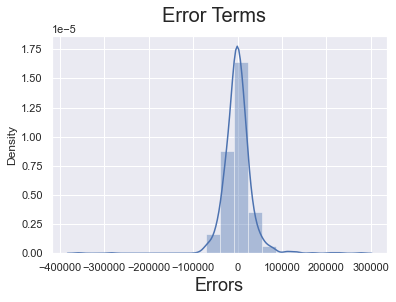

In [90]:
# Residual analysis - Training data

y_train_cnst = lm.predict(X_train_lm)

# Importing the required libraries for plots.
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [91]:
# Finding out R2, RSS, MSS, RMSE of training dataset

from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
print("\nR2 : ",round(r2,2))

rss = np.sum(np.square(y_train - y_train_cnst))
print("\nRSS : ",rss)

mse = mean_squared_error(y_train, y_train_cnst)
print("\nMSE : ",mse)

rmse = mse**0.5
print("\nRMSE : ",rmse)


R2 :  0.82

RSS :  1124107928929.1997

MSE :  1100987197.7759056

RMSE :  33181.12713239117


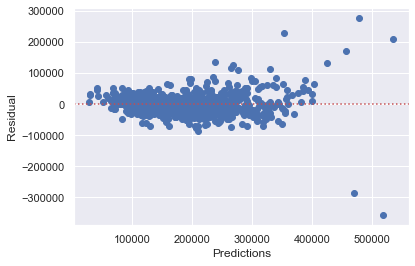

In [92]:
y_res = (y_train - y_train_cnst)
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

# Evaluations on test data

In [93]:
# Scaling test data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_1,LotShape_2,LotShape_3,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_1,GarageFinish_2,GarageFinish_3
1436,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.607084,0.665348,0.361022,-0.293313,-0.703973,-0.431488,-1.181447,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.776063,-0.937484,-0.927153,-0.202809,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,120500,-0.016404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
57,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.607084,-1.226909,-0.964030,-0.293313,0.660517,-0.440205,0.871757,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,-0.927153,1.050378,0.306009,0.438477,-0.744598,0.347093,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,196500,-1.137362,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
780,-0.253806,0.648310,-0.532073,0.534875,-0.355087,-0.699764,0.577925,-0.607084,-1.226909,-0.964030,-0.293313,1.501060,0.381373,-0.154845,0.212191,-0.789230,-0.124502,-0.498789,-0.837450,-0.247791,0.784821,-0.753316,0.175669,-0.234155,-0.776063,-0.314326,0.622148,0.674422,0.306009,-0.329996,1.023633,-0.393502,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.105172,176000,-0.807668,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0

In [94]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [95]:
X_train_new = X_train_new.drop(['const'], axis=1)
X_test_new = X_test[X_train_new.columns] 
X_test_new = sm.add_constant(X_test_new)
test_lm = sm.OLS(y_test,X_test_new).fit()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     94.09
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          1.40e-155
Time:                        14:24:31   Log-Likelihood:                -5155.2
No. Observations:                 439   AIC:                         1.036e+04
Df Residuals:                     412   BIC:                         1.047e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.723e+05   5455.742     31.574      0.000    1.62e+05    1.83e+05
OverallQual           2.724e+04   2753.640      9.893      0.000    2.18e+04    3.27e+04
BsmtUnfSF            -1.211e+04   1844.073     -6.566      0.000   -1.57e+04   -8482.527
TotalBsmtSF           1.744e+04   3643.596      4.786      0.000    1.03e+04    2.46e+04
1stFlrSF              2.237e+04   3236.002      6.912      0.000     1.6e+04    2.87e+04
2ndFlrSF              2.731e+04   2934.973      9.305      0.000    2.15e+04    3.31e+04
MSSubClass_90        -1.877e+04   1.06e+04     -1.775      0.077   -3.96e+04    2020.404
MSSubClass_120       -2.489e+04   7679.422     -3.241      0.001      -4e+04   -9790.457
MSSubClass_160       -2.737e+04   8782.952     -3.117      0.002   -4.46e+04   -1.01e+04
MSZoning_RM          -7373.8577   4951.438     -1.489      0.137   -1.71e+04    2359.375
LotShape_2           -5398.3301   3.19e+04     -0.169      0.866   -6.81e+04    5.73e+04
LotConfig_CulDSac     1.484e+04   6342.536      2.340      0.020    2372.263    2.73e+04
Neighborhood_ClearCr  5904.7284   1.17e+04      0.506      0.613    -1.7e+04    2.88e+04
Neighborhood_Crawfor  1.814e+04   7800.920      2.326      0.021    2809.983    3.35e+04
Neighborhood_NoRidge  2.532e+04   1.42e+04      1.778      0.076   -2667.130    5.33e+04
Neighborhood_NridgHt  7.604e+04   8687.171      8.753      0.000     5.9e+04    9.31e+04
Neighborhood_Somerst  1.435e+04   7171.045      2.001      0.046     250.537    2.84e+04
Neighborhood_StoneBr  8.357e+04   1.02e+04      8.158      0.000    6.34e+04    1.04e+05
Neighborhood_Veenker   6.57e-12   5.57e-12      1.180      0.239   -4.37e-12    1.75e-11
HouseStyle_1Story     9865.1033   5902.428      1.671      0.095   -1737.528    2.15e+04
Exterior1st_ImStucc   7.546e-12   5.06e-12      1.492      0.137    -2.4e-12    1.75e-11
Exterior1st_Stucco    1247.9671   1.44e+04      0.087      0.931    -2.7e+04    2.95e+04
Exterior2nd_BrkFace  -1304.5866   1.09e+04     -0.119      0.905   -2.28e+04    2.02e+04
Exterior2nd_CmentBd   1.967e+04   7683.801      2.560      0.011    4563.177    3.48e+04
Exterior2nd_ImStucc   5.211e+04   2.39e+04      2.183      0.030    5184.341     9.9e+04
Exterior2nd_VinylSd   1.055e+04   3854.959      2.736      0.006    2968.738    1.81e+04
GarageType_NA        -1.627e+04   8508.848     -1.912      0.057    -3.3e+04     458.267
GarageFinish_1       -6231.6255   4938.962     -1.262      0.208   -1.59e+04    3477.083
GarageFinish_2       -4005.3592   4382.011     -0.914      0.361   -1.26e+04    4608.528
==============================================================================
Omnibus:                       99.819   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              774.56

In [96]:
y_pred = lm.predict(X_test_new)

In [97]:
# Finding out R2, RSS, MSS, RMSE of test dataset

r2_test = r2_score(y_true = y_test,y_pred = y_pred)
print("\nR2 on test: ",round(r2_test,2))

rss_test = np.sum(np.square(y_test - y_pred))
print("\nRSS on test: ",rss_test)

mse_test = mean_squared_error(y_test, y_pred)
print("\nMSE on test: ",mse_test)

rmse_test = mse**0.5
print("\nRMSE on test: ",rmse_test)


R2 on test:  0.82

RSS on test:  497710446988.74646

MSE on test:  1133736781.29555

RMSE on test:  33181.12713239117


In [98]:
X_test_new = X_test_new.drop(['const'], axis=1)
print(calculateVIF(X_test_new),"\n")

                features   VIF
18     HouseStyle_1Story  5.03
2            TotalBsmtSF  4.19
3               1stFlrSF  3.78
4               2ndFlrSF  3.14
0            OverallQual  2.99
26        GarageFinish_1  2.50
24   Exterior2nd_VinylSd  2.17
27        GarageFinish_2  1.83
8            MSZoning_RM  1.57
25         GarageType_NA  1.48
14  Neighborhood_NridgHt  1.37
15  Neighborhood_Somerst  1.35
1              BsmtUnfSF  1.33
22   Exterior2nd_CmentBd  1.32
7         MSSubClass_160  1.30
16  Neighborhood_StoneBr  1.27
6         MSSubClass_120  1.25
13  Neighborhood_NoRidge  1.23
12  Neighborhood_Crawfor  1.16
23   Exterior2nd_ImStucc  1.15
10     LotConfig_CulDSac  1.11
5          MSSubClass_90  1.11
11  Neighborhood_ClearCr  1.09
21   Exterior2nd_BrkFace  1.07
20    Exterior1st_Stucco  1.05
9             LotShape_2  1.03
17  Neighborhood_Veenker   NaN
19   Exterior1st_ImStucc   NaN 



# VIF values seem to be satisfactory on test dataset

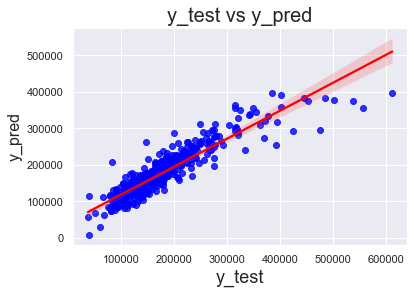

In [99]:
# Plotting y_test and y_pred to understand the spread

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=98, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [100]:
X_train_new.columns

Index(['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSZoning_RM', 'LotShape_2', 'LotConfig_CulDSac', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_1Story', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_VinylSd', 'GarageType_NA', 'GarageFinish_1', 'GarageFinish_2'], dtype='object')

In [101]:
master_dataset = housing[['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                          'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSZoning_RM', 
                          'LotShape_2', 'LotConfig_CulDSac', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 
                          'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 
                          'Neighborhood_Veenker', 'HouseStyle_1Story', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 
                          'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_VinylSd', 
                          'GarageType_NA', 'GarageFinish_1', 'GarageFinish_2']]
master_dataset.head(5)

,OverallQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSZoning_RM,LotShape_2,LotConfig_CulDSac,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,HouseStyle_1Story,Exterior1st_ImStucc,Exterior1st_Stucco,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_VinylSd,GarageType_NA,GarageFinish_1,GarageFinish_2
0,7,150,856,856,854,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,6,284,1262,1262,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
2,7,434,920,920,866,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,7,540,756,961,756,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,8,490,1145,1145,1053,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


# Metrics observed:
- Satisfactory p values and VIF values
- R2 on Training dataset - 0.82
- R2 on Testing dataset - 0.82

# Lasso Regression

In [102]:
lasso = Lasso()

# Mentioning the list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
folds = 5

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [103]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [104]:
#Fitting Lasso model for alpha = 100 and printing the coefficients

alpha =100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_new, y_train)

Lasso(alpha=100)

In [105]:
lasso.coef_

array([ 28863.13224179,  -7854.13056525,   9535.67986107,  20794.98631856,
        21973.7158012 , -10189.78752364, -19073.21356626, -21720.99379727,
        -8617.80688288, -19443.2691571 ,  15087.34012274,  22784.21781487,
        24175.72854014,  55702.63435736,  55191.2426449 ,  24819.18044986,
        24382.53514539,  25793.53056718,  12800.87360832,     -0.        ,
       -16133.66480254,  10475.78346609,  15316.26693002,  14301.0434214 ,
        12316.89499201, -19993.67985164, -15981.04962279, -12116.23618493])

In [106]:
# Calculating metric1 for populating the grid of master metric

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric1 = []
r2_train_lasso = r2_score(y_train, y_pred_train)
print('\nR2 Train Lasso - ',r2_train_lasso)
metric1.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print('\nR2 Test Lasso - ',r2_test_lasso)
metric1.append(r2_test_lasso)

rss1_lasso = np.sum(np.square(y_train - y_pred_train))
print('\nRSS Train Lasso - ',rss1_lasso)
metric1.append(rss1_lasso)

rss2_lasso = np.sum(np.square(y_test - y_pred_test))
print('\nRSS Test Lasso - ',rss2_lasso)
metric1.append(rss2_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print('\nMSE Train Lasso - ',mse_train_lasso)
metric1.append(mse_train_lasso**0.5)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print('\nMSE Test Lasso - ',mse_test_lasso)
metric1.append(mse_test_lasso**0.5)


R2 Train Lasso -  0.8213611918870948

R2 Test Lasso -  0.820862732538103

RSS Train Lasso -  1140047239283.4834

RSS Test Lasso -  506192680212.23364

MSE Train Lasso -  1116598667.2707968

MSE Test Lasso -  1153058497.0665915


# Ridge Regression

In [107]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [108]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [109]:
#Fitting Ridge model for alpha = 10 and printing the coefficients

alpha =10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_new, y_train)

Ridge(alpha=10)

In [110]:
ridge.coef_

array([ 30197.26007408,  -7971.70145783,  10302.79952802,  21067.33905076,
        22419.81118946, -10782.42353354, -15070.88094334, -17777.0772133 ,
       -10404.4530279 , -16247.70945388,  14769.8334973 ,  17099.30324236,
        18767.42362867,  41983.46717008,  43836.59724141,  19166.26875201,
        14492.14987304,  16529.82635237,  12590.96456265,  -3431.02586007,
       -14938.3877978 ,  10171.45749159,  14262.88874711,  12482.64934175,
        12245.33818472, -17204.33201285, -14927.98026432, -11445.7389019 ])

In [111]:
# Calculating metric2 for populating the grid of master metric

y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_ridge = r2_score(y_train, y_pred_train)
print('\nR2 Train Ridge - ',r2_train_ridge)
metric2.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
print('\nR2 Test Ridge - ',r2_test_ridge)
metric2.append(r2_test_ridge)

rss1_ridge = np.sum(np.square(y_train - y_pred_train))
print('\nRSS Train Ridge - ',rss1_ridge)
metric2.append(rss1_ridge)

rss2_ridge = np.sum(np.square(y_test - y_pred_test))
print('\nRSS Test Ridge - ',rss2_ridge)
metric2.append(rss2_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print('\nMSE Train Ridge - ',mse_train_ridge)
metric2.append(mse_train_ridge**0.5)

mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print('\nMSE Test Ridge - ',mse_test_ridge)
metric2.append(mse_test_ridge**0.5)


R2 Train Ridge -  0.8171958486287971

R2 Test Ridge -  0.8172023133897229

RSS Train Ridge -  1166629862244.609

RSS Test Ridge -  516536018623.4485

MSE Train Ridge -  1142634536.968275

MSE Test Ridge -  1176619632.3996549


In [112]:
# Calculating metric3 for populating the grid of master metric

y_pred_train = lm.predict(X_train_lm)
y_pred_test = y_pred

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('\nR2 Train LR - ',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('\nR2 Test LR - ',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('\nRSS Train LR - ',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('\nRSS Test LR - ',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('\nMSE Train LR - ',mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('\nMSE Test LR - ',mse_test_lr)
metric3.append(mse_test_lr**0.5)


R2 Train LR -  0.8238587896231504

R2 Test LR -  0.8238645224513688

RSS Train LR -  1124107928929.1997

RSS Test LR -  497710446988.74646

MSE Train LR -  1100987197.7759056

MSE Test LR -  1133736781.29555


# Visualising through a table

In [113]:
# Master table with all metrics for comparison

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Lasso Regression': metric1
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Lasso Regression'] )
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Linear Regression')

master_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
master_metric

,Metric,Lasso Regression,Ridge Regression,Linear Regression
0,R2 Score (Train),8.213612e-01,8.171958e-01,8.238588e-01
1,R2 Score (Test),8.208627e-01,8.172023e-01,8.238645e-01
2,RSS (Train),1.140047e+12,1.166630e+12,1.124108e+12
3,RSS (Test),5.061927e+11,5.165360e+11,4.977104e+11
4,MSE (Train),3.341555e+04,3.380288e+04,3.318113e+04
5,MSE (Test),3.395672e+04,3.430189e+04,3.367101e+04


# Changes oberserved in the coefficients post regularization

In [114]:
betas = pd.DataFrame(index=X_train_new.columns)
betas.rows = X_train_new.columns
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(30)

,Linear,Ridge,Lasso
OverallQual,27647.360170,30197.260074,28863.132242
BsmtUnfSF,-8003.662858,-7971.701458,-7854.130565
TotalBsmtSF,9279.749866,10302.799528,9535.679861
1stFlrSF,20441.708979,21067.339051,20794.986319
2ndFlrSF,22293.776139,22419.811189,21973.715801
MSSubClass_90,-12705.404824,-10782.423534,-10189.787524
MSSubClass_120,-24969.485209,-15070.880943,-19073.213566
MSSubClass_160,-26146.878217,-17777.077213,-21720.993797
MSZoning_RM,-7424.650337,-10404.453028,-8617.806883
LotShape_2,-29970.479199,-16247.709454,-19443.269157


# Subjective Questions
## Question 1 - What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

## Ans: Coeff values have been changed and R2 values have decreased for both Ridge (81.7% to 81%) and Lasso (82% to 81.4%)

In [115]:
# Ridge Regression

alpha_ridge_double = 20
ridge_alpha_double = Ridge(alpha=alpha_ridge_double)
ridge_alpha_double.fit(X_train_new, y_train)
print("\nRidge coefficients with alpha 20 are - ",ridge_alpha_double.coef_)
print("\nRidge coefficients with alpha 10 are - ",ridge.coef_)


y_pred_train = ridge_alpha_double.predict(X_train_new)
y_pred_test = ridge_alpha_double.predict(X_test_new)

r2_train_lr_ridge_alpha_double = r2_score(y_train, y_pred_train)
print("\nRidge R2 on training dataset alpha 20 - ",r2_train_lr_ridge_alpha_double)

r2_test_lr_ridge_alpha_double = r2_score(y_test, y_pred_test)
print("\nRidge R2 on testing dataset alpha 20 - ",r2_test_lr_ridge_alpha_double)


Ridge coefficients with alpha 20 are -  [ 31284.50469809  -7848.98228823  10967.56692272  21244.87815907
  22109.78133066  -9352.96432177 -11027.24044751 -13859.09711356
 -11227.65280335 -11232.0935524   13246.87254335  12216.10791025
  13893.87441465  32775.79540327  35050.84723994  14489.31823186
   8267.43160149  10599.01003363  11105.70356414  -1310.62291769
 -11670.20670946   6900.51956977  11481.42386095   7838.29883031
  11791.07410363 -13885.98292594 -13534.40286889  -9949.55135447]

Ridge coefficients with alpha 10 are -  [ 30197.26007408  -7971.70145783  10302.79952802  21067.33905076
  22419.81118946 -10782.42353354 -15070.88094334 -17777.0772133
 -10404.4530279  -16247.70945388  14769.8334973   17099.30324236
  18767.42362867  41983.46717008  43836.59724141  19166.26875201
  14492.14987304  16529.82635237  12590.96456265  -3431.02586007
 -14938.3877978   10171.45749159  14262.88874711  12482.64934175
  12245.33818472 -17204.33201285 -14927.98026432 -11445.7389019 ]

Ridge 

In [116]:
# Lasso Regression

alpha_lasso_double = 200
lasso_alpha_double = Lasso(alpha=alpha_lasso_double)
lasso_alpha_double.fit(X_train_new, y_train)
print("\nLasso coefficients with alpha 200 are - ",lasso_alpha_double.coef_)
print("\nLasso coefficients with alpha 100 are - ",lasso.coef_)


y_pred_train = lasso_alpha_double.predict(X_train_new)
y_pred_test = lasso_alpha_double.predict(X_test_new)

r2_train_lr_lasso_alpha_double = r2_score(y_train, y_pred_train)
print("\nLasso R2 on training dataset alpha 200 - ",r2_train_lr_lasso_alpha_double)

r2_test_lr_lasso_alpha_double = r2_score(y_test, y_pred_test)
print("\nLasso R2 on testing dataset alpha 200 - ",r2_test_lr_lasso_alpha_double)


Lasso coefficients with alpha 200 are -  [ 30203.83015974  -7768.64630604   9745.6463184   21077.23428597
  21472.25975417  -7785.61812876 -13570.09664968 -17536.92620215
  -9705.40680018  -8707.14883931  13980.7546901   16867.09951107
  18725.39099208  51729.93545305  49299.56178358  20261.24517523
  11062.44541418  15442.74381042  11454.05651072     -0.
 -12148.57049116   2853.12614635  12297.53652857      0.
  11128.38183903 -16496.41839506 -14392.49453976 -10522.26456955]

Lasso coefficients with alpha 100 are -  [ 28863.13224179  -7854.13056525   9535.67986107  20794.98631856
  21973.7158012  -10189.78752364 -19073.21356626 -21720.99379727
  -8617.80688288 -19443.2691571   15087.34012274  22784.21781487
  24175.72854014  55702.63435736  55191.2426449   24819.18044986
  24382.53514539  25793.53056718  12800.87360832     -0.
 -16133.66480254  10475.78346609  15316.26693002  14301.0434214
  12316.89499201 -19993.67985164 -15981.04962279 -12116.23618493]

Lasso R2 on training dataset

# Question 3 - After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

# Ans: Post removal of top 5 predictors, now the new top 5 predictors in Lasso model are
- GarageType_NA
- HouseStyle_1Story
- GarageFinish_1
- 1stFlrSF
- Exterior2nd_VinylSd

## 5 most imporatnt predictors in Lasso model before removing them are 
- Neighborhood_NoRidge
- Neighborhood_NridgHt
- OverallQual
- Neighborhood_Veenker
- Neighborhood_Somerst

In [117]:
X_train_new_drop5 = X_train_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'OverallQual'
                               , 'Neighborhood_Veenker'], axis=1)
X_test_new_drop5 = X_test_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'OverallQual'
                               , 'Neighborhood_Veenker'], axis=1)

In [118]:
lasso = Lasso()

model_cv_drop5 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_drop5.fit(X_train_new_drop5, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [119]:
print(model_cv_drop5.best_params_)

{'alpha': 500}


In [120]:
#Fitting Lasso model for alpha = 100 and printing the coefficients

alpha_drop5 =500
lasso_drop5 = Lasso(alpha=alpha_drop5)
lasso_drop5.fit(X_train_new_drop5, y_train)

Lasso(alpha=500)

In [121]:
lasso_drop5.coef_

array([ -3664.52445345,  19761.96987016,  31894.77731904, -16038.76448409,
            0.        ,      0.        , -13336.48332725,     -0.        ,
        11696.40655745,      0.        ,  17534.27362246,  22804.59035859,
         3997.06598907, -42538.14087634,      0.        ,     -0.        ,
            0.        ,  10043.2636307 ,      0.        ,  27892.65583851,
       -45628.68451245, -36675.92792552, -13014.88402446])

In [122]:
betas_drop5 = pd.DataFrame(index=X_train_new_drop5.columns)
betas_drop5.rows = X_train_new_drop5.columns
betas_drop5['Lasso'] = lasso_drop5.coef_
pd.set_option('display.max_rows', None)
betas_drop5.head(30)

,Lasso
BsmtUnfSF,-3664.524453
TotalBsmtSF,19761.969870
1stFlrSF,31894.777319
MSSubClass_90,-16038.764484
MSSubClass_120,0.000000
MSSubClass_160,0.000000
MSZoning_RM,-13336.483327
LotShape_2,-0.000000
LotConfig_CulDSac,11696.406557
Neighborhood_ClearCr,0.000000
